P4_Anticipez les besoins en consommation de bâtiments

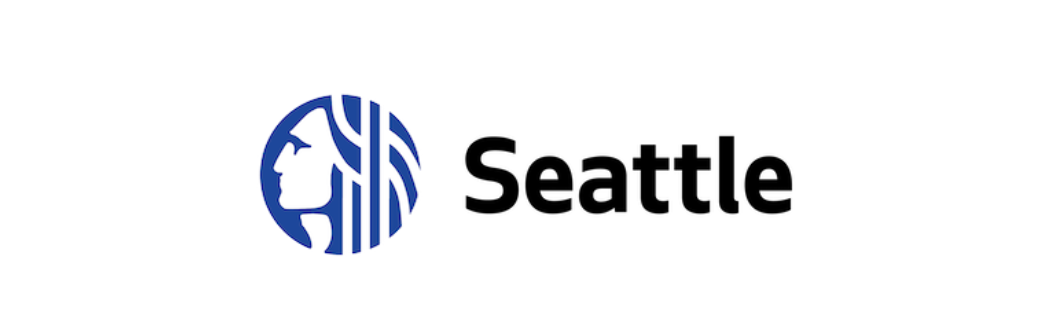

# Contexte

<span style="font-size:16px;">Dans ce Notebook nous réaliserons une Analyse Exploratoire rapide, pour essayer de détecter les tendances générales des variables, regarder les distributions de nos targets, essayer de comprendre le profil général de consommation, afficher des graphiques et des tableaux statistiques.

In [1]:
package_list = {"pandas", "numpy", "matplotlib", "sklearn-learn"}

In [2]:
txt = !python  -m pip freeze
check = lambda i: any([(pack in i) for pack in package_list])
txt = [i for i in txt if check(i)]
txt

['matplotlib @ file:///C:/ci/matplotlib-suite_1660169687702/work',
 'matplotlib-inline==0.1.6',
 'numpy @ file:///C:/ci/numpy_and_numpy_base_1653574844560/work',
 'numpydoc @ file:///C:/Windows/TEMP/abs_30799058-86dd-4401-b621-d172137a4d87_ra3twm7/croots/recipe/numpydoc_1657529873713/work',
 'pandas @ file:///C:/b/abs_cdcgk91igc/croots/recipe/pandas_1663772960432/work']

# Imports

In [1]:
# builtin
import os

#data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Afficher toutes le colonnes du data frame : 
pd.set_option('display.max_columns', 200)

sns.set(style='whitegrid', palette='muted', color_codes=True)


from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import scipy as sp


print('OK!! ')

OK!! 


# Importation du fichier

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '00_Cleaning.ipynb',
 '01_EDA.ipynb',
 '02_features_engineering.ipynb',
 '03_modelisation.ipynb',
 '04_modelisation_EmessionCo2.ipynb',
 'cache',
 'data',
 'figures',
 'resources',
 'shap_values',
 'Untitled.ipynb',
 '_FUNCTIONS_.ipynb',
 '_VERSIONS_.ipynb']

In [3]:
os.listdir("data/cleaned")

['df_cleaned.csv']

In [4]:
path = "./data/cleaned/"
filename = "df_cleaned.csv"

In [11]:
df = pd.read_csv(path+filename)
df.head()

DataYear        BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0      2016      NonResidential               Hotel                    7   
1      2016      NonResidential               Hotel                    7   
2      2016      NonResidential               Hotel                    7   
3      2016      NonResidential               Hotel                    7   
4      2016  Nonresidential COS               Other                    7   

  Neighborhood  YearBuilt  NumBuildings  NmbFloors  PropertyGFATotal  \
0     DOWNTOWN       1927           1.0         12             88434   
1     DOWNTOWN       1996           1.0         11            103566   
2     DOWNTOWN       1926           1.0         10             61320   
3     DOWNTOWN       1980           1.0         18            175580   
4     DOWNTOWN       1999           1.0          2             97288   

   PropertyGFAParking  GFABuilding_s                   All_UseTypes  \
0                   0          88434                          Hotel   
1               15064          88502     Hotel, Parking, Restaurant   
2                   0          61320                          Hotel   
3               62000         113580  Hotel, Parking, Swimming Pool   
4               37198          60090                 Police Station   

  Largest_UseType  LargestUseType_GFA Second_UseType  SecondUseType_GFA  \
0           Hotel             88434.0          Aucun                0.0   
1           Hotel             83880.0        Parking            15064.0   
2           Hotel             61320.0          Aucun                0.0   
3           Hotel            123445.0        Parking            68009.0   
4  Police Station             88830.0          Aucun                0.0   

  Third_UseType  ThirdUseType_GFA  ENERGYSTARScore  SiteEUI_kBtu_sf  \
0         Aucun               0.0             60.0        81.714748   
1    Restaurant            4622.0             61.0        80.991184   
2         Aucun               0.0             56.0       110.805337   
3         Aucun               0.0             75.0        80.718789   
4         Aucun               0.0              NaN       124.235425   

   SiteEUIWN_kBtu_sf  SourceEUI_kBtu_sf  SourceEUIWN_kBtu_sf  \
0          84.300003         182.500000           189.000000   
1          97.900002         176.100006           179.399994   
2         113.300003         216.199997           224.000000   
3         118.699997         211.399994           215.600006   
4         141.600006         316.299988           320.500000   

   SiteEnergyUse_kBtu  SiteEnergyUseWN_kBtu  SteamUse_kBtu  Electricity_kBtu  \
0          7226362.00             7456910.0     2003882.00         3946027.0   
1          8387933.00             8664479.0           0.00         3242851.0   
2          6794583.25             6946800.5     2214446.25         2768924.0   
3         14172605.00            14656503.0           0.00         5368607.0   
4         12086616.00            12581712.0           0.00         7371434.0   

   NaturalGas_kBtu  TotalGHGEmissions  GHGEmissionsIntensity  
0        1276453.0             249.98                   2.83  
1        5145082.0             295.86                   2.86  
2        1811213.0             286.43                   4.67  
3        8803998.0             505.01                   2.88  
4        4715182.0             301.81                   3.10

# Analyse exploratoire

<span style="font-size:16px;"> Nous éffectuerons une courte analyse exploratoire afin de comprendre mieux la distribution de nos données : 

In [6]:
round(df.describe(include='O'))

BuildingType          PrimaryPropertyType Neighborhood All_UseTypes  \
count             1449                         1449         1449         1449   
unique               4                           18           13          345   
top     NonResidential  Small- and Mid-Sized Office     DOWNTOWN       Office   
freq              1352                          284          330          130   

       Largest_UseType Second_UseType Third_UseType  
count             1449           1449          1449  
unique              54             21            21  
top             Office          Aucun         Aucun  
freq               470           1221          1349

In [7]:
round(df.describe().transpose())

count       mean        std      min        25%  \
DataYear               1449.0     2016.0        0.0   2016.0     2016.0   
CouncilDistrictCode    1449.0        4.0        2.0      1.0        2.0   
YearBuilt              1449.0     1961.0       33.0   1900.0     1929.0   
NumBuildings           1449.0        1.0        1.0      1.0        1.0   
NmbFloors              1449.0        4.0        6.0      1.0        1.0   
PropertyGFATotal       1449.0   102083.0   150830.0  20022.0    28820.0   
PropertyGFAParking     1449.0    12883.0    40713.0      0.0        0.0   
GFABuilding_s          1449.0    89200.0   129308.0  10925.0    27908.0   
LargestUseType_GFA     1449.0    89144.0   126546.0   8061.0    27800.0   
SecondUseType_GFA      1449.0     9083.0    32459.0      0.0        0.0   
ThirdUseType_GFA       1449.0     1326.0     8838.0      0.0        0.0   
ENERGYSTARScore         927.0       64.0       29.0      1.0       44.0   
SiteEUI_kBtu_sf        1449.0       66.0       64.0      1.0       31.0   
SiteEUIWN_kBtu_sf      1449.0       74.0       66.0      2.0       37.0   
SourceEUI_kBtu_sf      1449.0      175.0      160.0      4.0       79.0   
SourceEUIWN_kBtu_sf    1449.0      179.0      160.0      5.0       84.0   
SiteEnergyUse_kBtu     1449.0  6151742.0  9296525.0  57133.0  1242311.0   
SiteEnergyUseWN_kBtu   1449.0  6343483.0  9399233.0  58114.0  1322417.0   
SteamUse_kBtu          1449.0   241406.0  1520839.0      0.0        0.0   
Electricity_kBtu       1449.0  4510058.0  7449967.0      0.0   727386.0   
NaturalGas_kBtu        1449.0  1400278.0  2868462.0      0.0        0.0   
TotalGHGEmissions      1449.0      124.0      218.0      0.0       20.0   
GHGEmissionsIntensity  1449.0        2.0        2.0      0.0        0.0   

                             50%        75%         max  
DataYear                  2016.0     2016.0      2016.0  
CouncilDistrictCode          4.0        7.0         7.0  
YearBuilt                 1965.0     1988.0      2015.0  
NumBuildings                 1.0        1.0        27.0  
NmbFloors                    2.0        4.0        99.0  
PropertyGFATotal         46970.0   102235.0   1536606.0  
PropertyGFAParking           0.0        0.0    512608.0  
GFABuilding_s            45145.0    91213.0   1323055.0  
LargestUseType_GFA       45260.0    92792.0   1323055.0  
SecondUseType_GFA            0.0        0.0    377046.0  
ThirdUseType_GFA             0.0        0.0    177210.0  
ENERGYSTARScore             71.0       88.0       100.0  
SiteEUI_kBtu_sf             47.0       75.0       834.0  
SiteEUIWN_kBtu_sf           56.0       87.0       834.0  
SourceEUI_kBtu_sf          137.0      207.0      2620.0  
SourceEUIWN_kBtu_sf        141.0      210.0      2620.0  
SiteEnergyUse_kBtu     2589388.0  6836899.0  69519806.0  
SiteEnergyUseWN_kBtu   2756930.0  7046428.0  71568952.0  
SteamUse_kBtu                0.0        0.0  28438884.0  
Electricity_kBtu       1632472.0  4897760.0  68636822.0  
NaturalGas_kBtu         458640.0  1410803.0  34685331.0  
TotalGHGEmissions           48.0      131.0      2574.0  
GHGEmissionsIntensity        1.0        2.0        16.0

## Features qualitatives 

**Nombre de bâtiment selon le type**

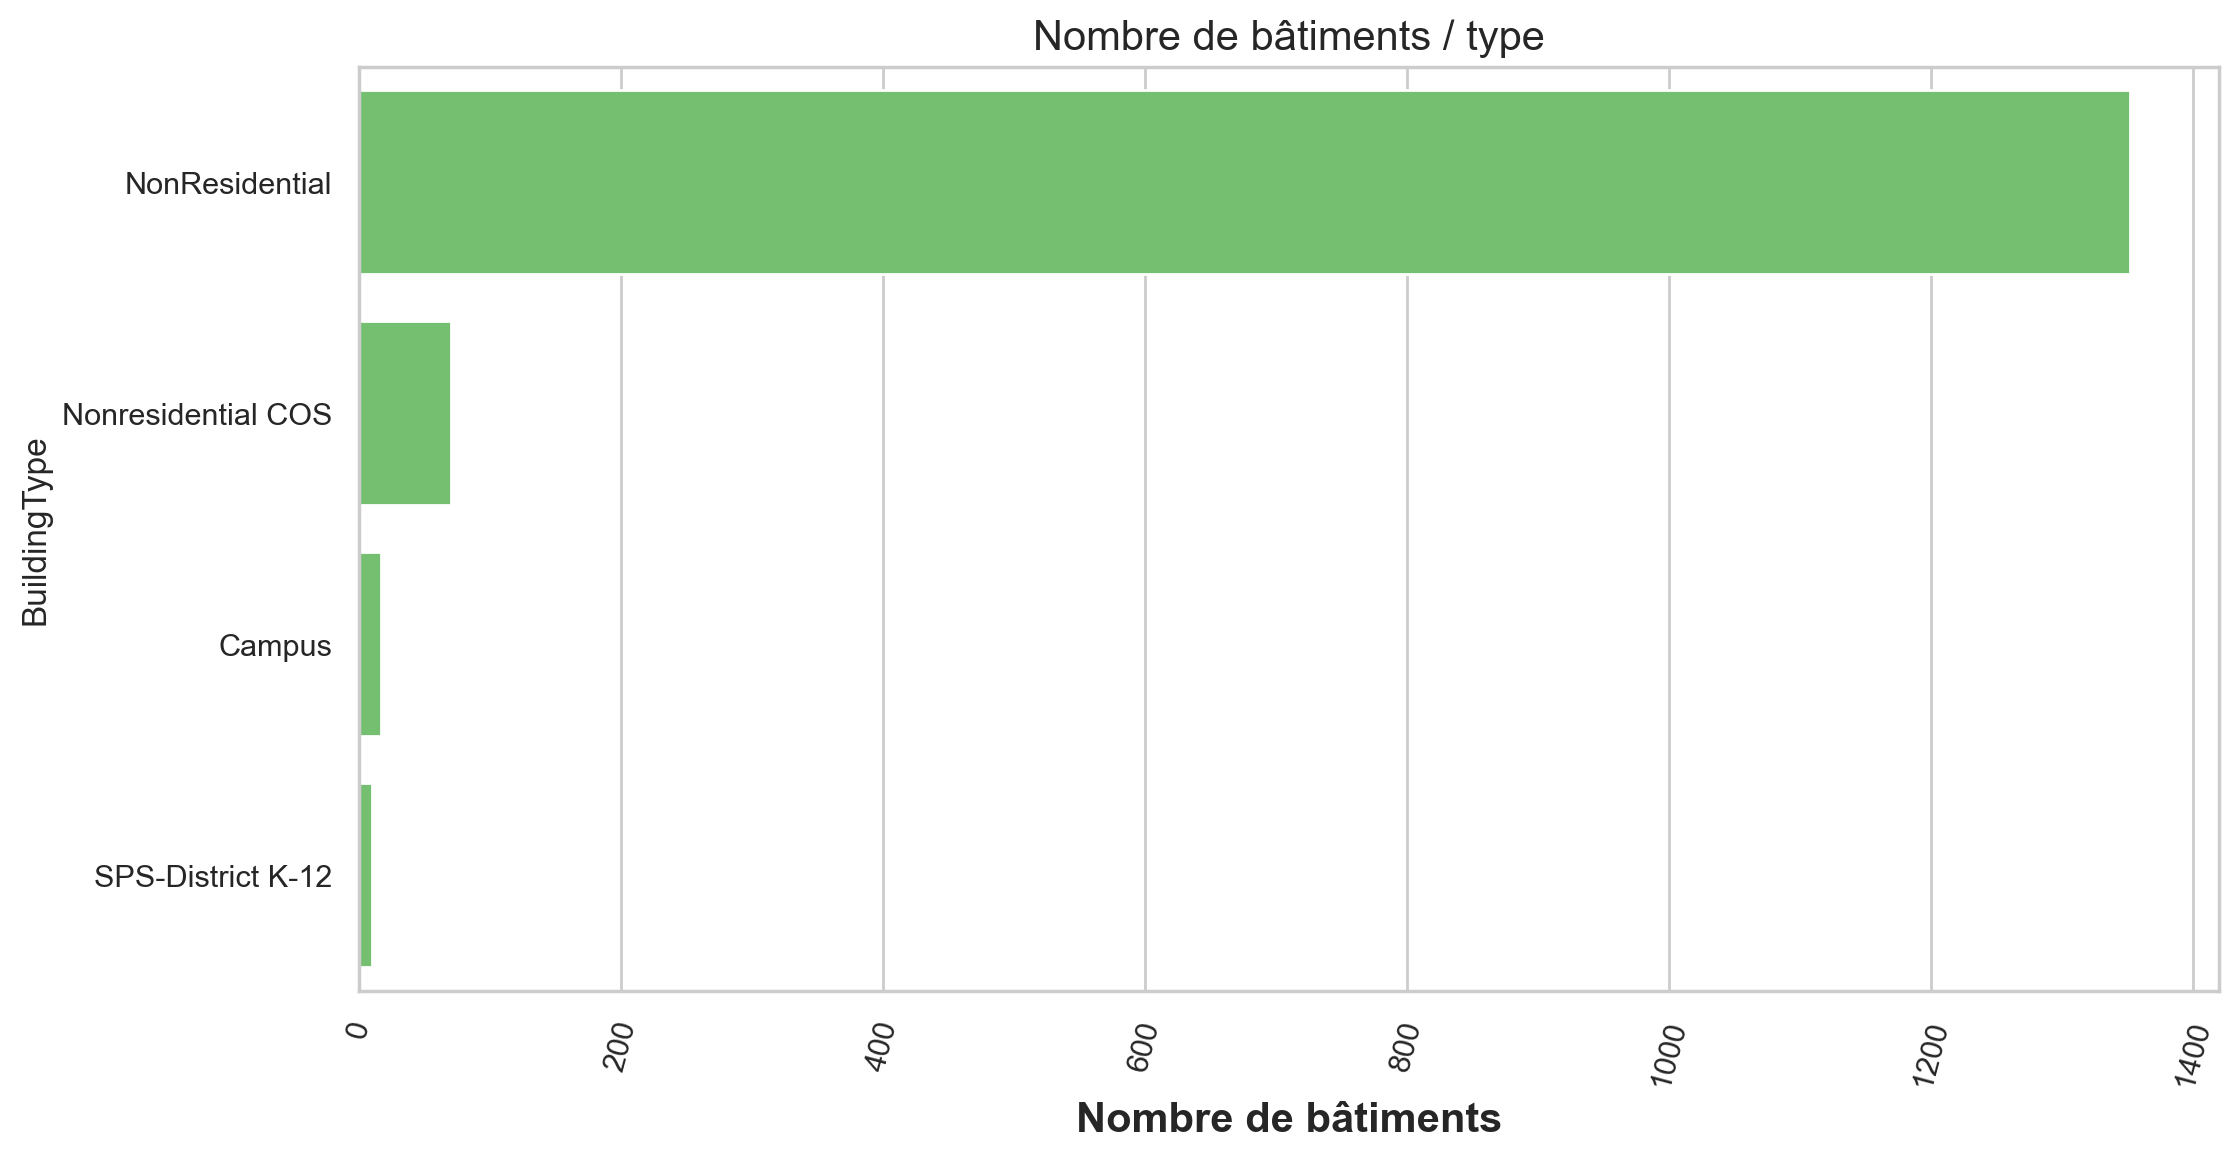

In [63]:
fig = plt.figure(figsize=(12, 6), dpi=200)
data_plot = df['BuildingType']
sns.countplot(y=data_plot, order = df['BuildingType'].value_counts(normalize=True).index, color='g')
plt.xticks(rotation=75);
plt.title('Nombre de bâtiments / type', fontsize=15)
plt.xlabel('Nombre de bâtiments', fontsize=15, fontweight='bold')
plt.savefig("figures/Nombre_bâtiments.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

**Nombre de bâtiments selon le PropretyType**

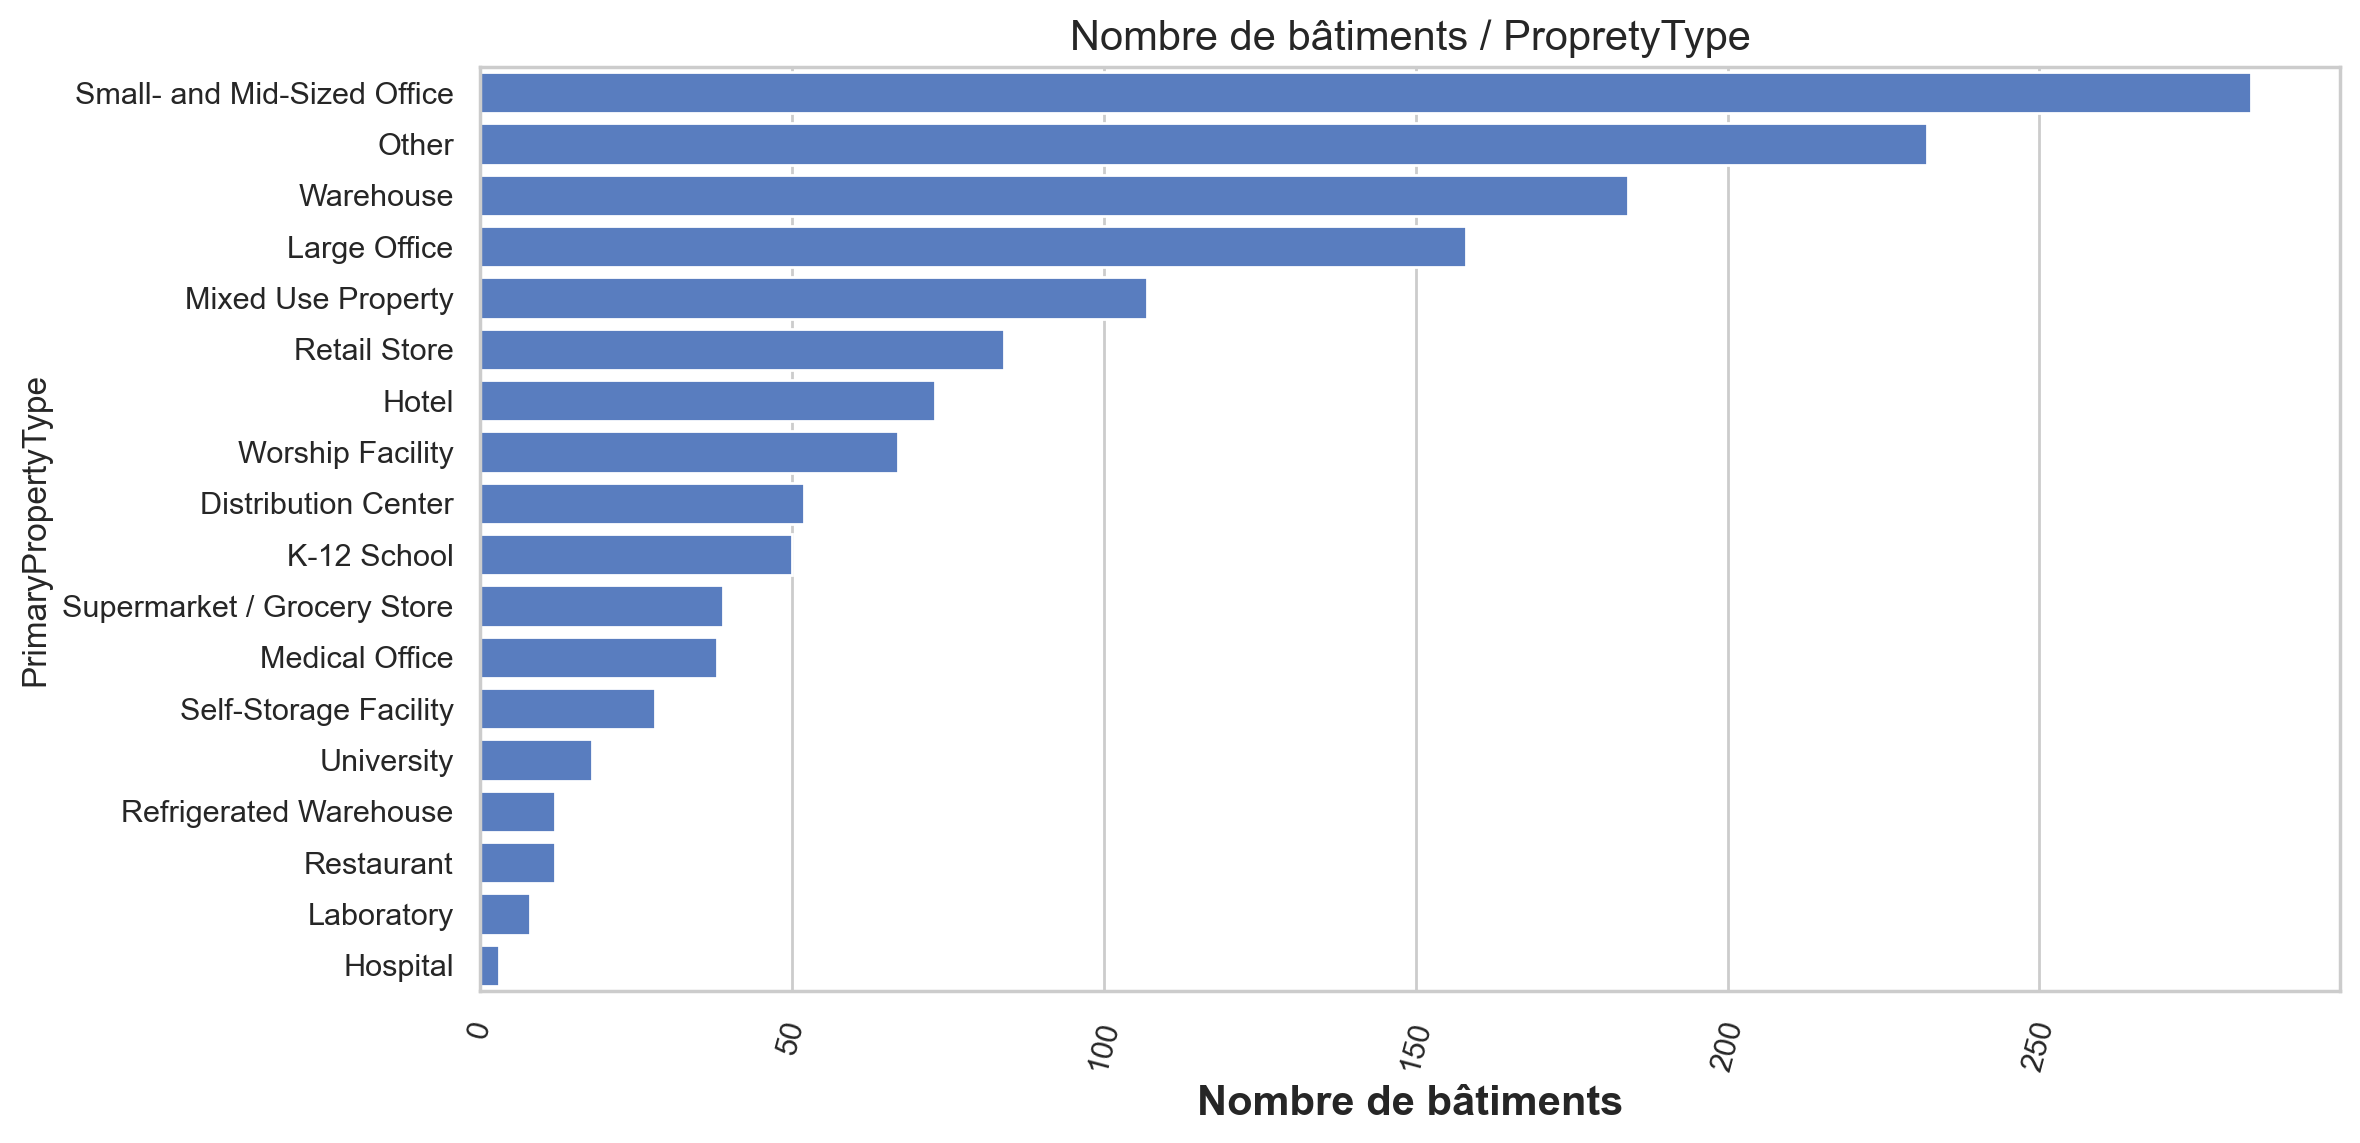

In [64]:
fig = plt.figure(figsize=(12, 6), dpi=200)
data_plot = df['PrimaryPropertyType']
sns.countplot(y=data_plot, order = df['PrimaryPropertyType'].value_counts(normalize=True).index, color='b')
plt.xticks(rotation=75);
plt.title('Nombre de bâtiments / PropretyType', fontsize=15)
plt.xlabel('Nombre de bâtiments', fontsize=15, fontweight='bold')
plt.savefig("figures/Nombre_bâtiments_propretytype.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

<span style="font-size:16px;">- Une hétérogénéité concernant le nombre du bâtiment par type d'utilisation principale

**Nombre de bâtiments dans chaque quartier**

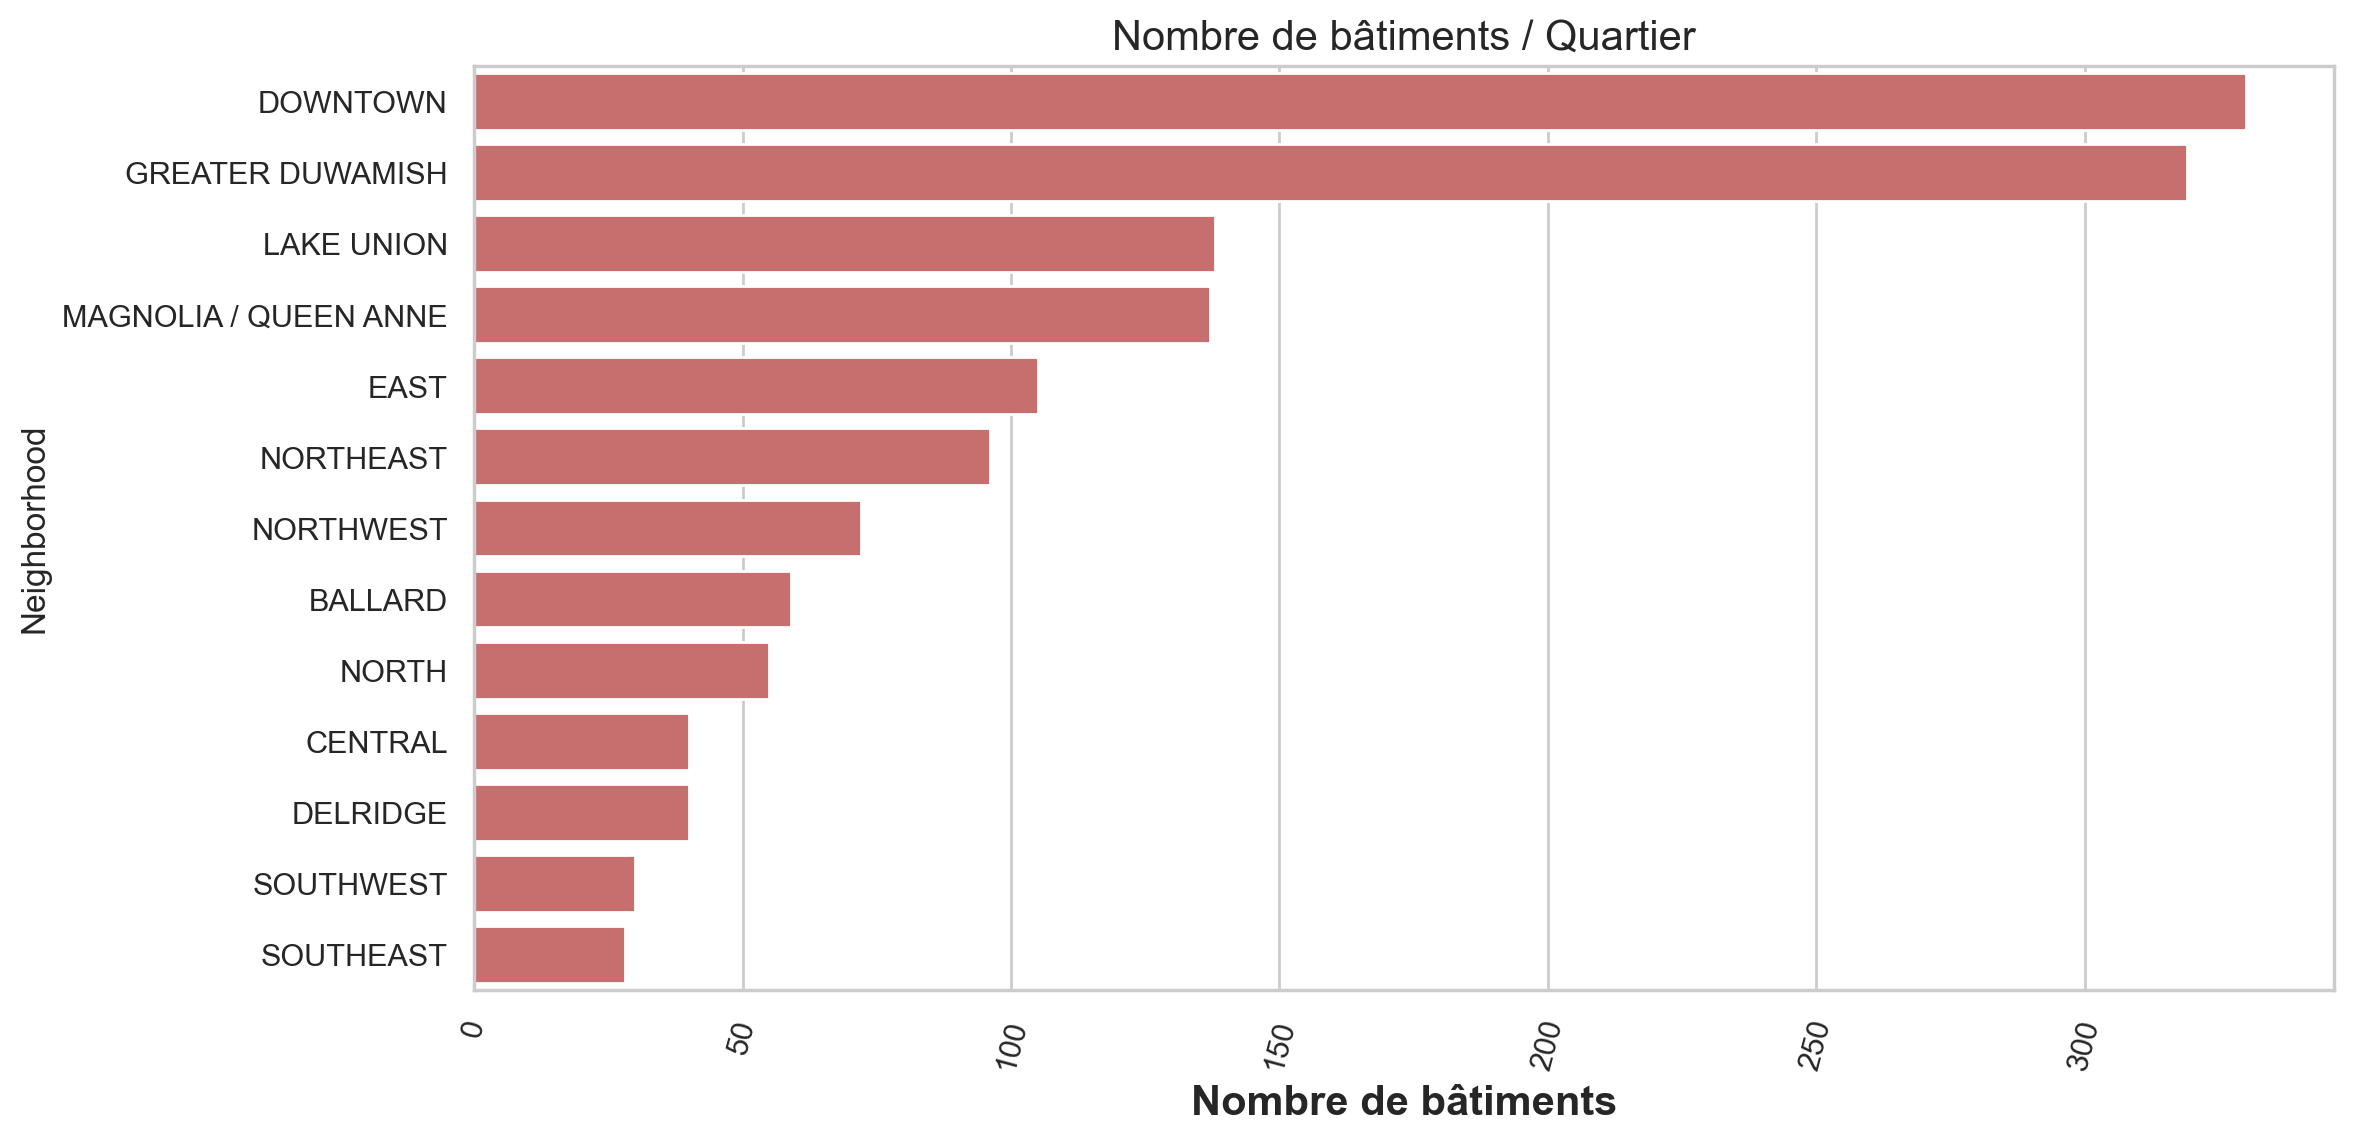

In [65]:
fig = plt.figure(figsize=(12, 6), dpi=200)
data_plot = df['Neighborhood']
sns.countplot(y=data_plot, order = df['Neighborhood'].value_counts(normalize=True).index, color='r')
plt.xticks(rotation=75);
plt.title('Nombre de bâtiments / Quartier', fontsize=15)
plt.xlabel('Nombre de bâtiments', fontsize=15, fontweight='bold')
plt.savefig("figures/Nombre_bâtiments_.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

**Nombre de bâtiments de l'utilisation principale du bâtiment**

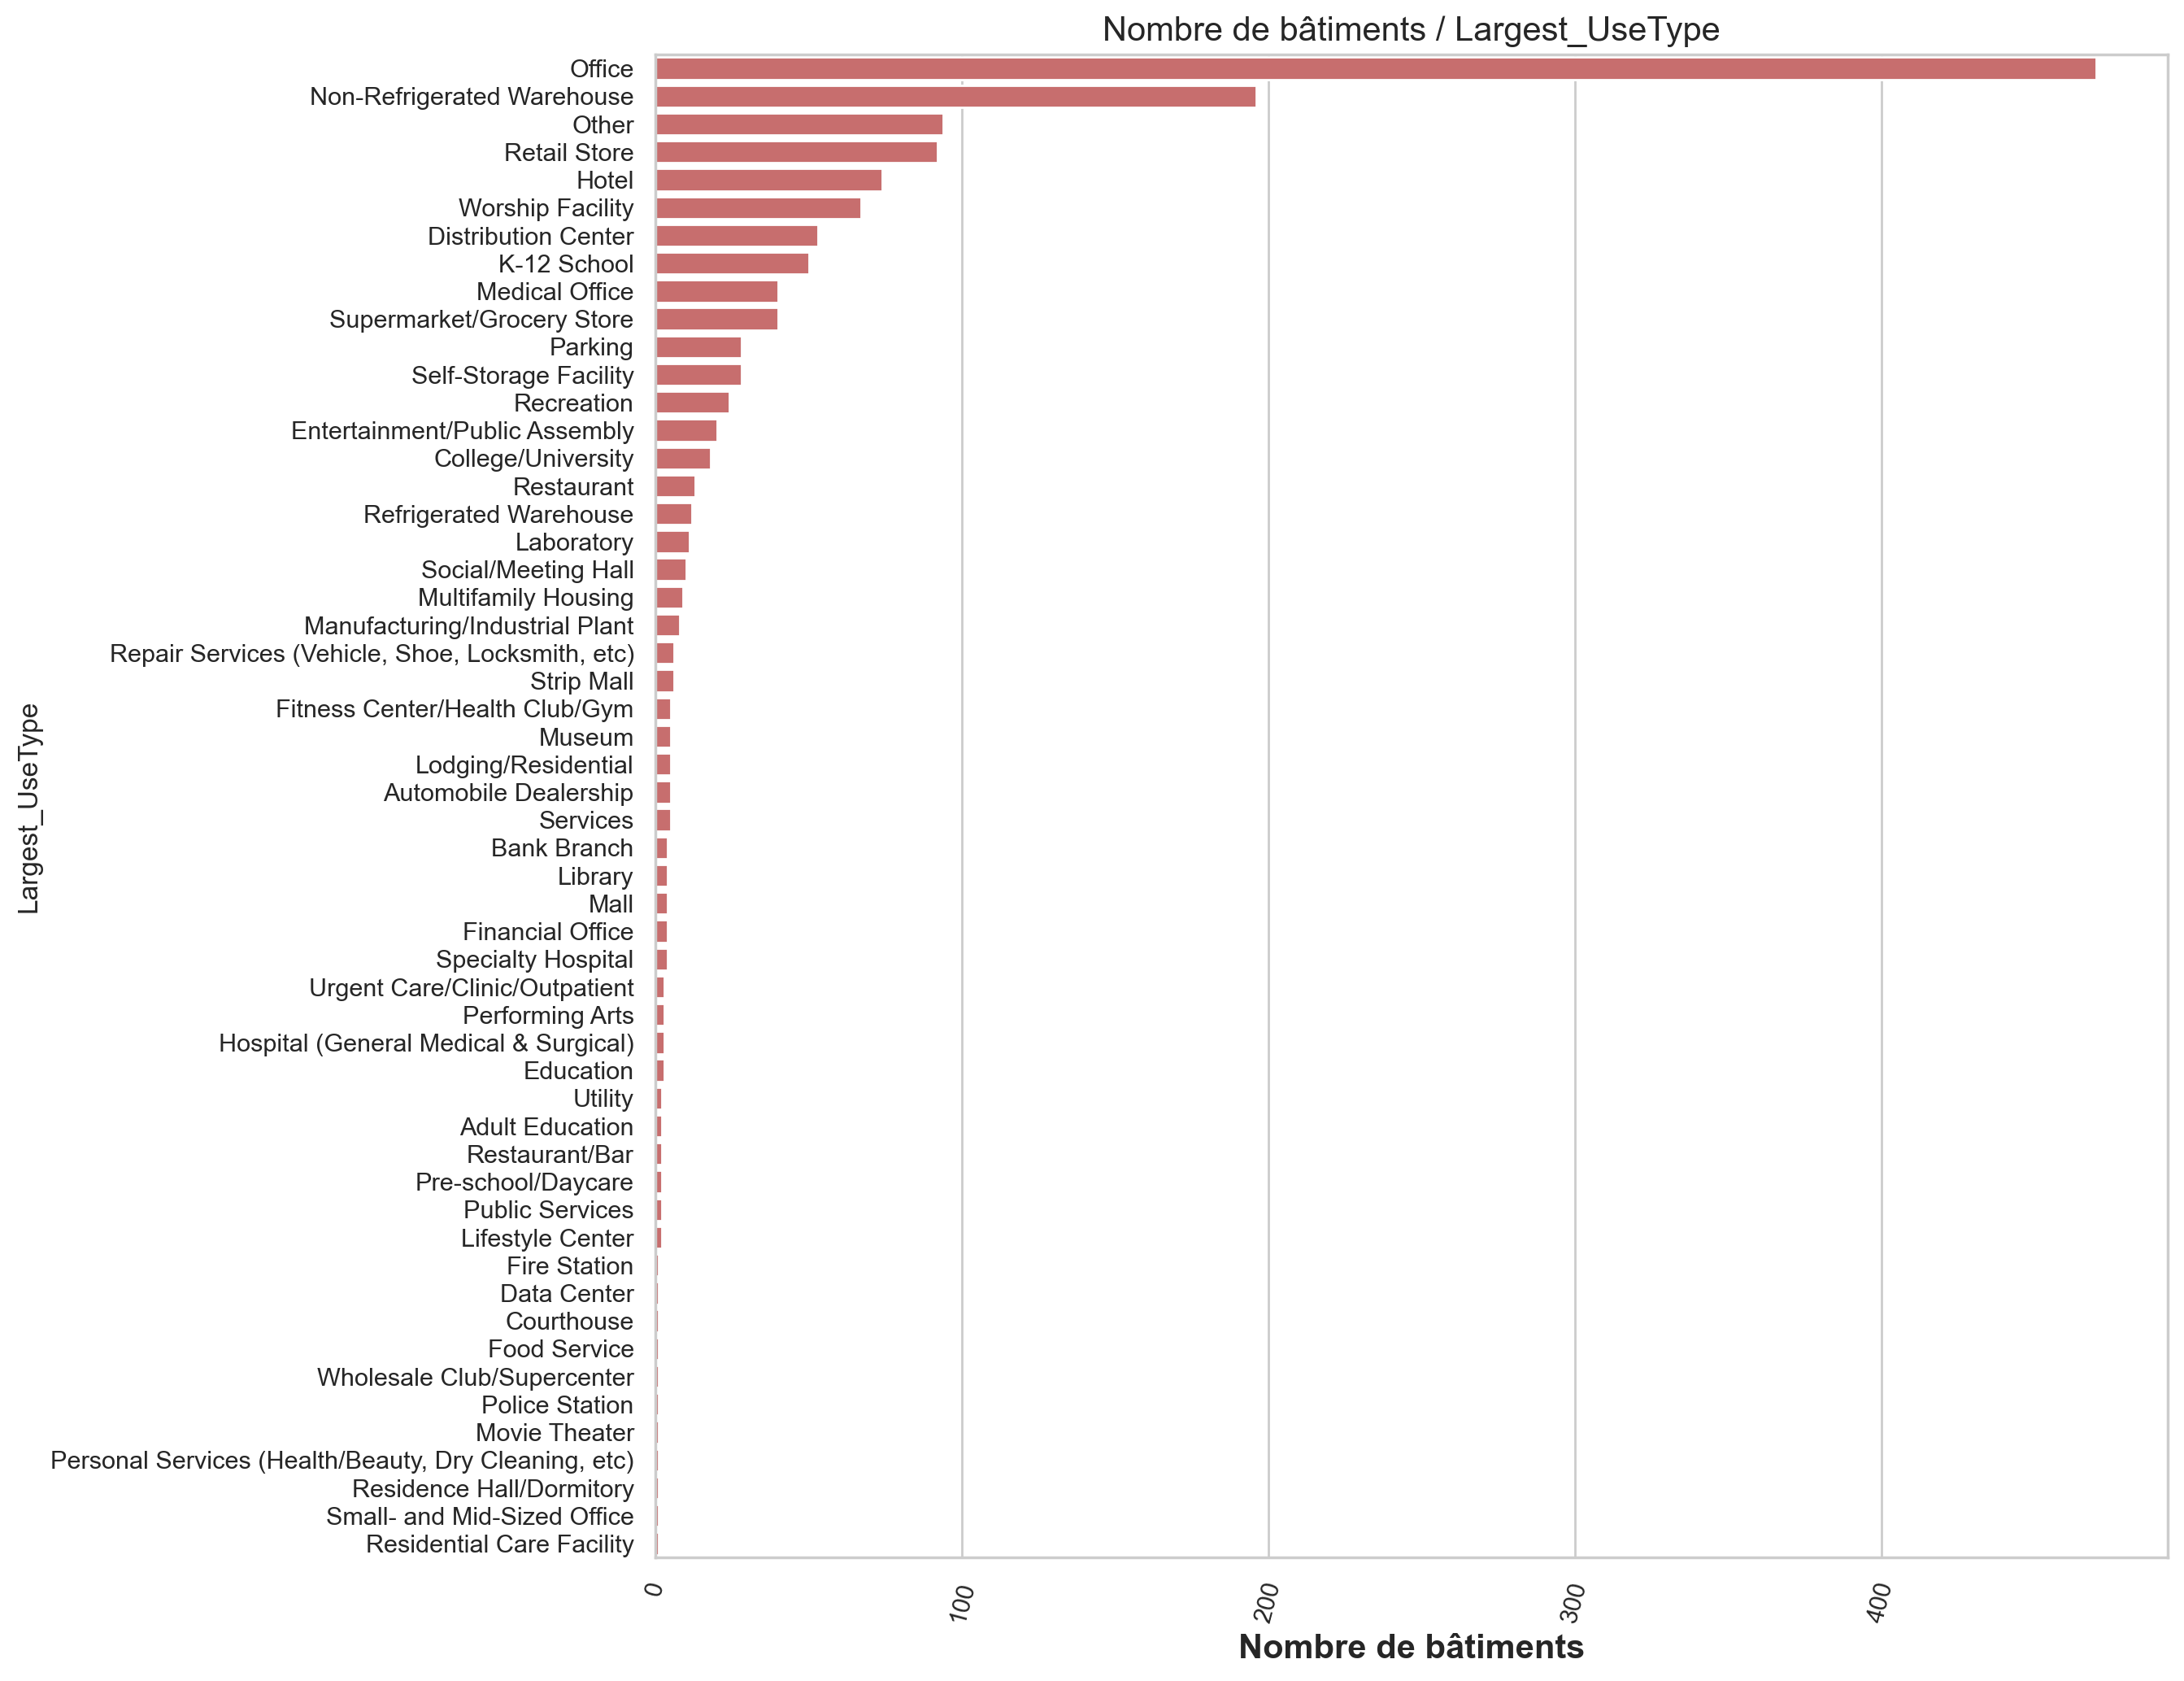

In [7]:
fig = plt.figure(figsize=(12, 12), dpi=200)
data_plot = df['Largest_UseType']
sns.countplot(y=data_plot, order = df['Largest_UseType'].value_counts(normalize=True).index, color='r')
plt.xticks(rotation=75);
plt.title('Nombre de bâtiments / Largest_UseType', fontsize=15)
plt.xlabel('Nombre de bâtiments', fontsize=15, fontweight='bold')
plt.show()

## Features quantitatives

In [12]:
df.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumBuildings',
       'NmbFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFABuilding_s',
       'All_UseTypes', 'Largest_UseType', 'LargestUseType_GFA',
       'Second_UseType', 'SecondUseType_GFA', 'Third_UseType',
       'ThirdUseType_GFA', 'ENERGYSTARScore', 'SiteEUI_kBtu_sf',
       'SiteEUIWN_kBtu_sf', 'SourceEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf',
       'SiteEnergyUse_kBtu', 'SiteEnergyUseWN_kBtu', 'SteamUse_kBtu',
       'Electricity_kBtu', 'NaturalGas_kBtu', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [69]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHEAST', 'DELRIDGE', 'NORTH', 'SOUTHWEST'], dtype=object)

In [70]:
df.select_dtypes(np.number).columns

Index(['DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumBuildings',
       'NmbFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFABuilding_s',
       'LargestUseType_GFA', 'SecondUseType_GFA', 'ThirdUseType_GFA',
       'ENERGYSTARScore', 'SiteEUI_kBtu_sf', 'SiteEUIWN_kBtu_sf',
       'SourceEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf', 'SiteEnergyUse_kBtu',
       'SiteEnergyUseWN_kBtu', 'SteamUse_kBtu', 'Electricity_kBtu',
       'NaturalGas_kBtu', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [71]:
df.select_dtypes('object').columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'All_UseTypes',
       'Largest_UseType', 'Second_UseType', 'Third_UseType'],
      dtype='object')

Nous pouvons catégoriser les variables comme suite : 

In [27]:
target_1 = ['SiteEnergyUse_kBtu']
target_2 = ['TotalGHGEmissions']

# SiteEnergyUseWN_kBtu : modélisation
# exploratoire : SiteEUIWN_kBtu_sf

features_ident = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood','Largest_UseType', 
                  'Second_UseType','Third_UseType']

year_built = ['YearBuilt']

profil_general = [
       'NumBuildings', 'NmbFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFABuilding_s',
       'LargestUseType_GFA', 'SecondUseType_GFA', 'ThirdUseType_GFA'
       , 'ENERGYSTARScore']


profil_consommation = [
       'SiteEUI_kBtu_sf', 'SiteEUIWN_kBtu_sf',
       'SourceEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf',
       'SiteEnergyUseWN_kBtu', 'SteamUse_kBtu', 'Electricity_kBtu',
       'NaturalGas_kBtu' ,'SiteEnergyUse_kBtu']

profil_emission = ['TotalGHGEmissions', 'GHGEmissionsIntensity' ]

emission_energy_gfa = ['SiteEnergyUse_kBtu', 'TotalGHGEmissions', 'PropertyGFATotal', 'LargestUseType_GFA', 'SecondUseType_GFA', 'ThirdUseType_GFA']

### Distribution de Targets et Features Superficies

In [17]:
# Code Copié : https://github.com/samirhinojosa/OC-P4-consumption-needs-of-buildings/blob/master/analysis_notebook.ipynb
def plot_distribution(df, columns):
    df_ = df.copy()

    for col in columns:
        df_[col + "_log"] = np.log(df_[col] + 1)
        df_[col + "_log2"] = np.log2(df_[col] + 1)
        df_[col + "_log10"] = np.log10(df_[col] + 1)

    for var in columns:

        # We are going to work only with the rows without missing-values for the features
        df_subset = pd.DataFrame(df_[df_[[col]].notnull().all(axis=1)]).reset_index(drop=True)

        var_cols = [var + "", var + "_log", var + "_log2", var + "_log10"]

        fig = plt.figure(constrained_layout=True, figsize=[15,10])
        fig.suptitle(var, size=25, fontweight="bold", y=1.05)
        spec = fig.add_gridspec(ncols=2, nrows=4, width_ratios=[1,1], height_ratios=[0.3,2,0.3,2])

        # to cycle through the columns 
        col_boxplot, col_histplot = 0, 0

        for i in range(4):

            for j in range(2):

                if i % 2 == 0:

                    if col_boxplot > len(var_cols) - 1:
                        break

                    ax_box = fig.add_subplot(spec[i, j])
                    boxplot = sns.boxplot(data=df_subset, x=var_cols[col_boxplot], ax=ax_box)

                    # Remove x axis name for the boxplot
                    ax_box.set(xlabel="", xticks=[])
                    ax_box.set(yticks=[])

                    boxplot.set_title(var_cols[col_boxplot], fontdict={ "fontsize": 15, "fontweight": "bold" })

                    col_boxplot += 1

                elif i % 2 != 0:

                    if col_histplot > len(columns) - 1:
                        break

                    ax_hist = fig.add_subplot(spec[i, j])
                    sns.histplot(data=df_subset, x=var_cols[col_histplot], bins=100,  kde=True,  ax=ax_hist, hue="CouncilDistrictCode")
                    ax_hist.set(xlabel=var_cols[col_histplot])

                    col_histplot += 1

    #     plt.savefig("figures/transformation-" + var + ".png", transparent=True, bbox_inches='tight', dpi=200)
        sns.despine(fig)  
        plt.show()

### Consommation et Émissions de CO2 par Année

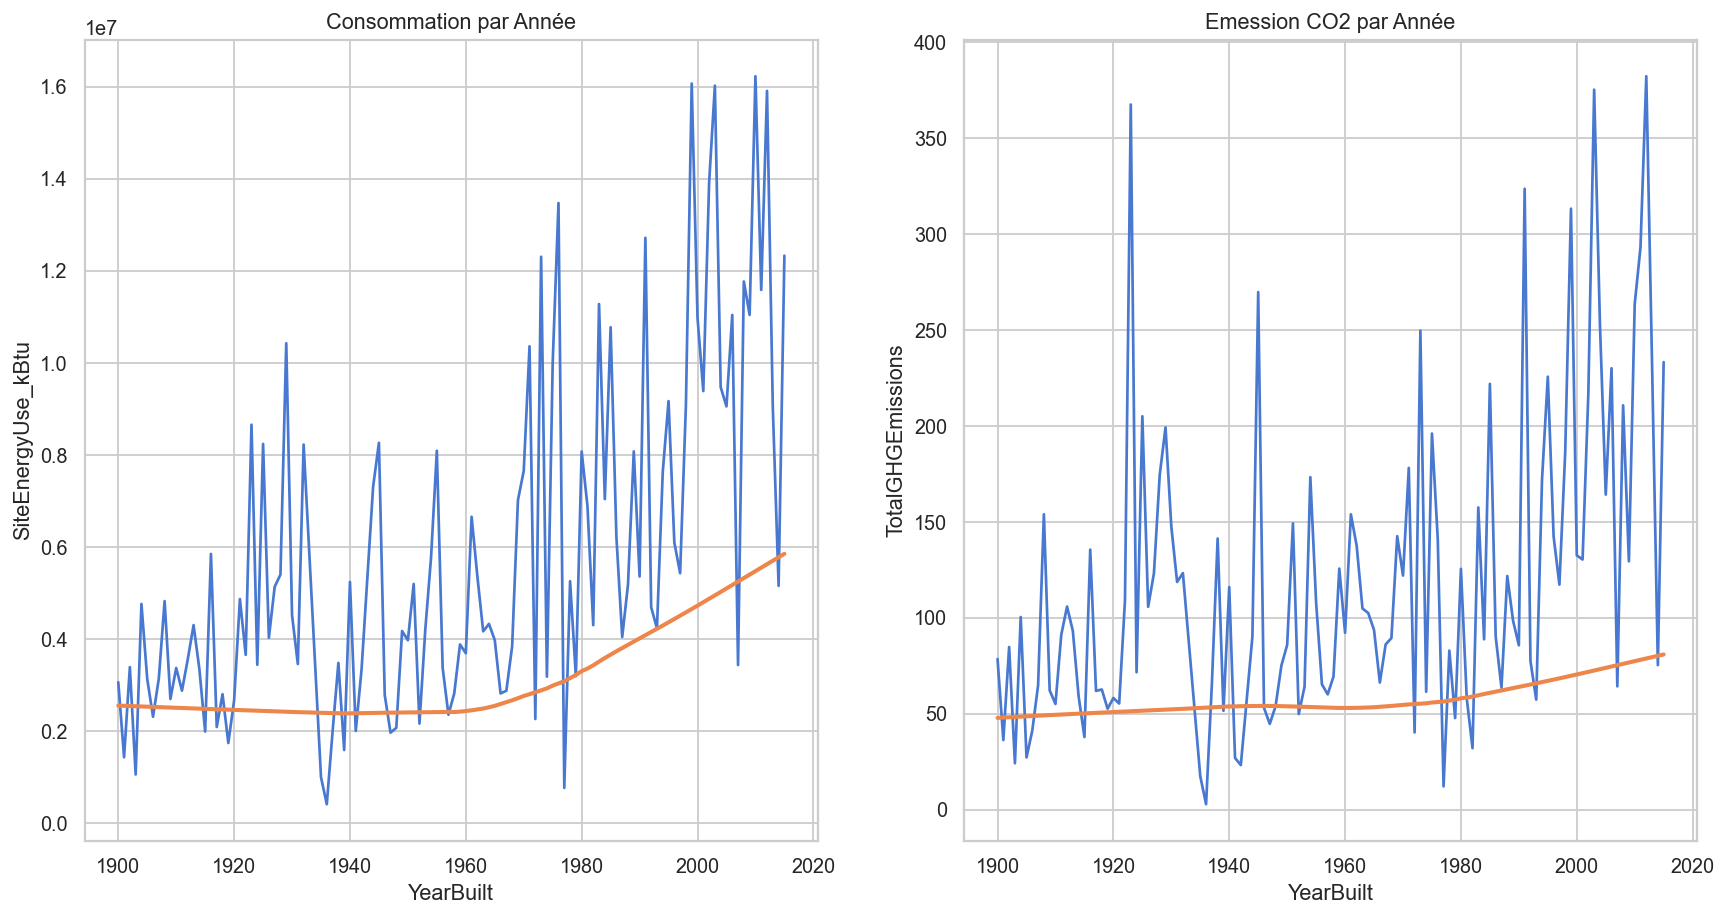

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=130)
sns.lineplot(data=df, y="SiteEnergyUse_kBtu", x='YearBuilt', ax=ax[0], ci=None).set(title='Consommation par Année')
sns.regplot(data=df, y="SiteEnergyUse_kBtu", x='YearBuilt', ax=ax[0], lowess=True, scatter=False)

sns.lineplot(data=df, y="TotalGHGEmissions", x='YearBuilt', ax=ax[1], ci=None).set(title='Émissions CO2 par Année')
sns.regplot(data=df, y="TotalGHGEmissions", x='YearBuilt', ax=ax[1], lowess=True, scatter=False)

plt.show()


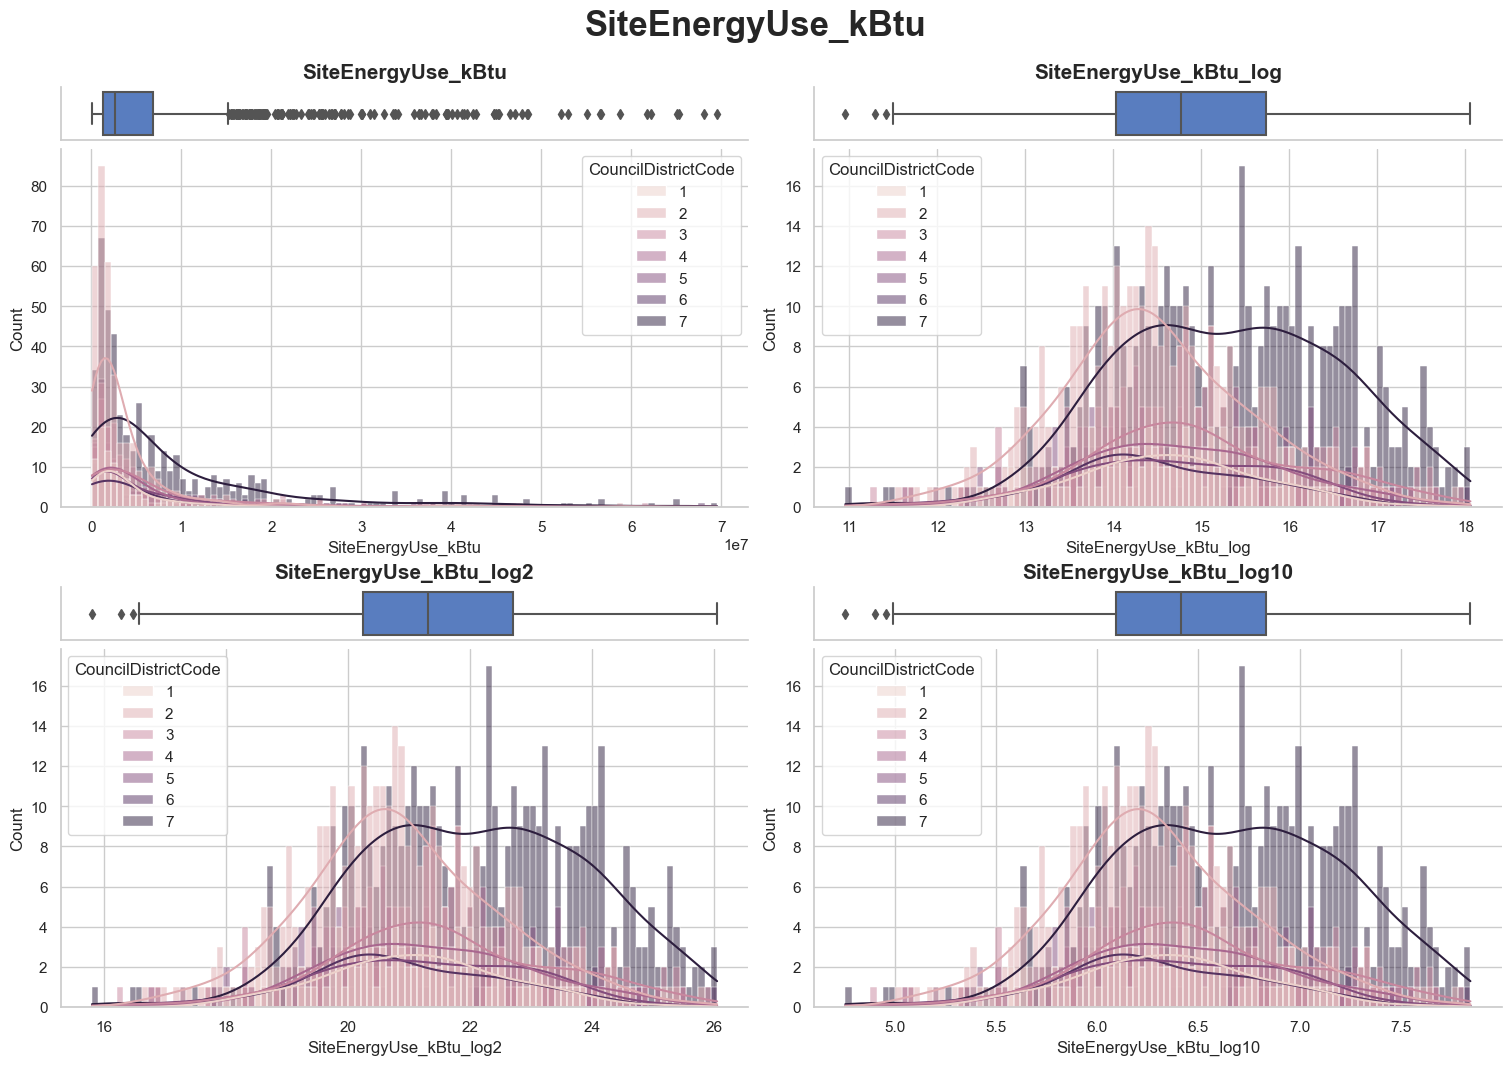

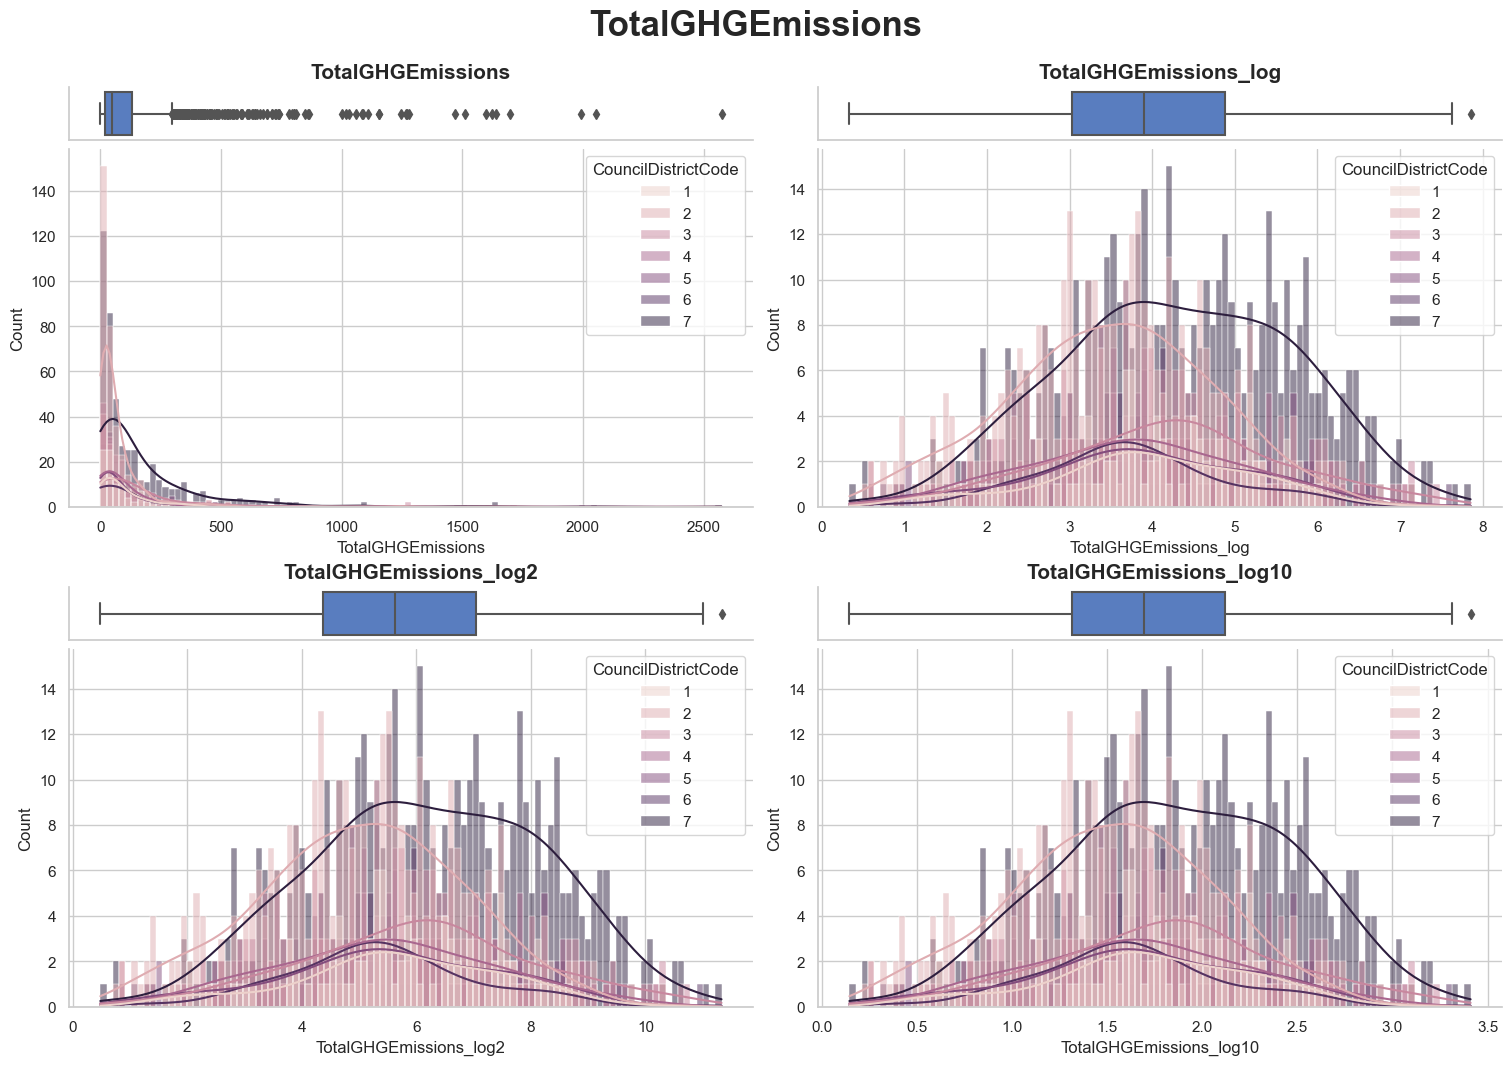

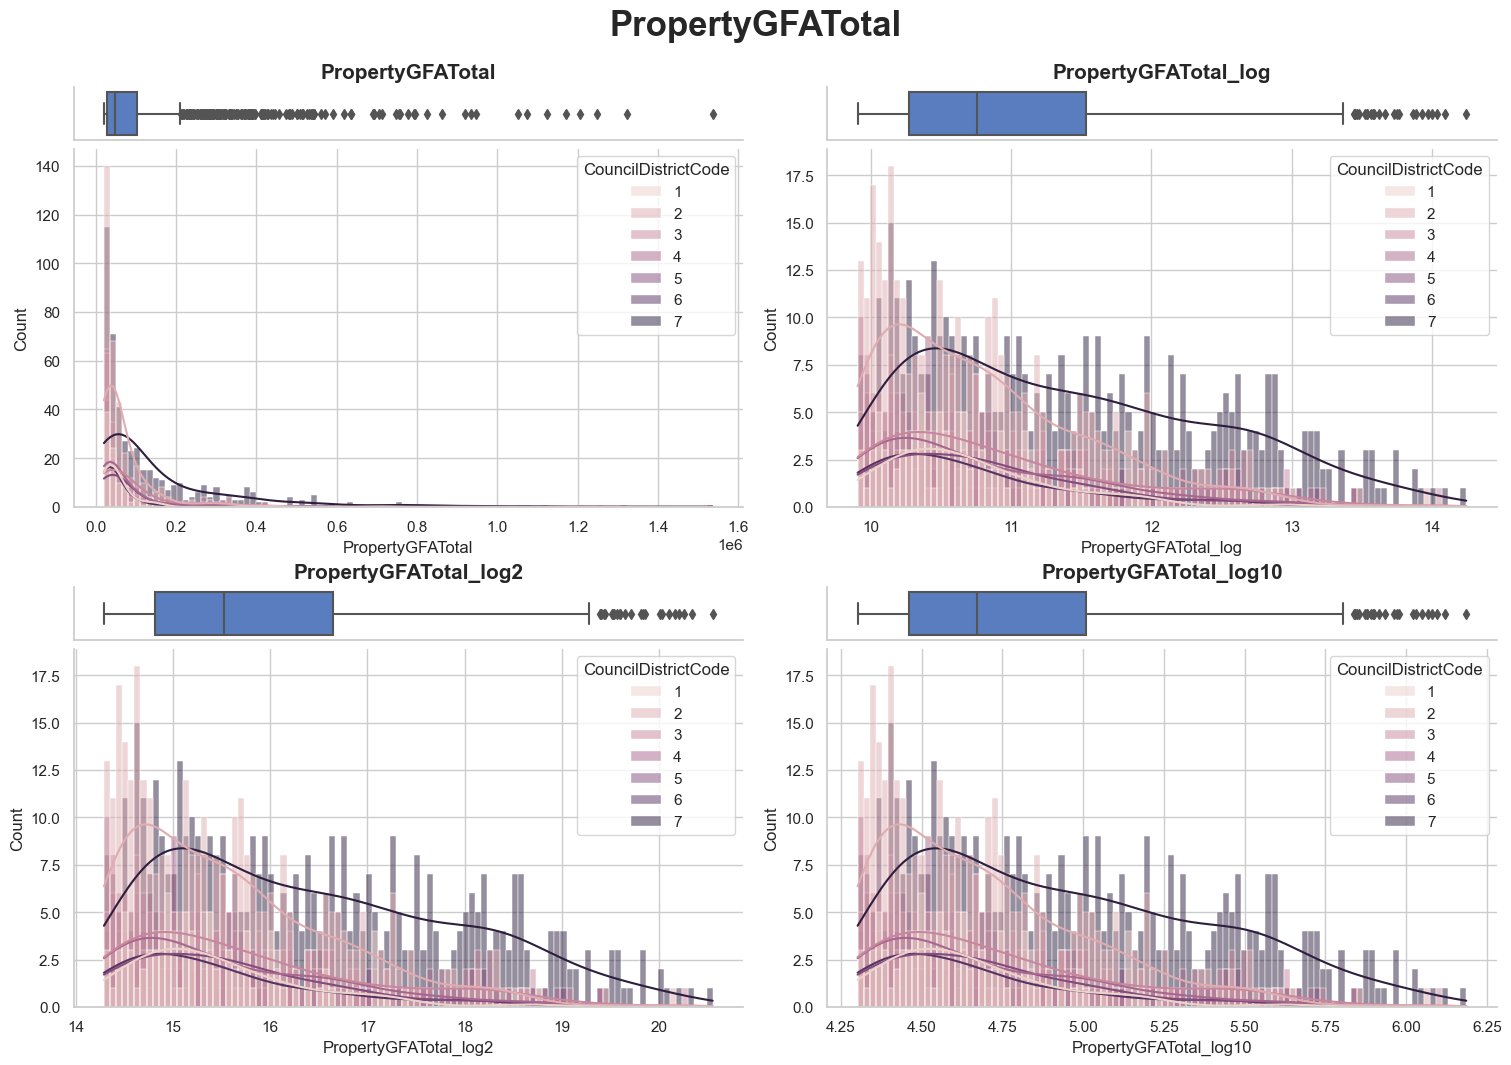

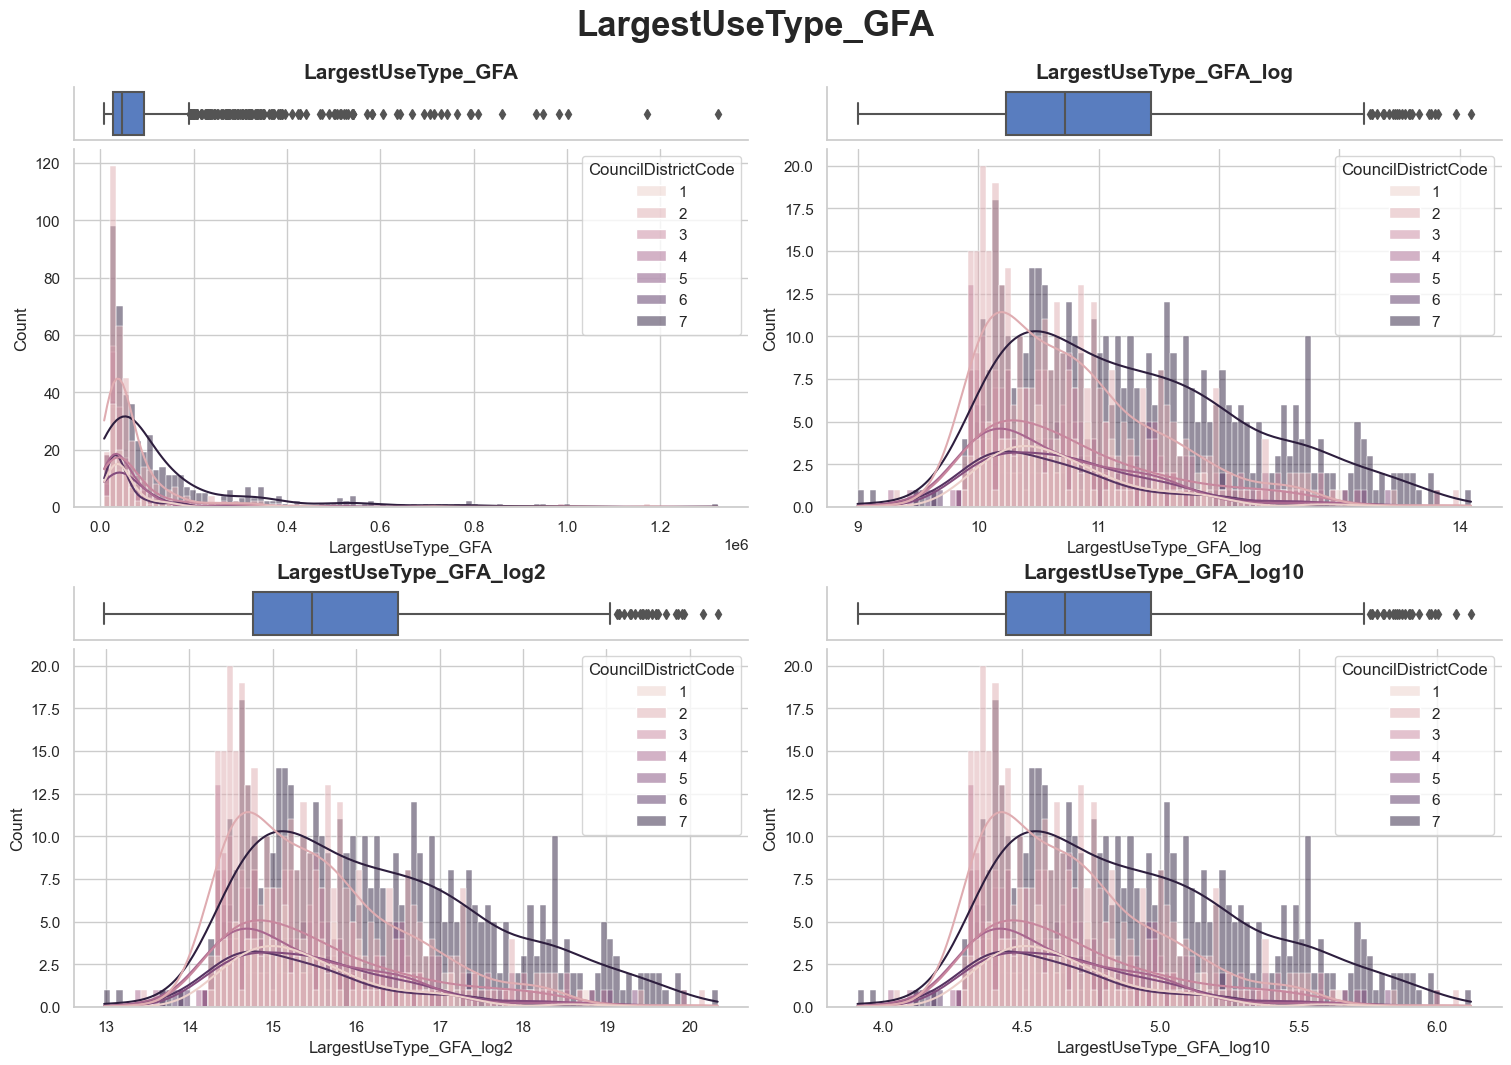

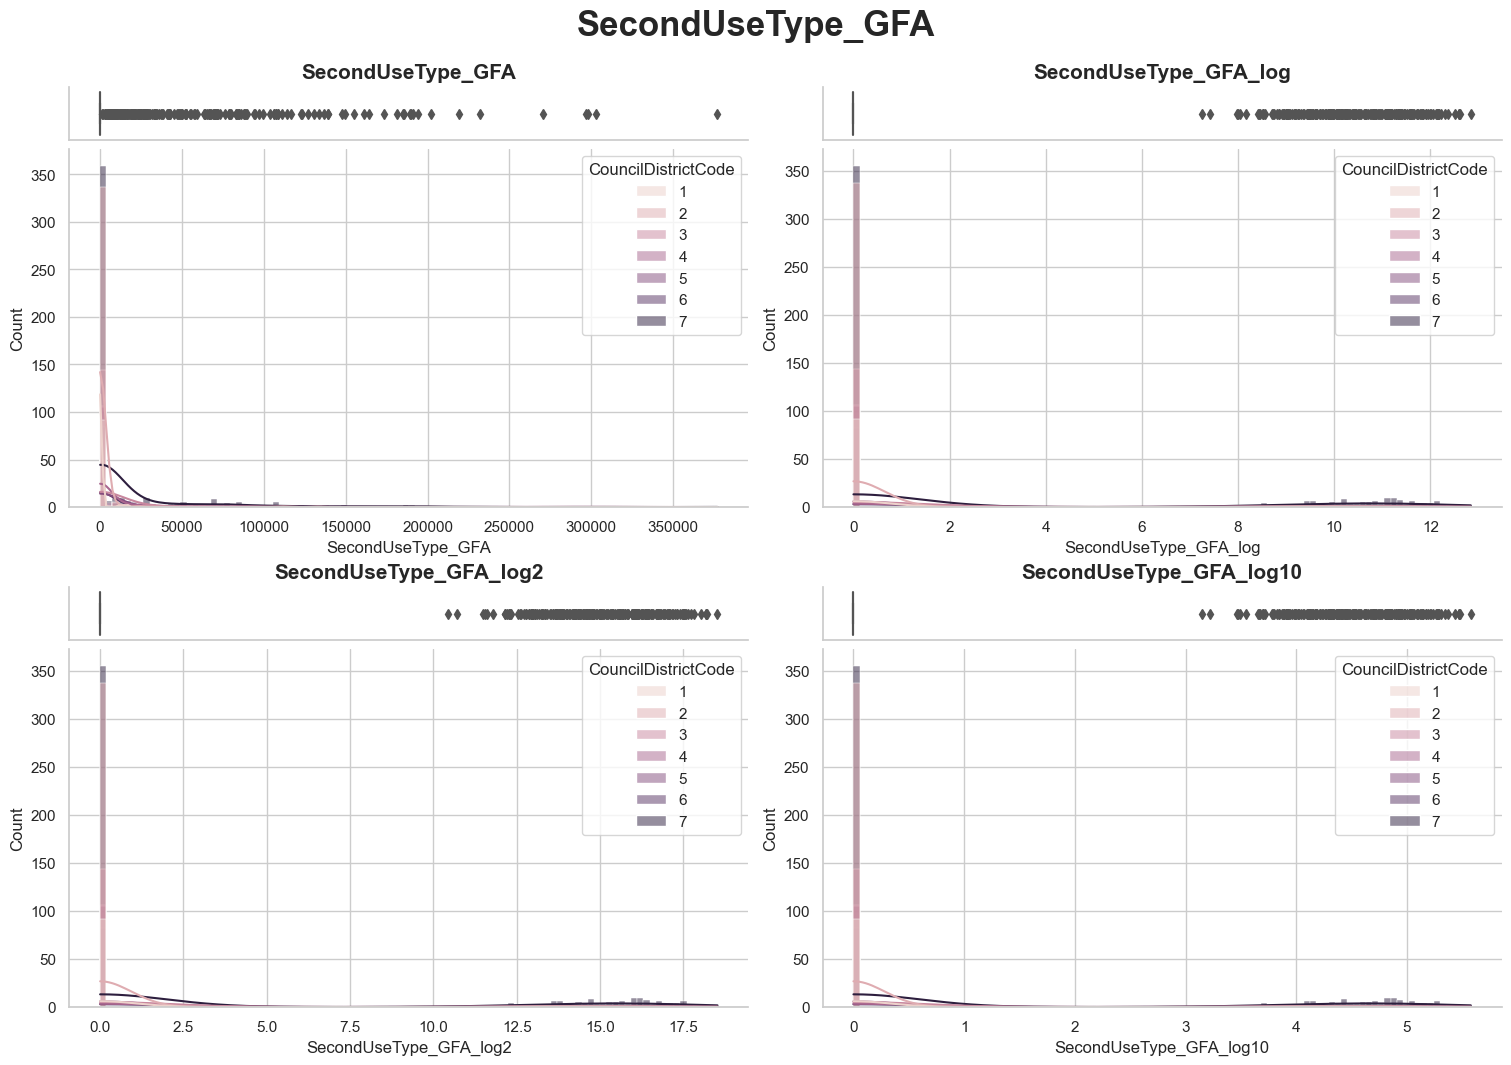

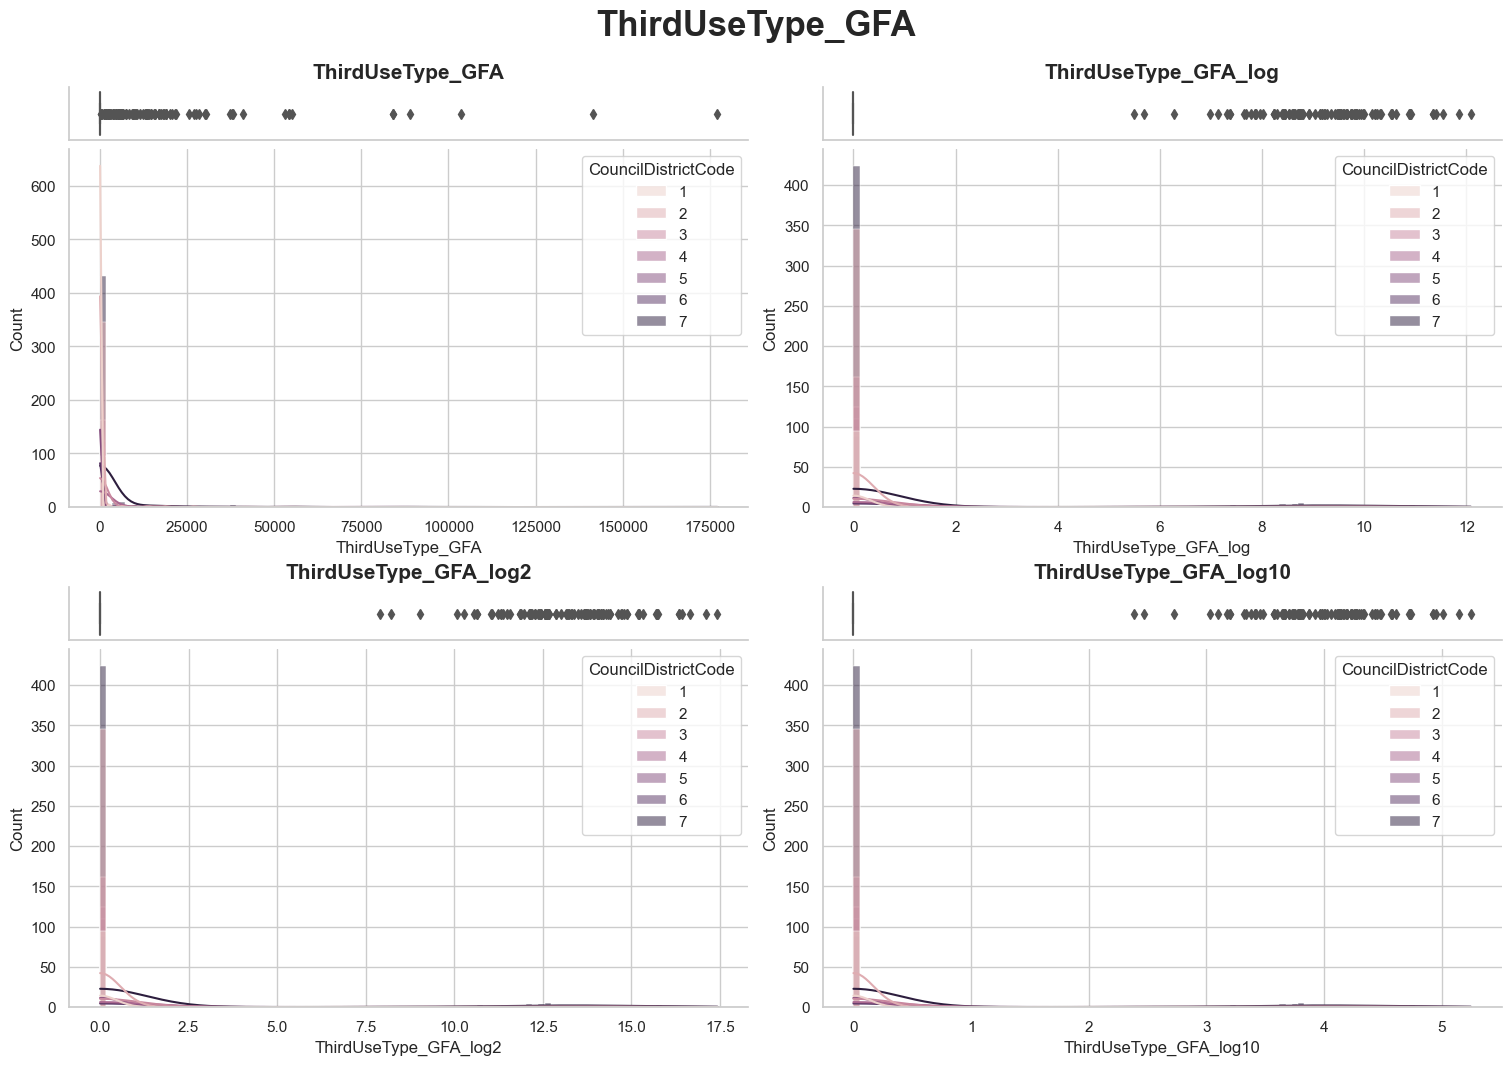

In [18]:
# Distiribution Consommation Energie, Émissions CO2 et Features Superficies
plot_distribution(df, emission_energy_gfa)

### Profil Consommation d'énergies

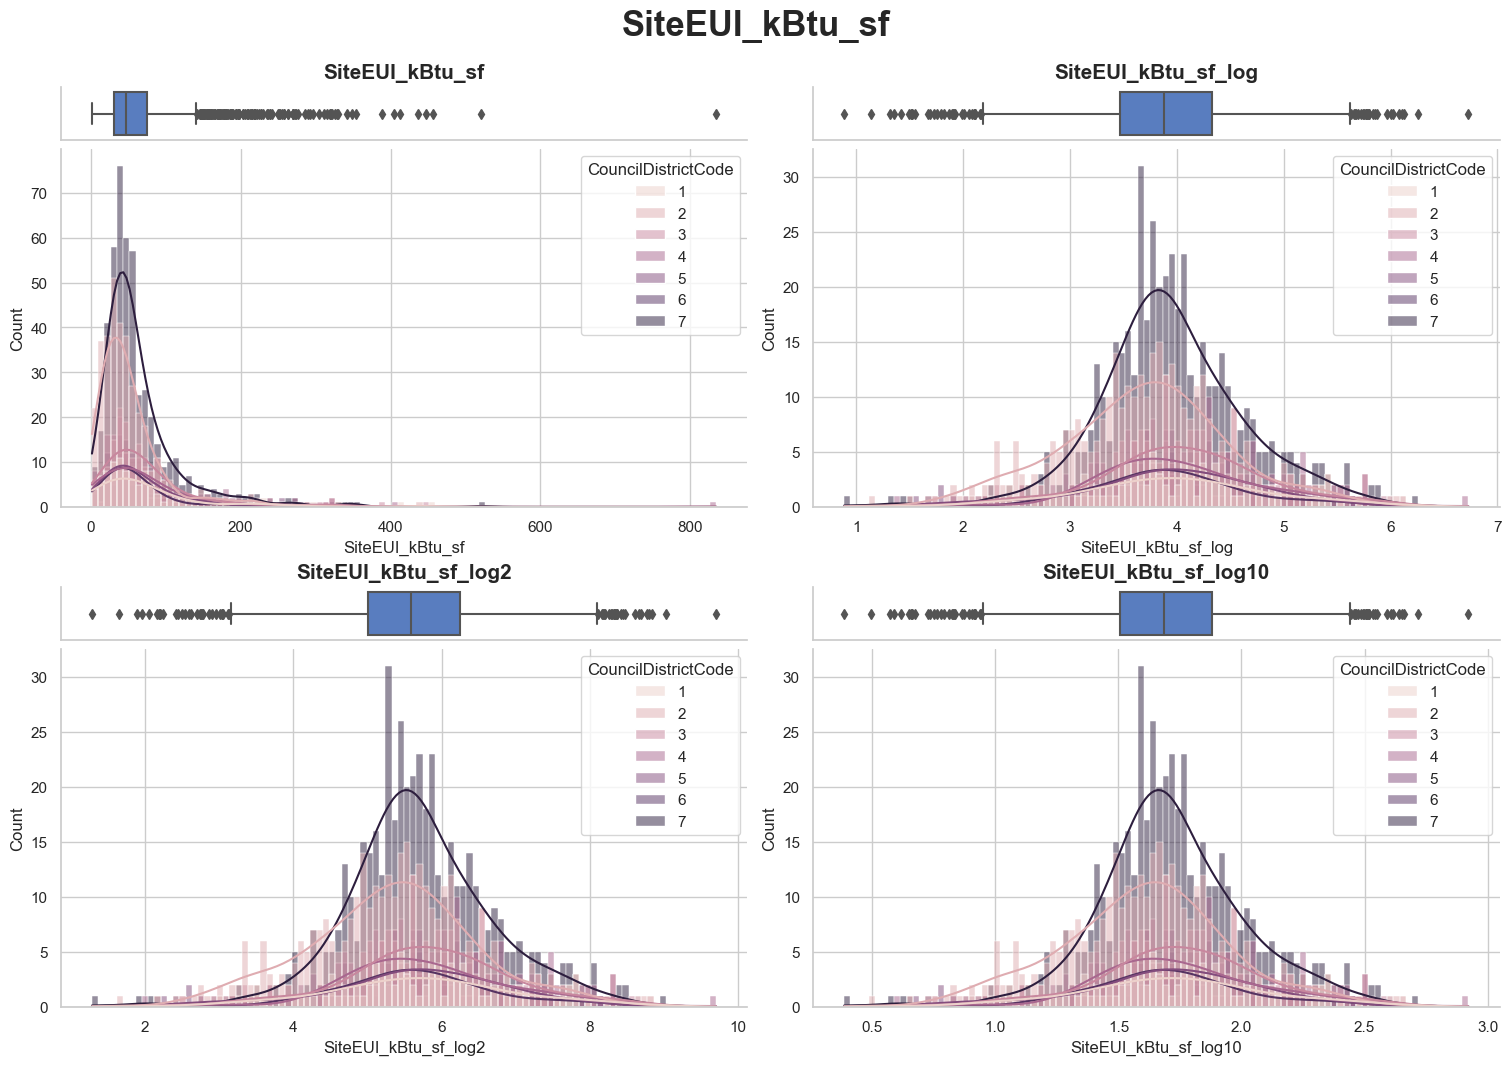

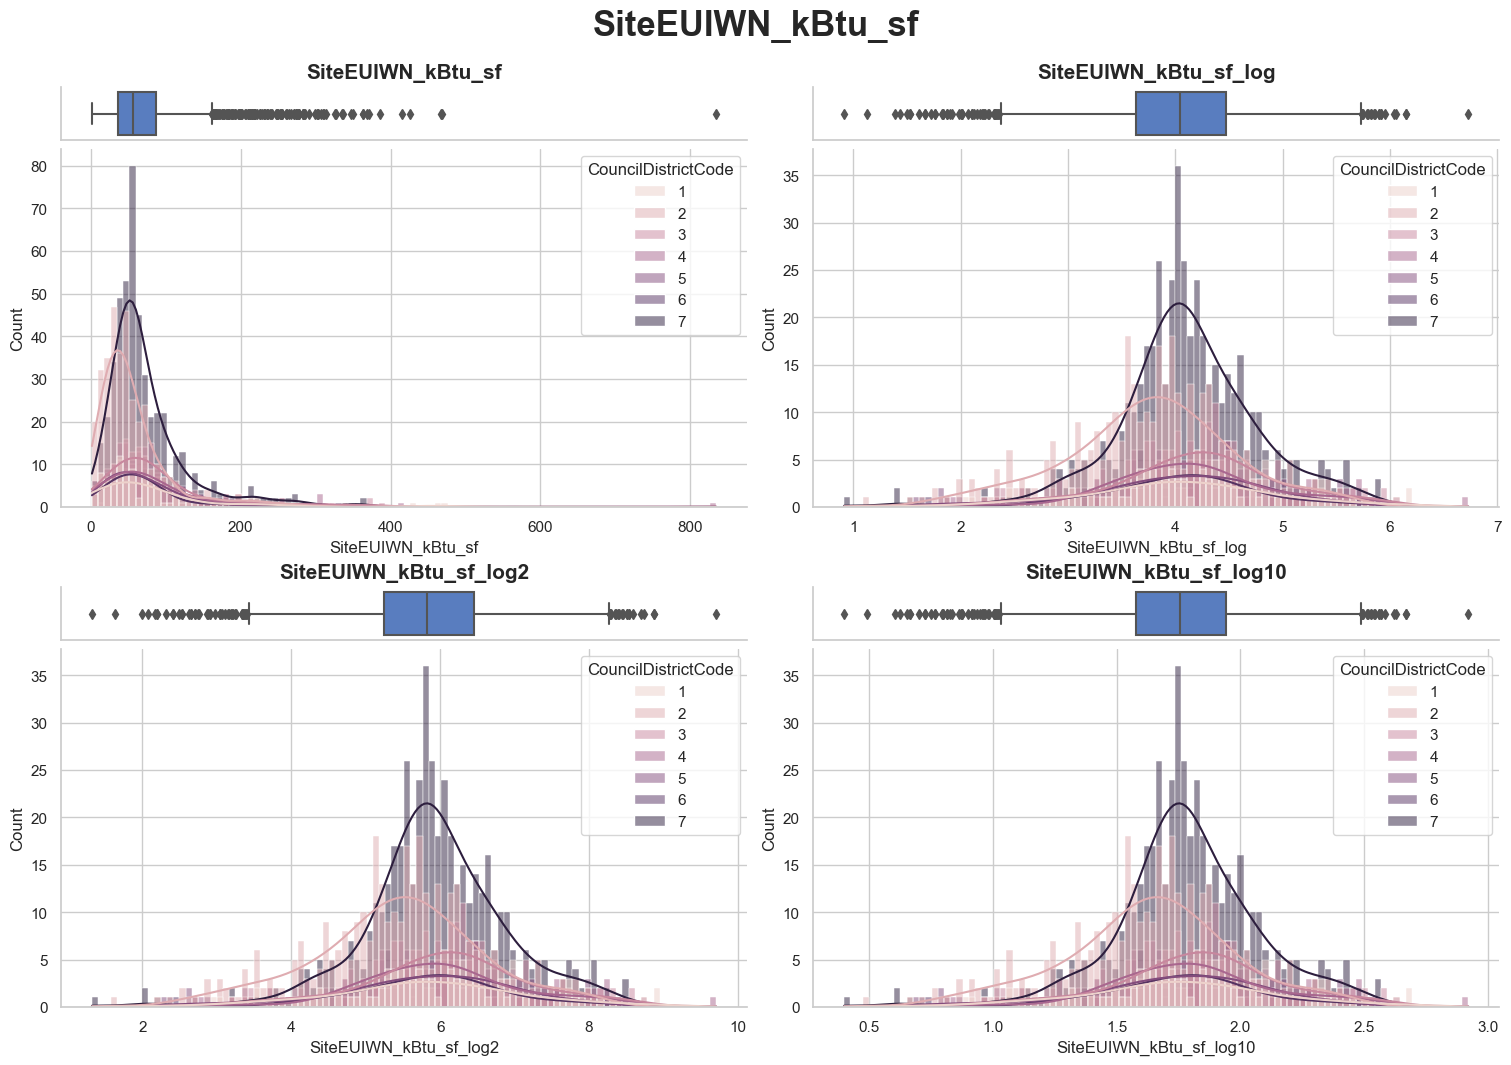

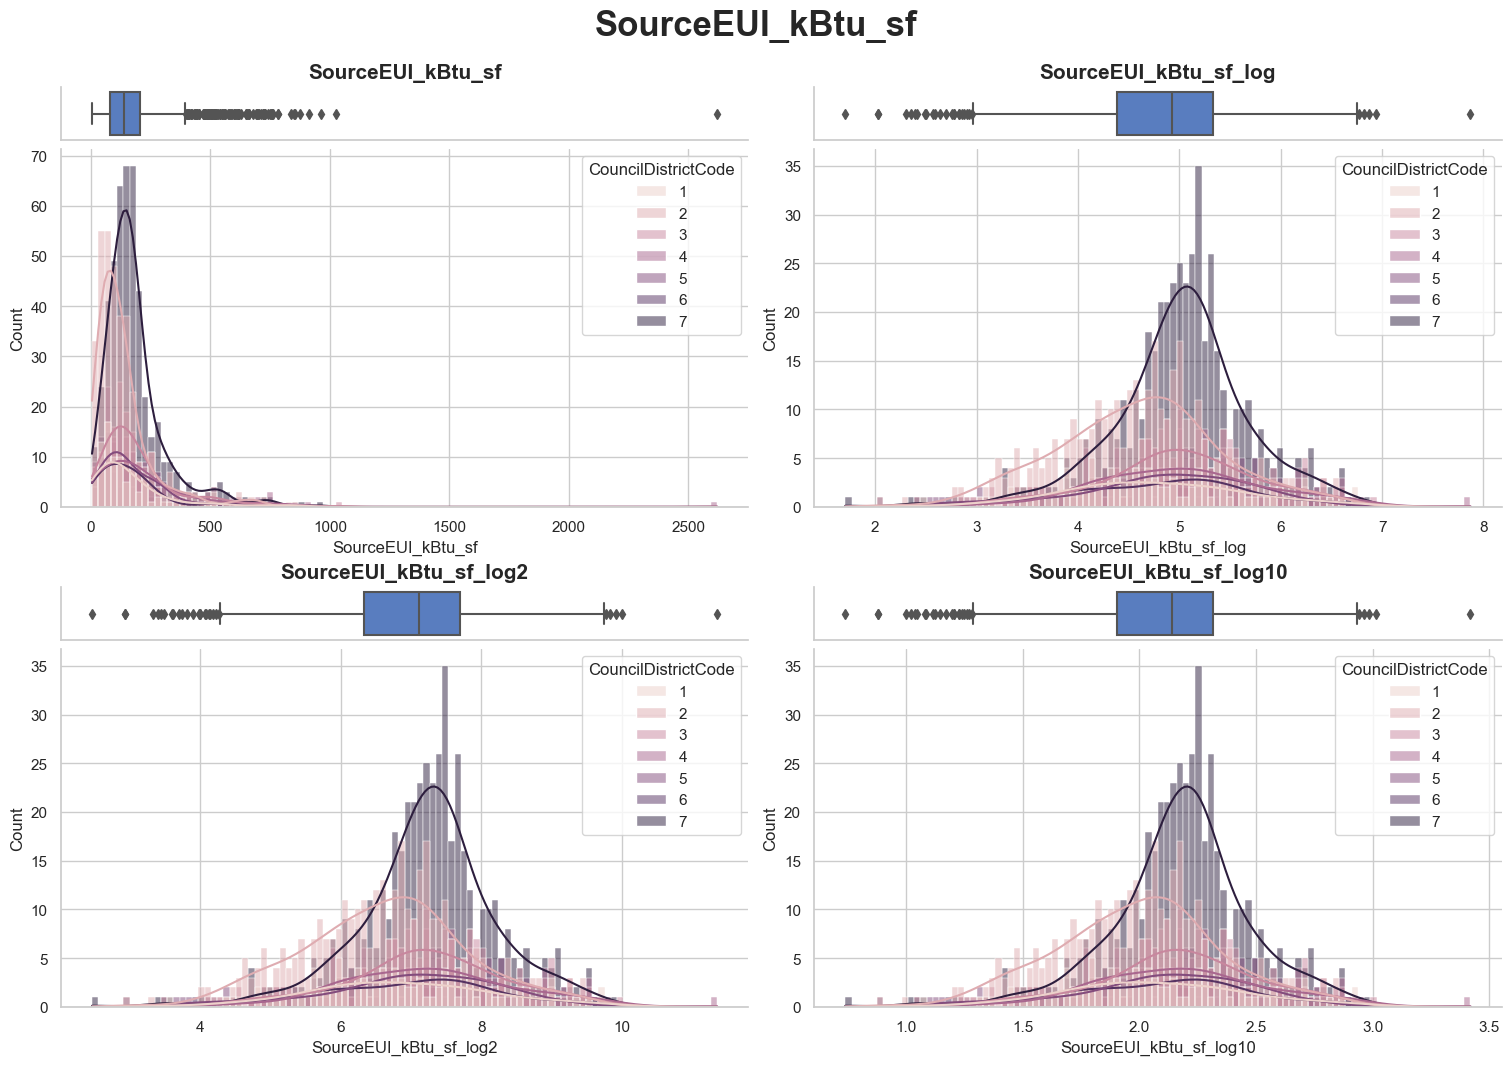

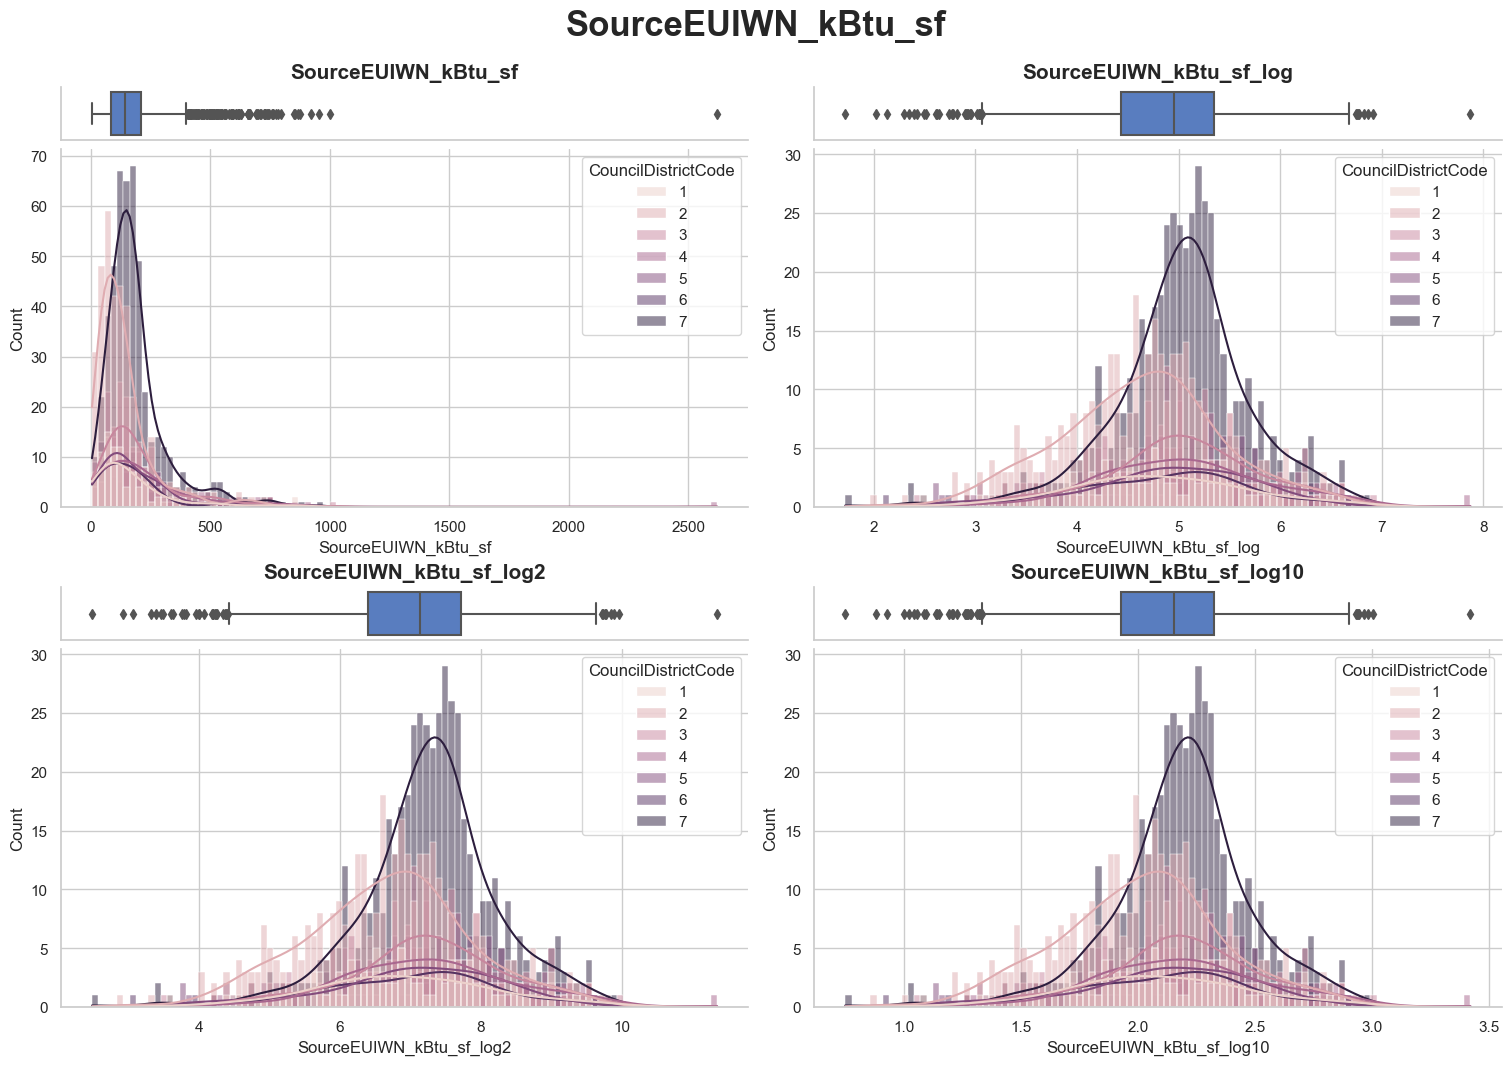

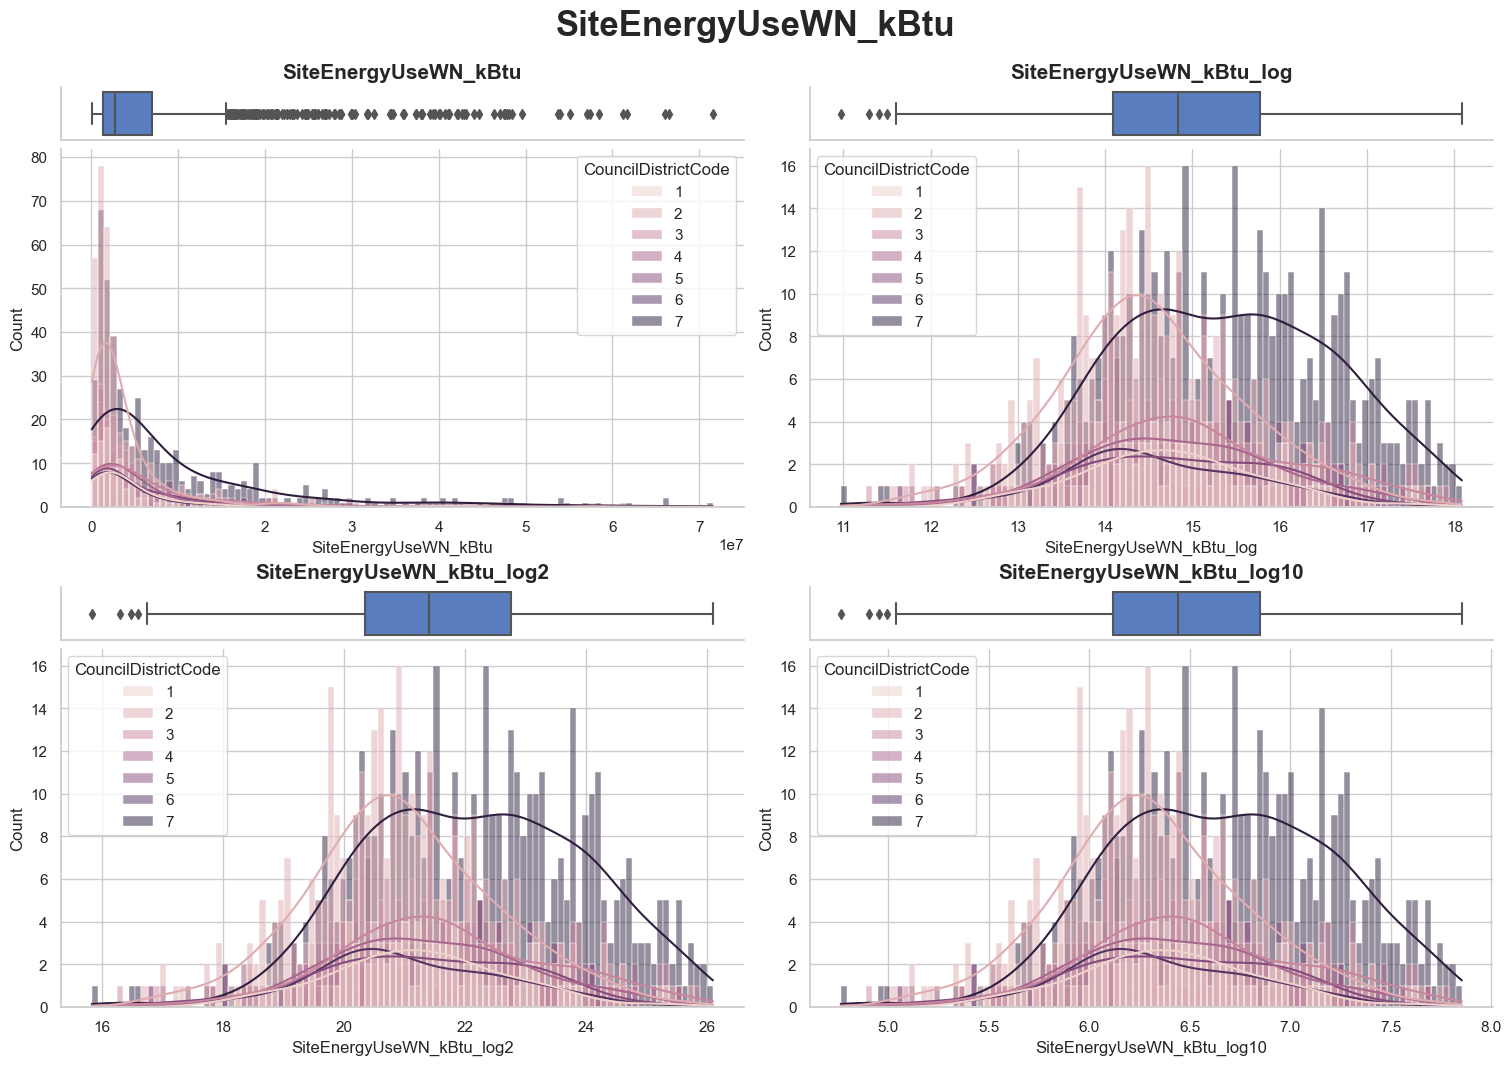

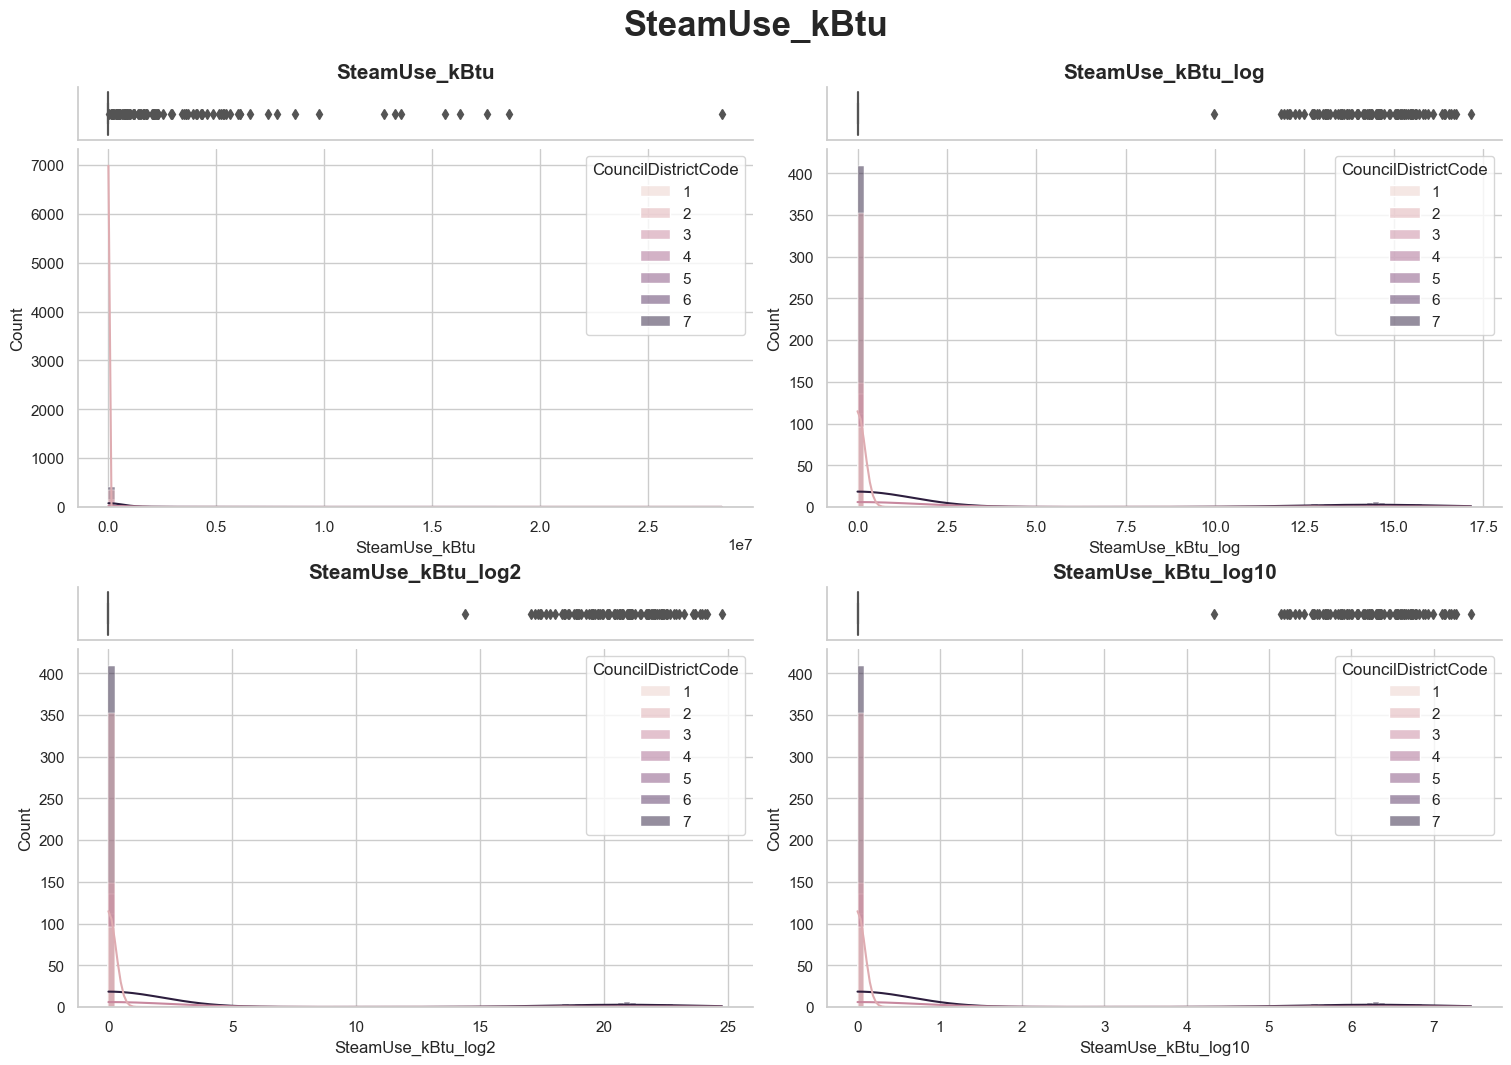

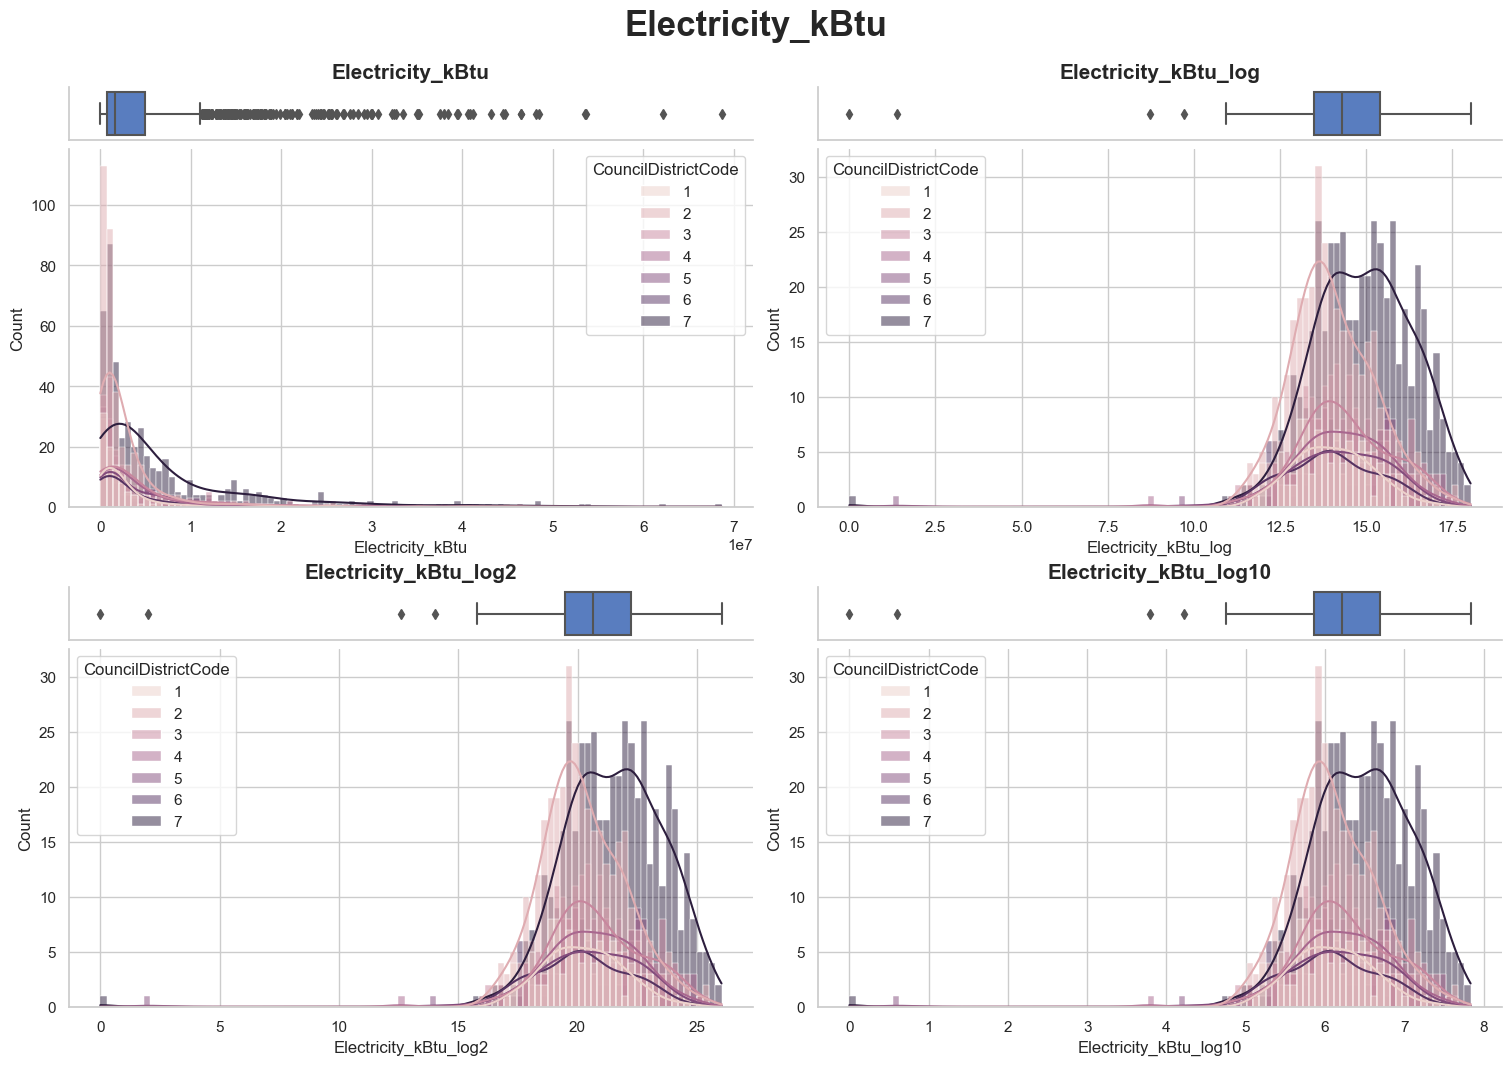

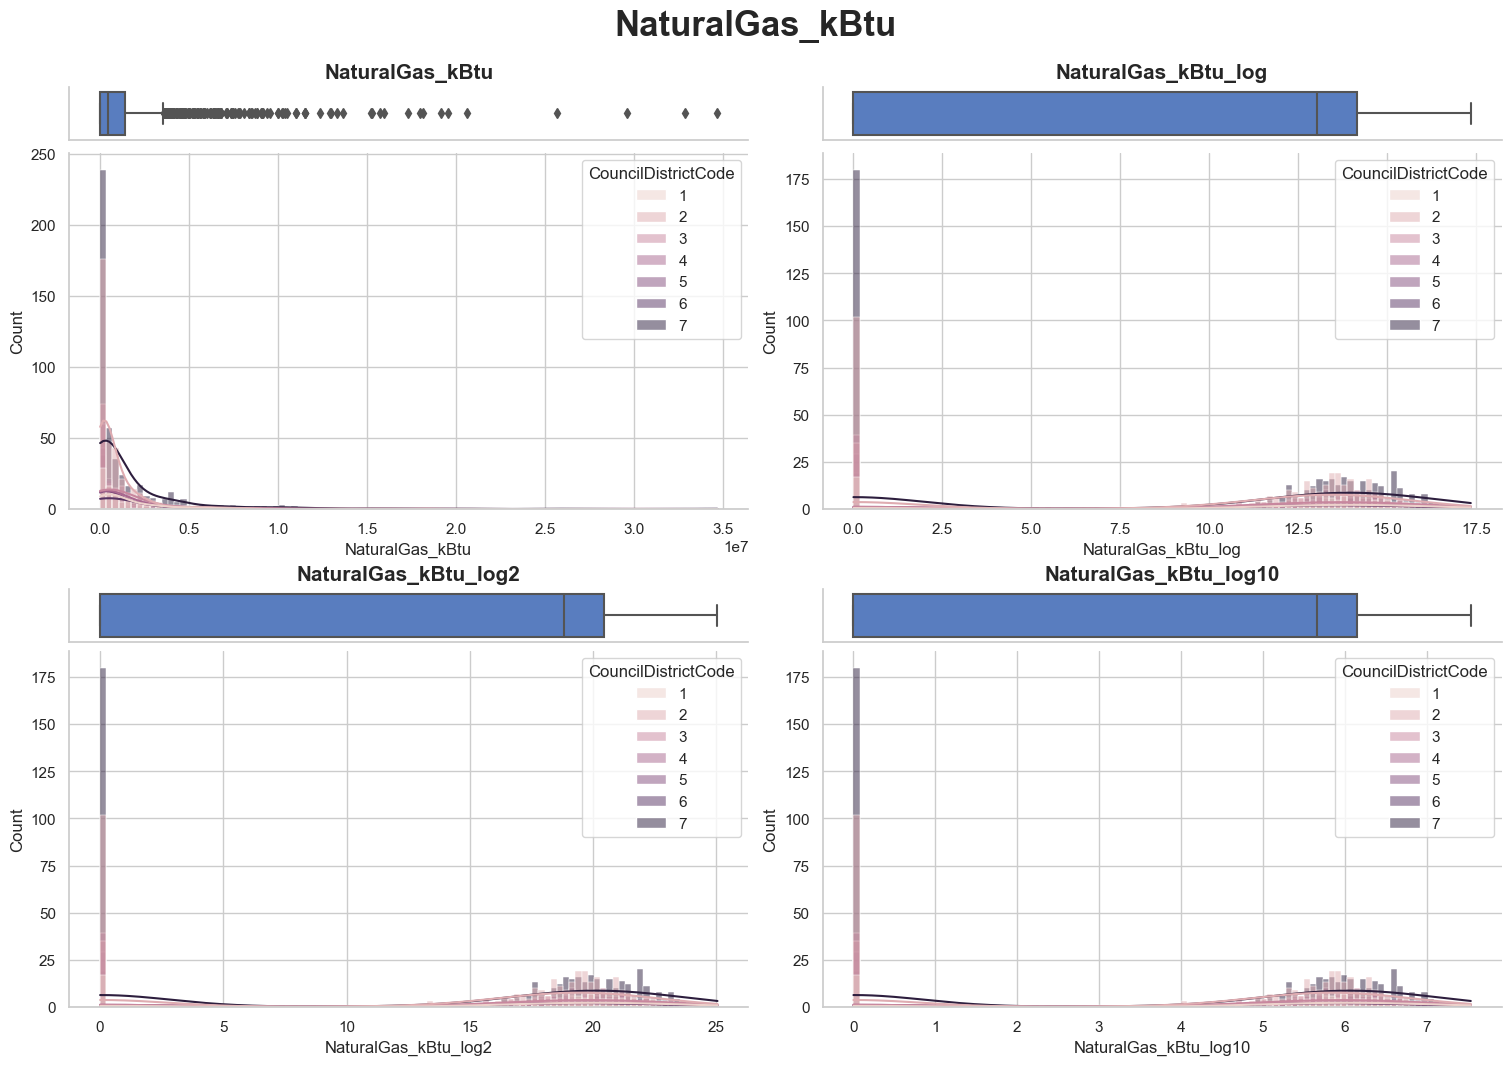

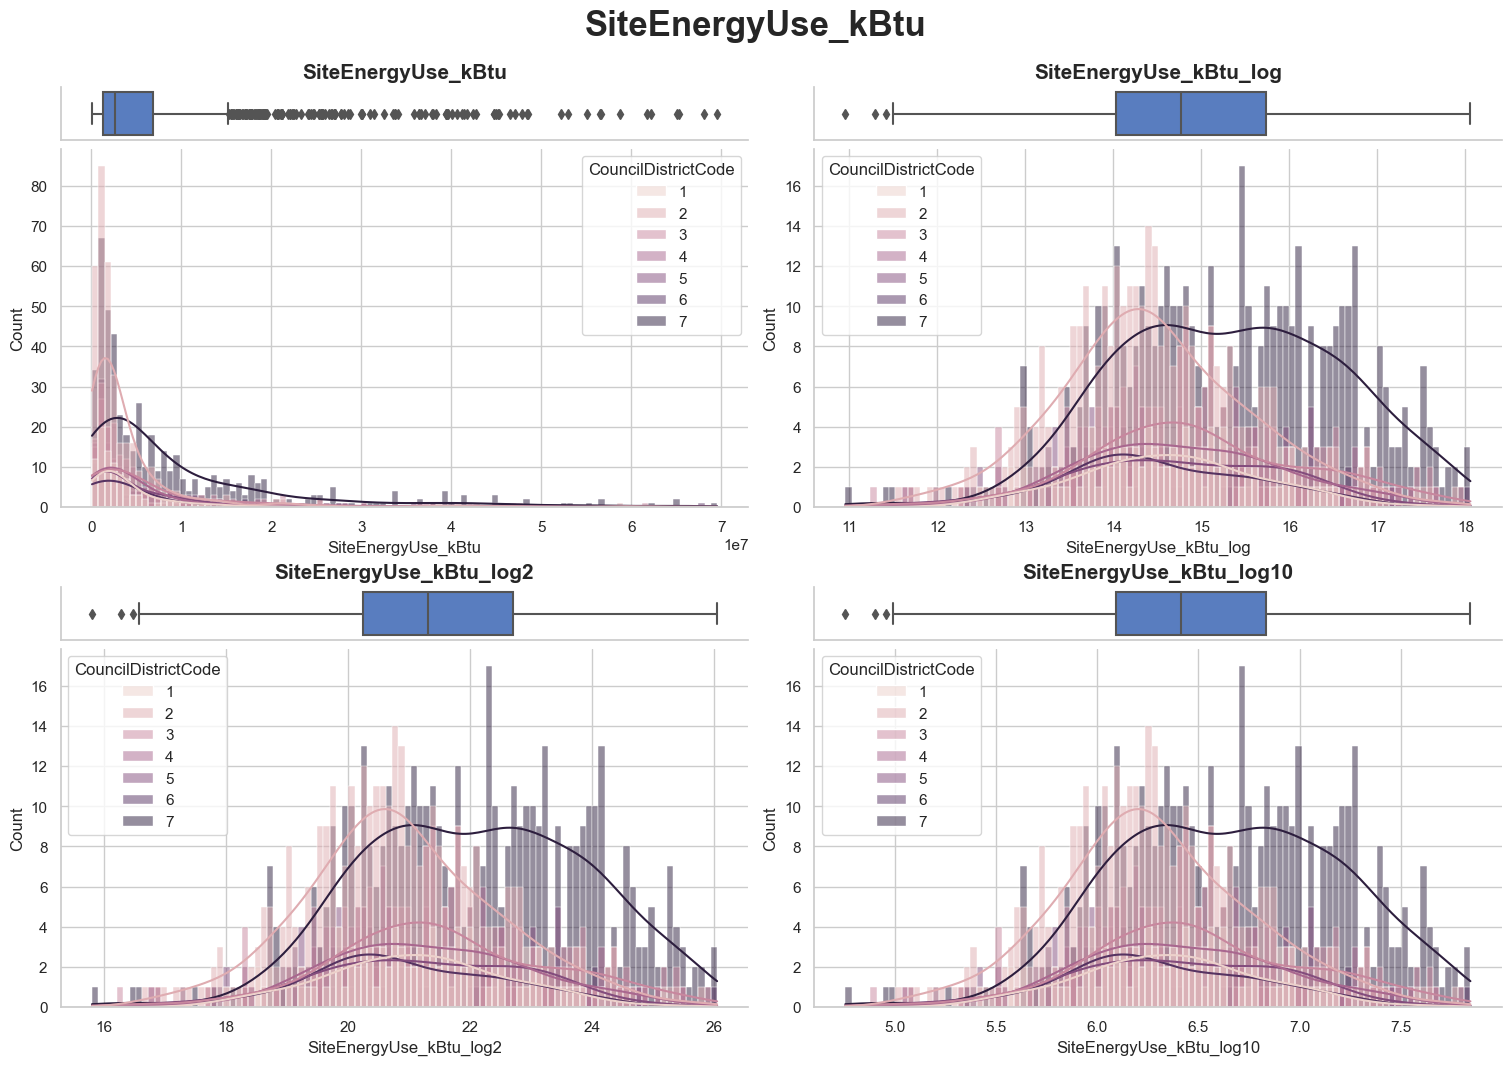

In [19]:
# Distiribution : Profil consommation d'énergies
plot_distribution(df, profil_consommation)

### Profil général 

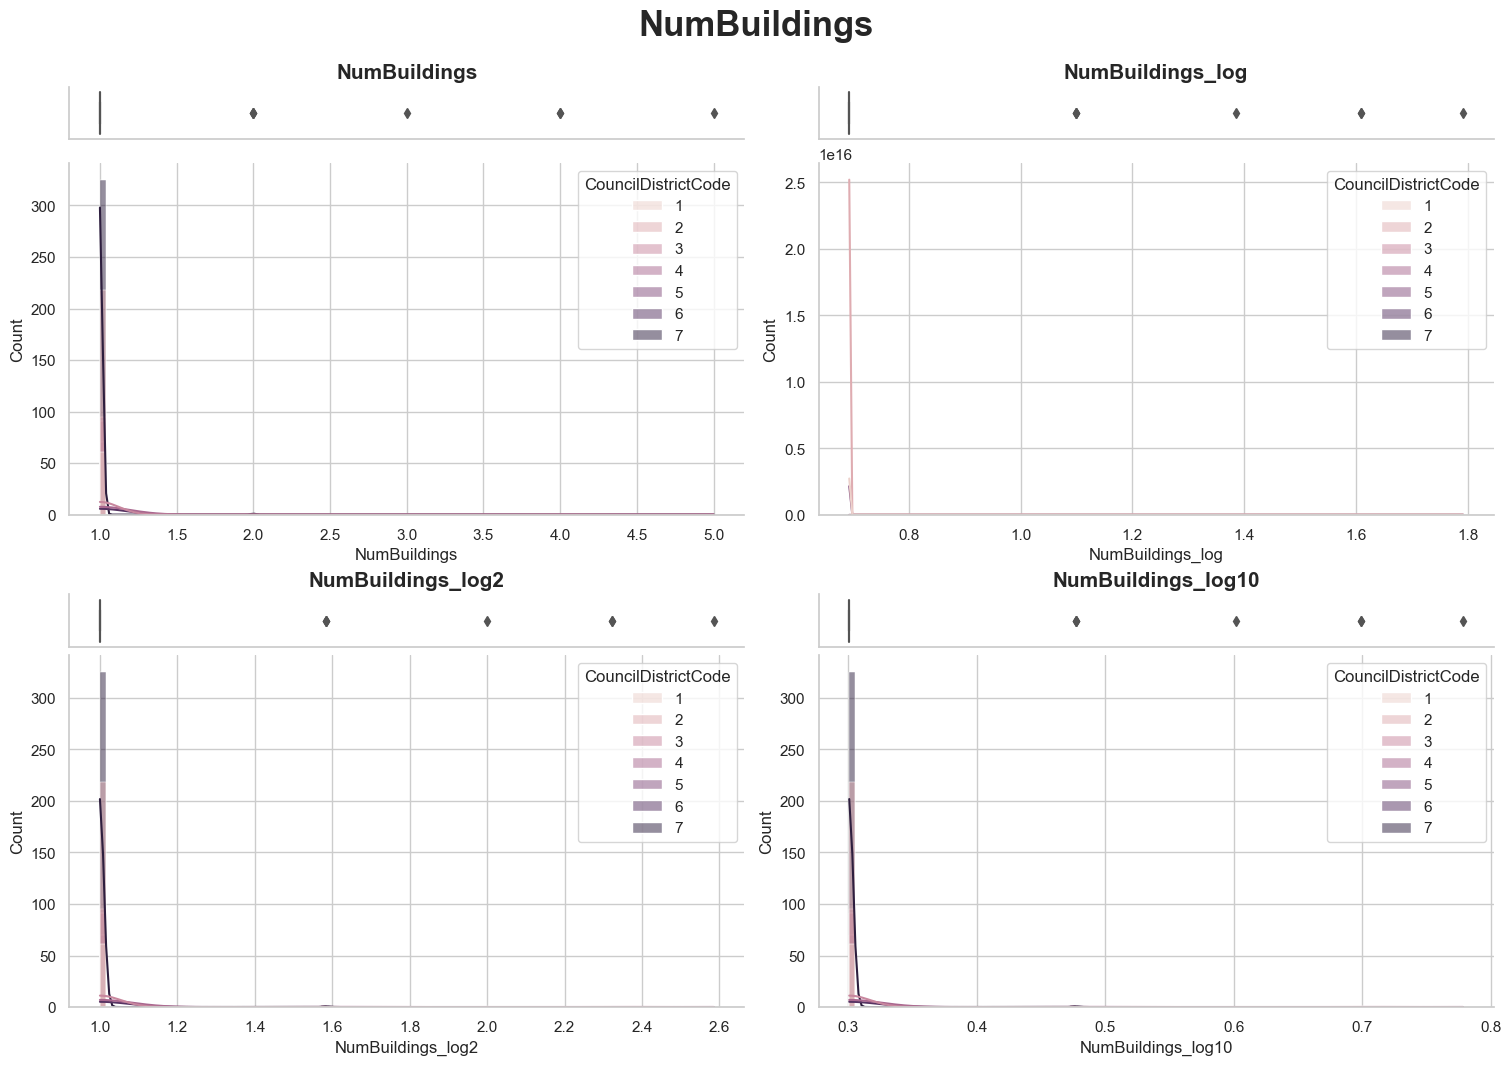

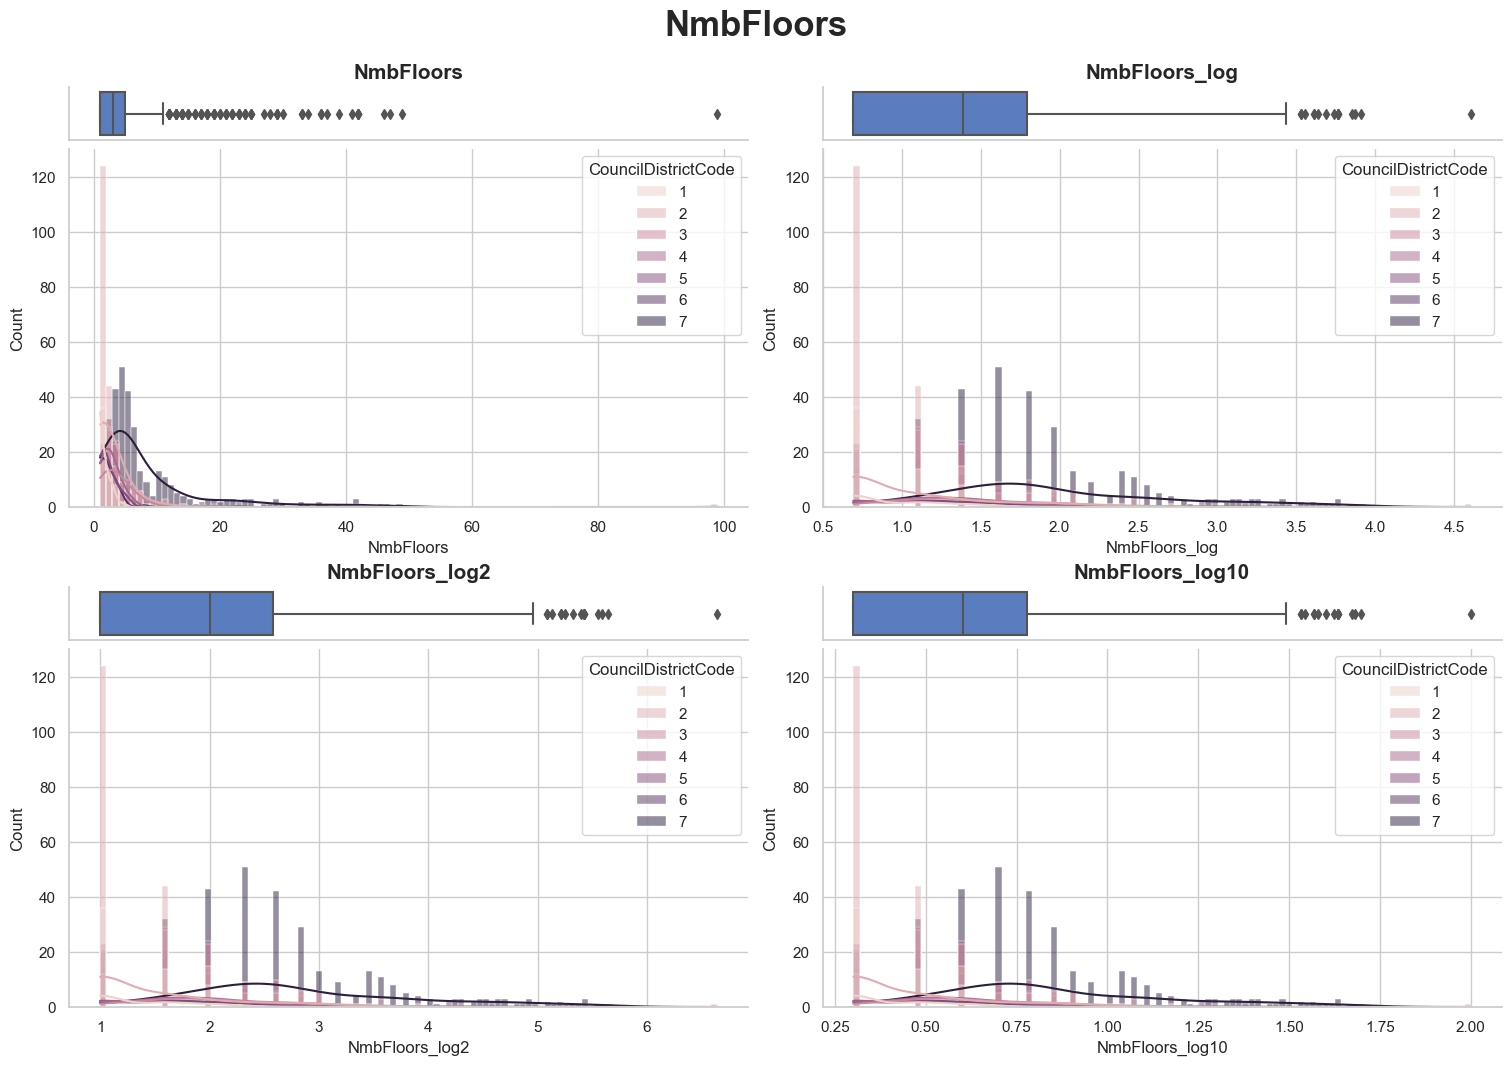

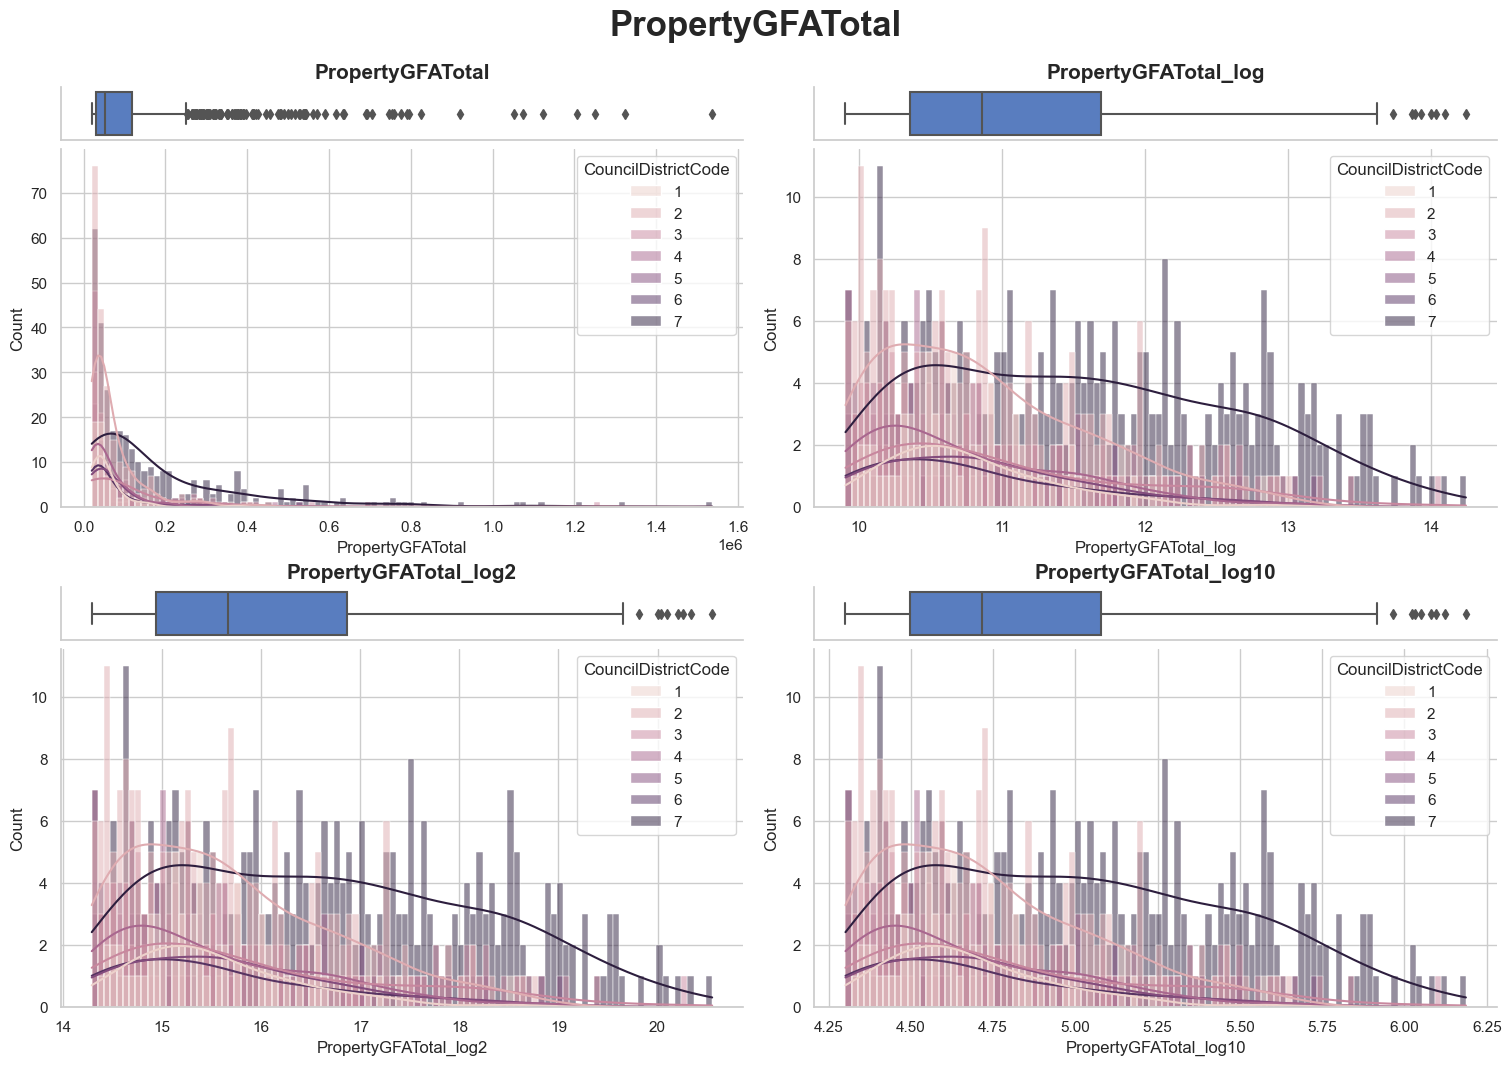

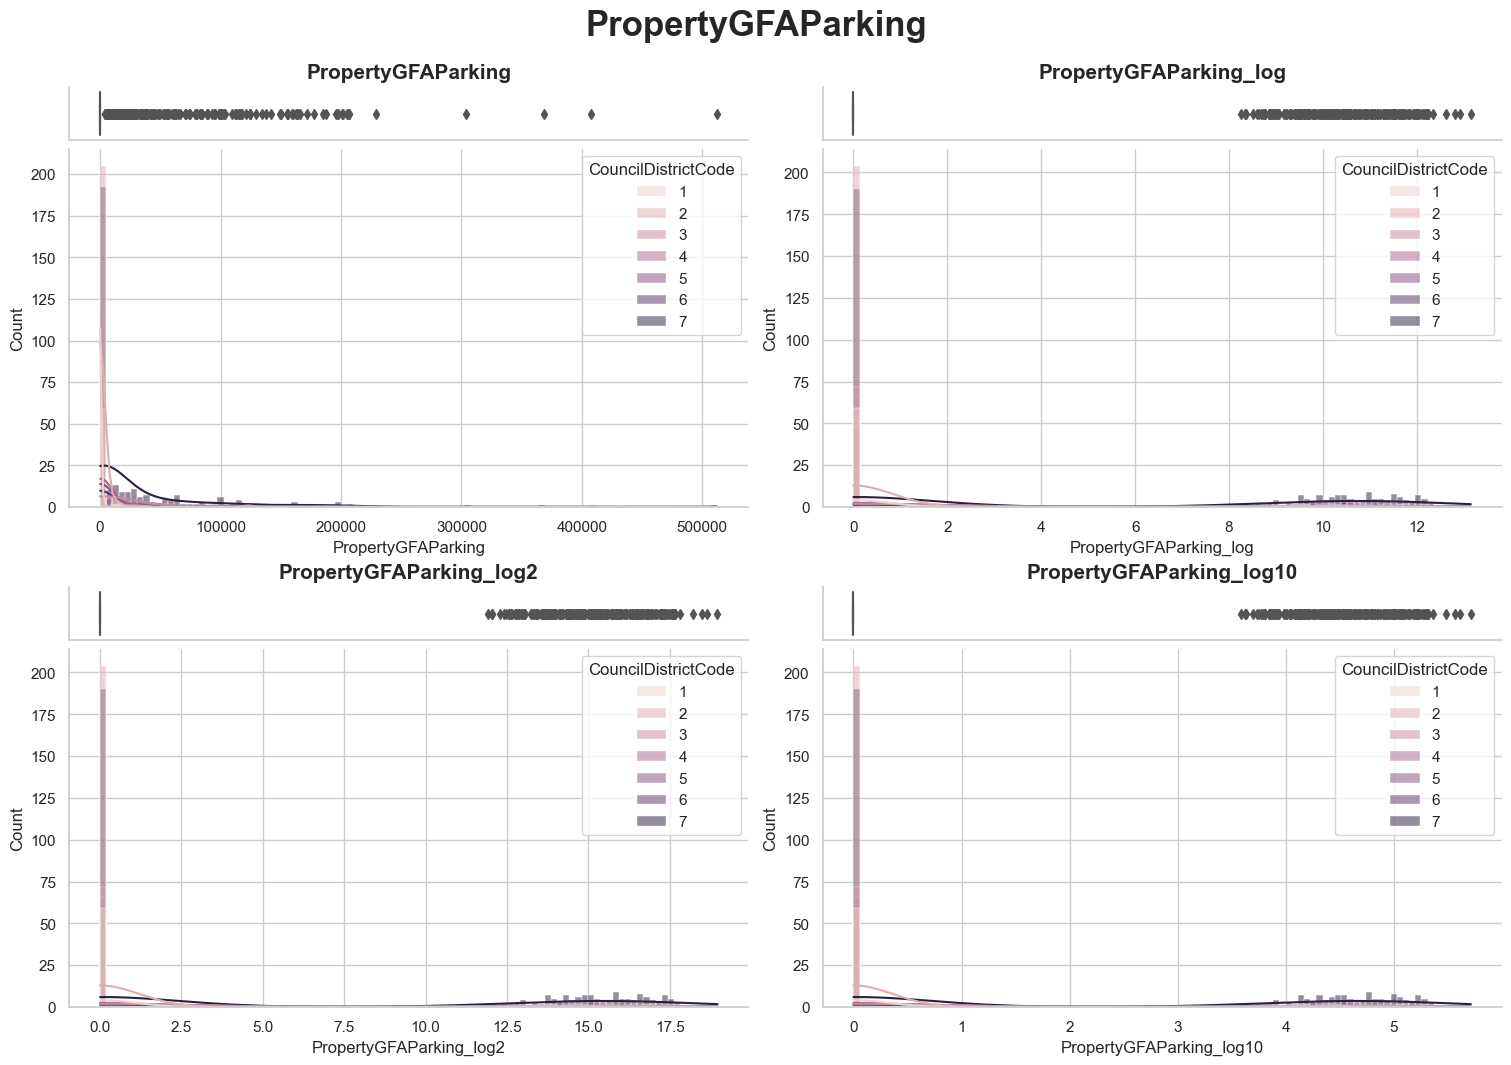

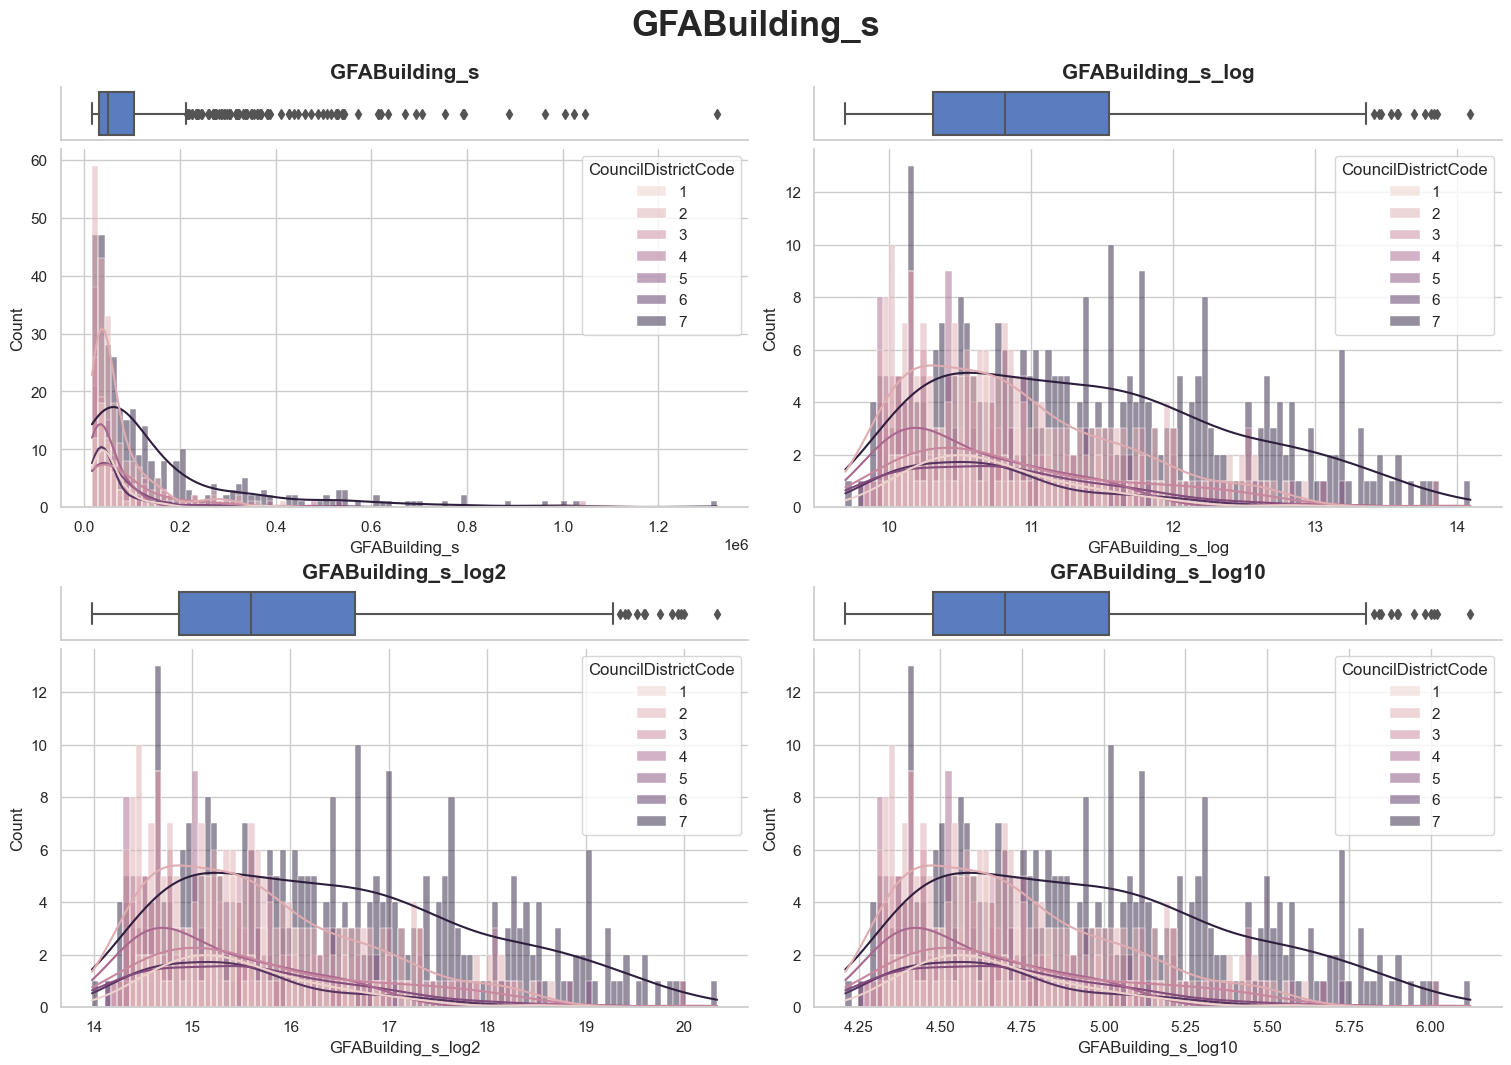

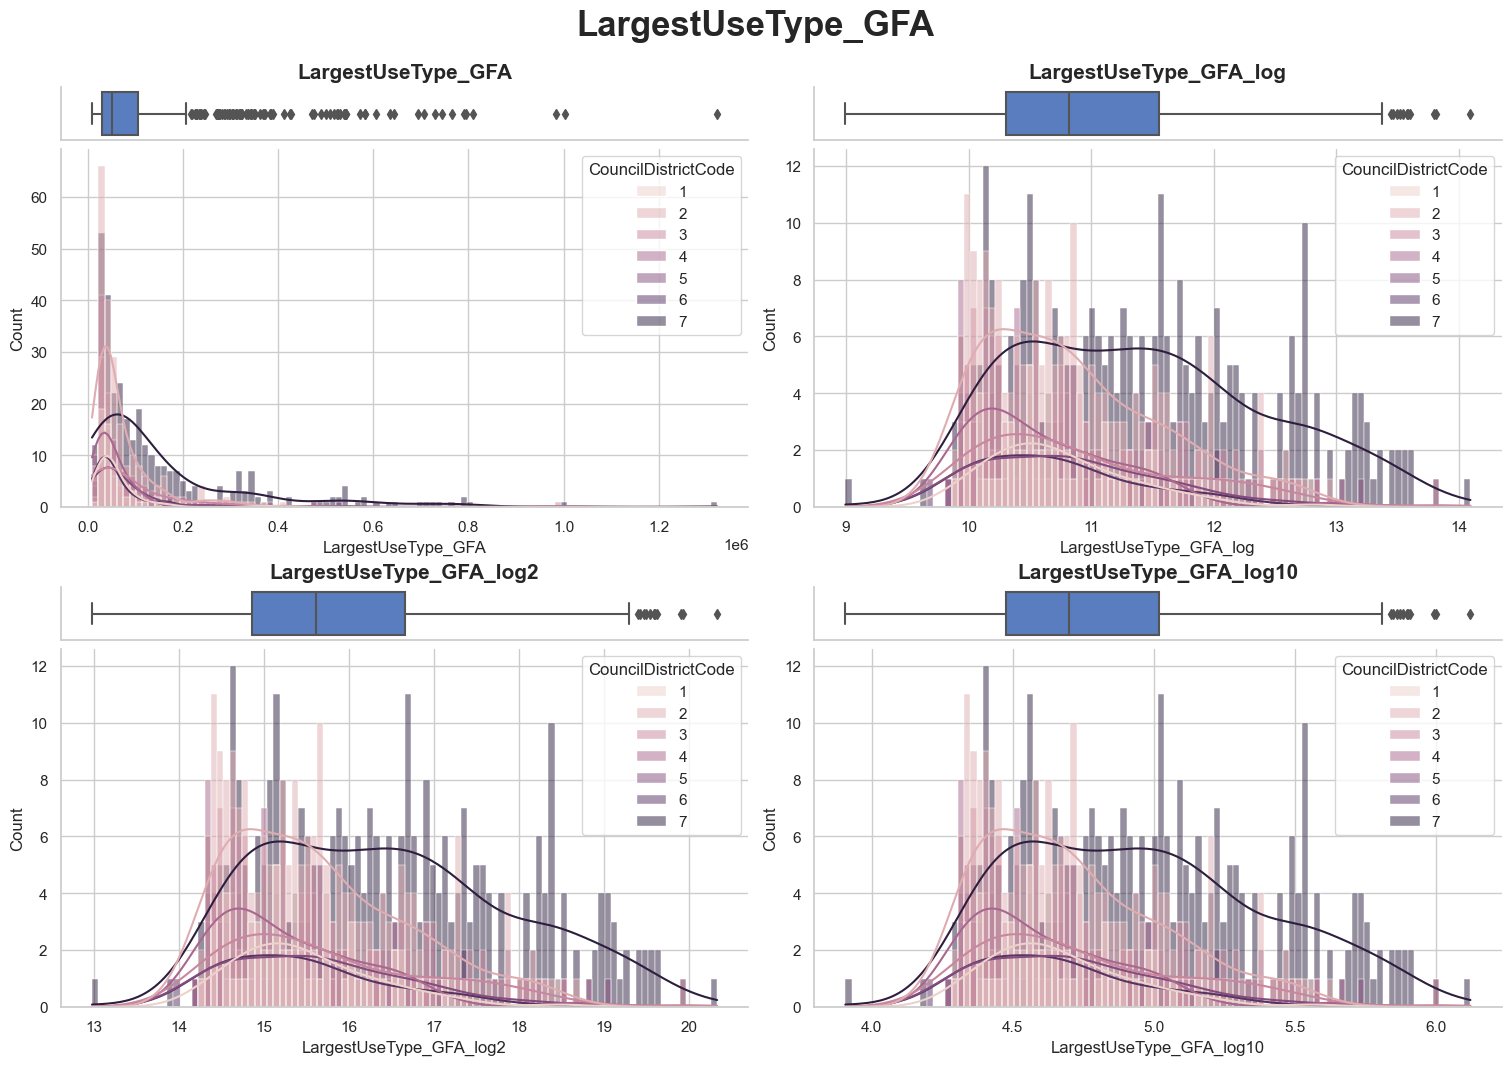

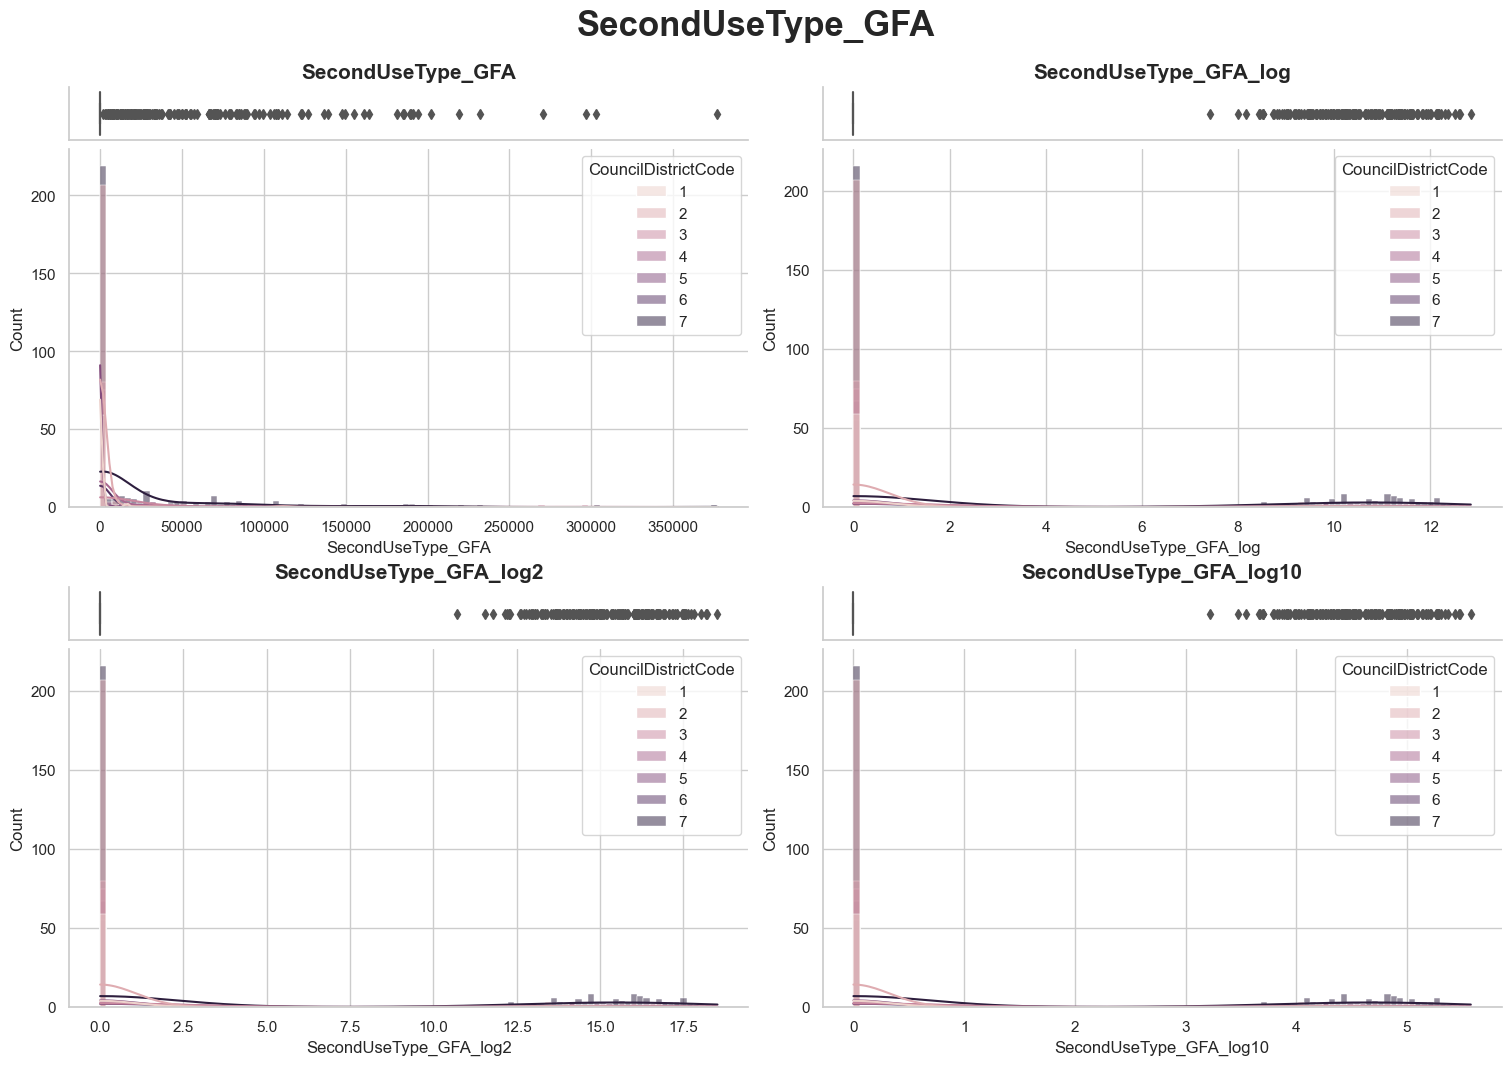

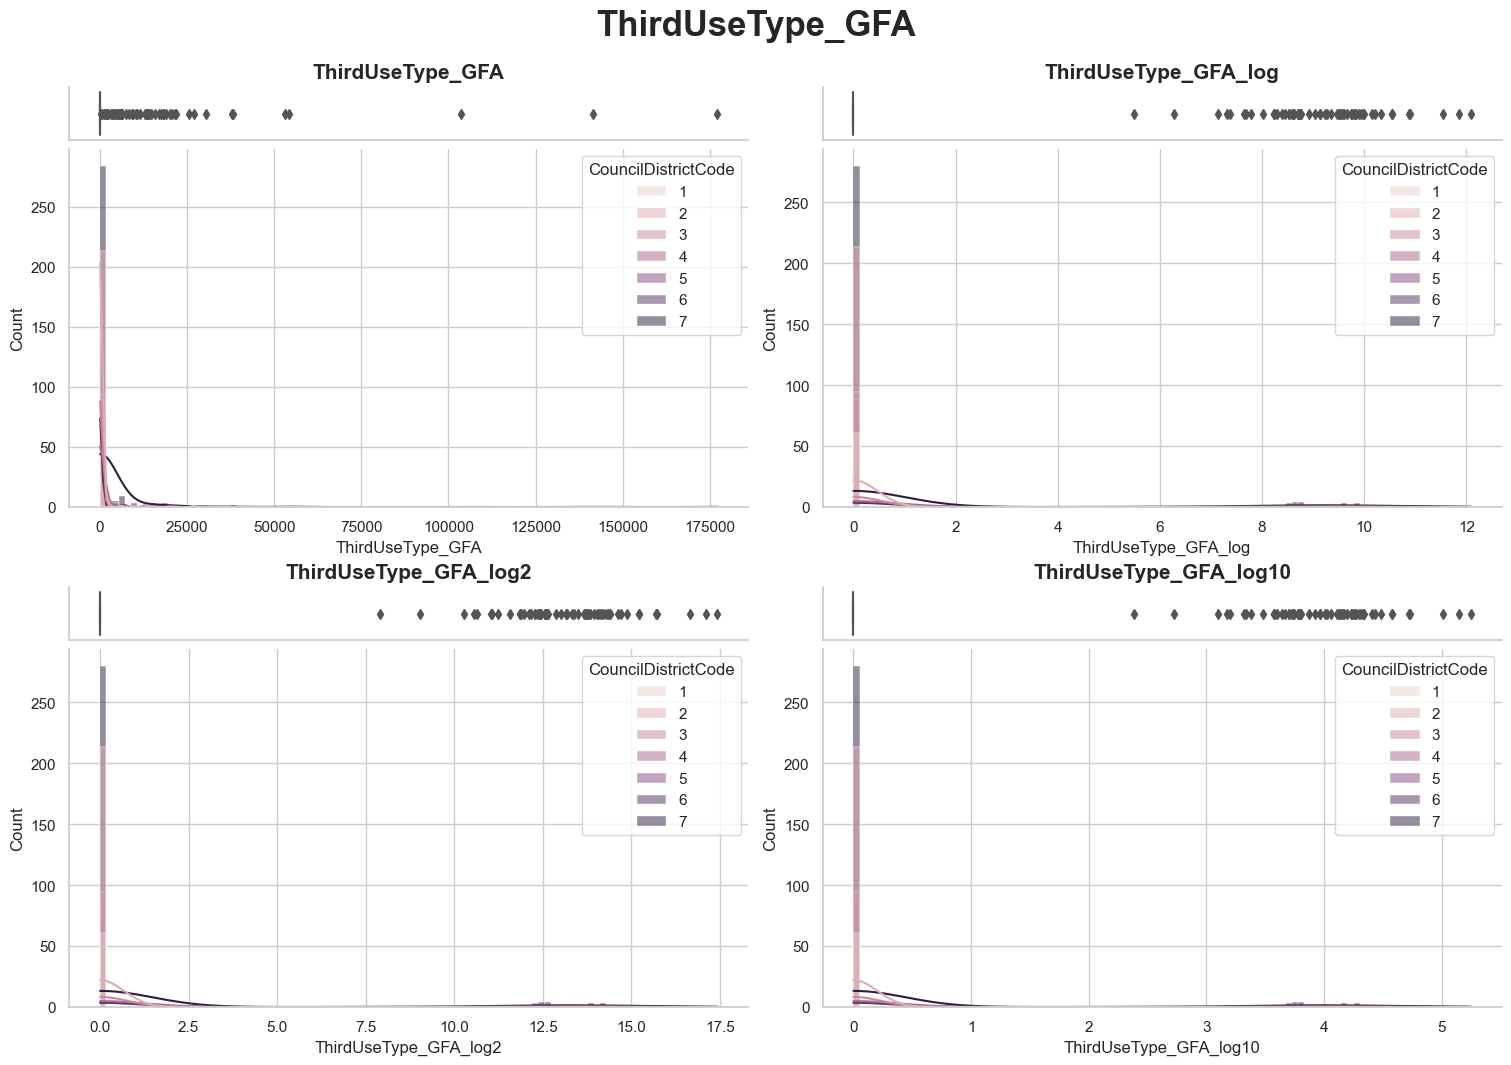

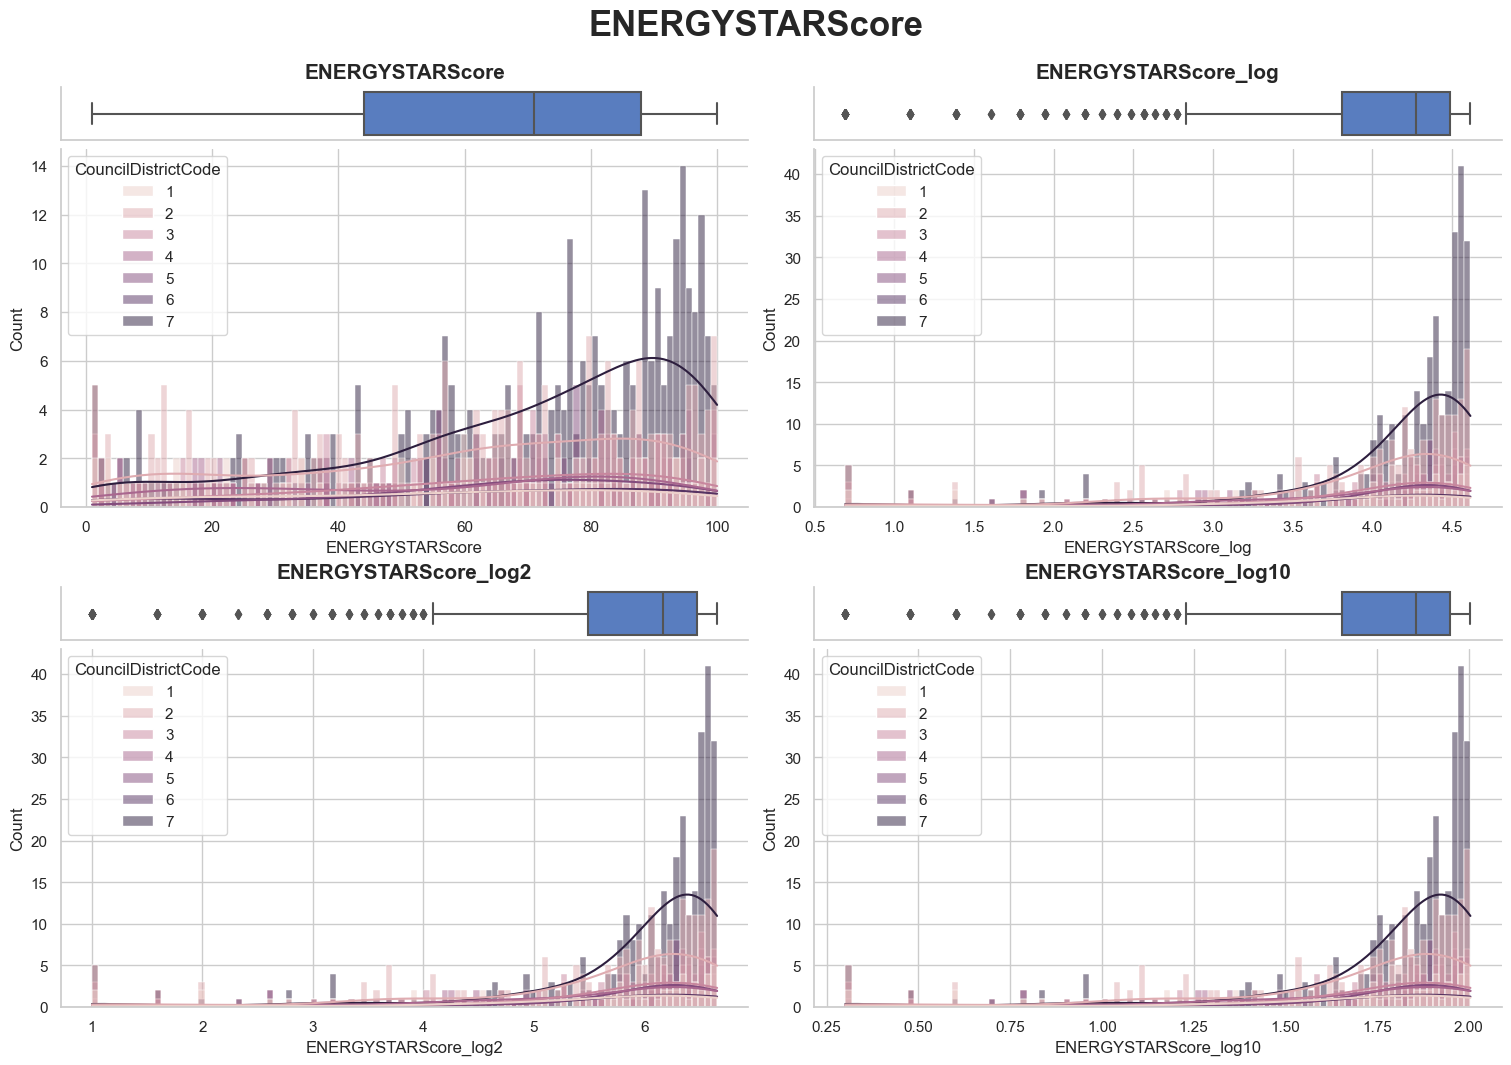

In [20]:
# Distiribution : Profil général
plot_distribution(df, profil_general)

### Profil Emission CO2

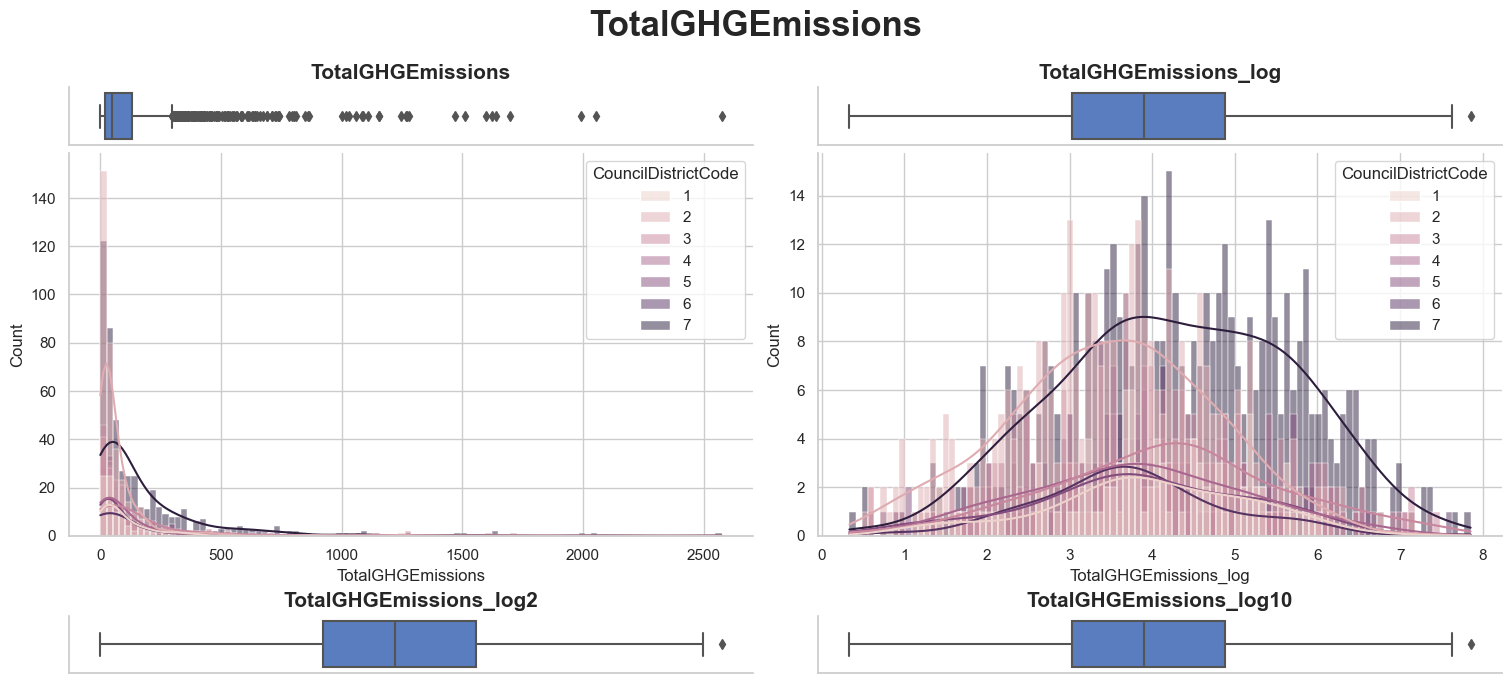

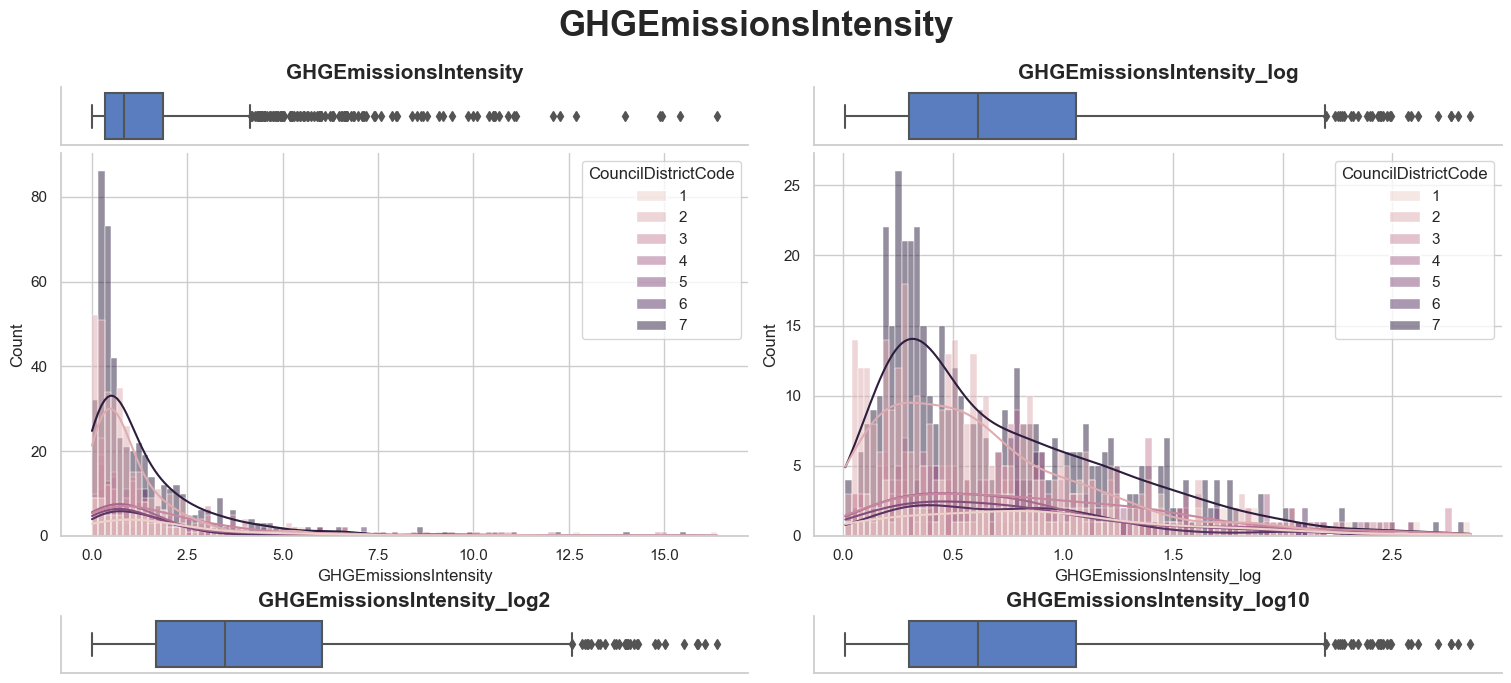

In [21]:
# Distiribution : Prodil Émissions Co2
plot_distribution(df, profil_emission)

### Concommation et emission CO2 selon le type d'usage

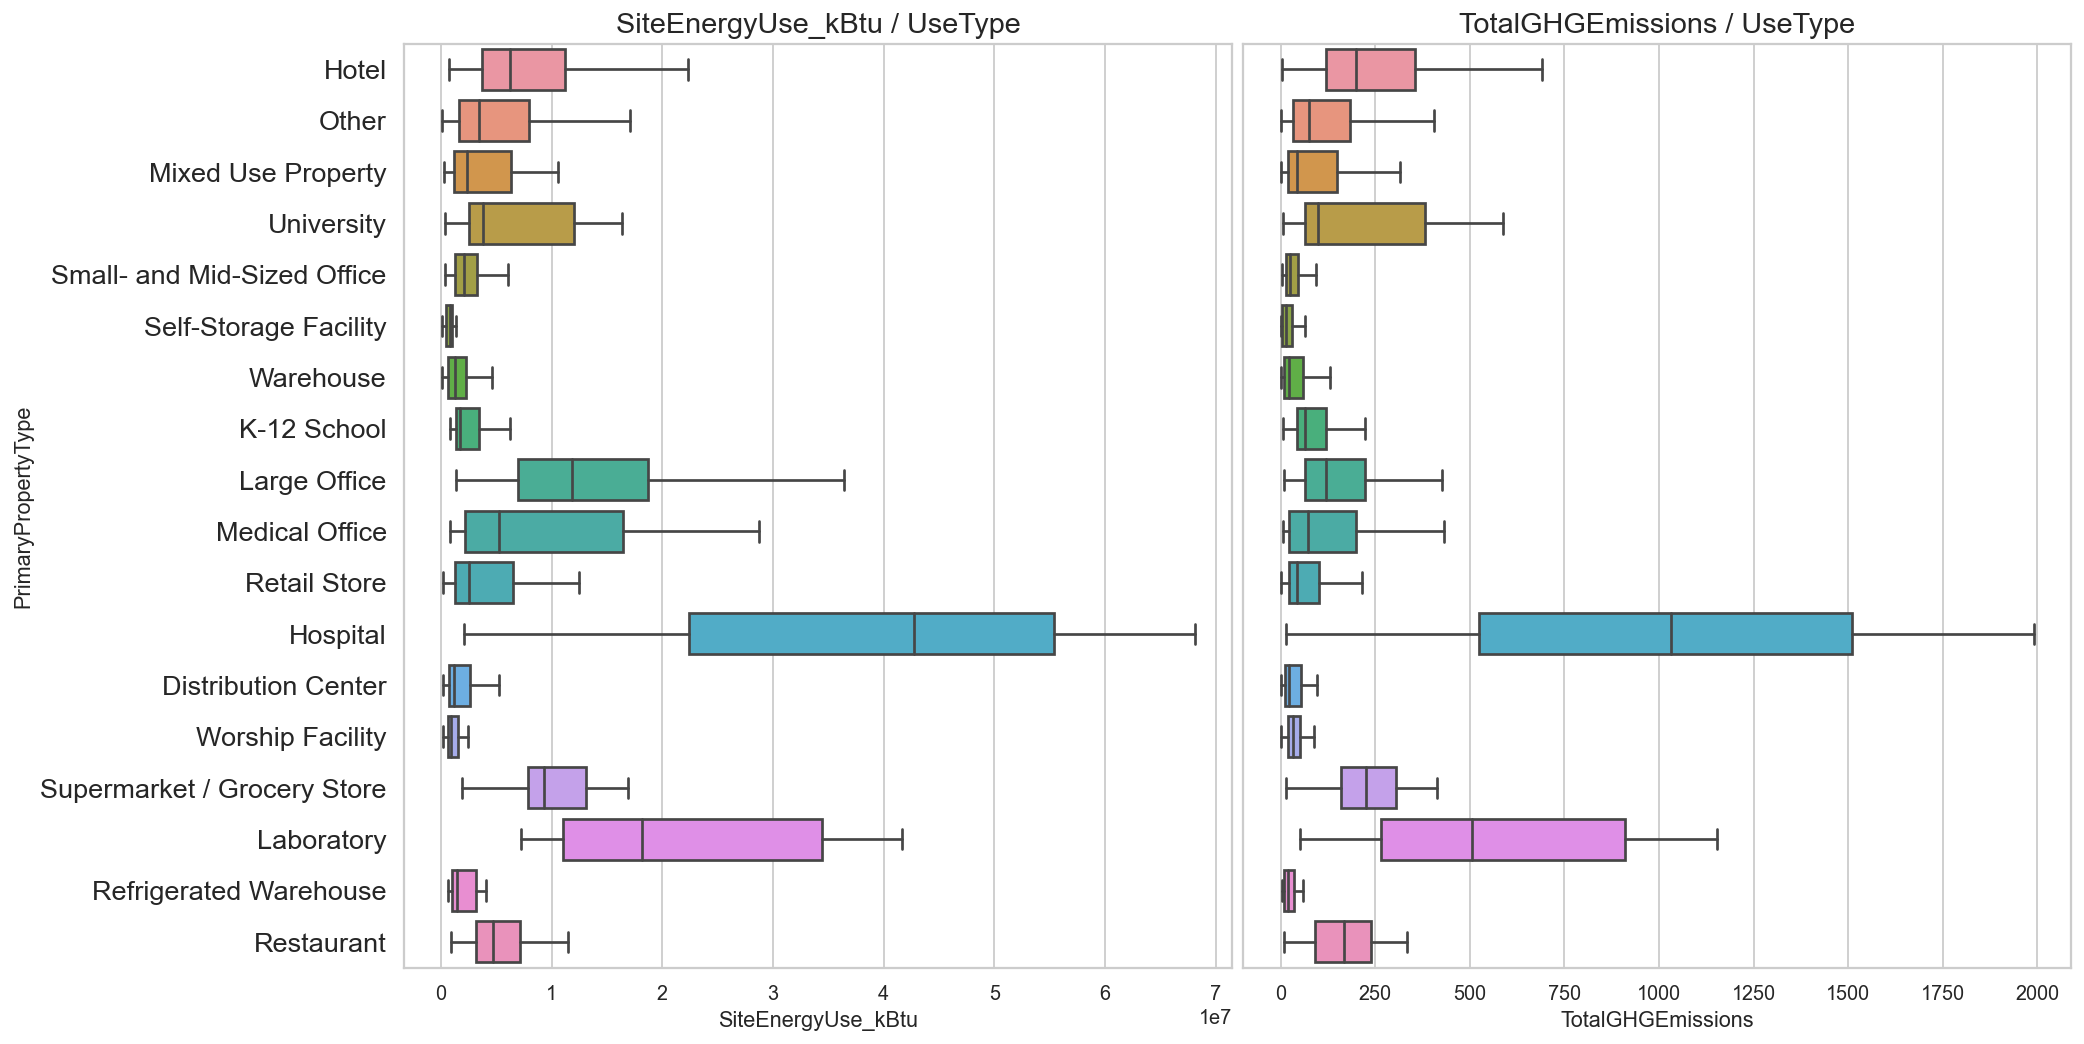

In [48]:
fig , ax = plt.subplots(1,2,figsize=(16, 8), dpi=130)

sns.boxplot(data=df, y="PrimaryPropertyType", 
            x='SiteEnergyUse_kBtu',showfliers=False,ax=ax[0]).set_title('SiteEnergyUse_kBtu / UseType', fontsize=16)

sns.boxplot(data=df, y="PrimaryPropertyType", 
            x='TotalGHGEmissions',showfliers=False, ax=ax[1]).set_title('TotalGHGEmissions / UseType',fontsize=16)

ax[0].tick_params(axis='y', labelsize=15)
ax[1].set(yticks=[])
ax[1].set(ylabel=None)
plt.tight_layout(pad=0.5)
plt.savefig("figures/Consommation_et_emissions_typedusage.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

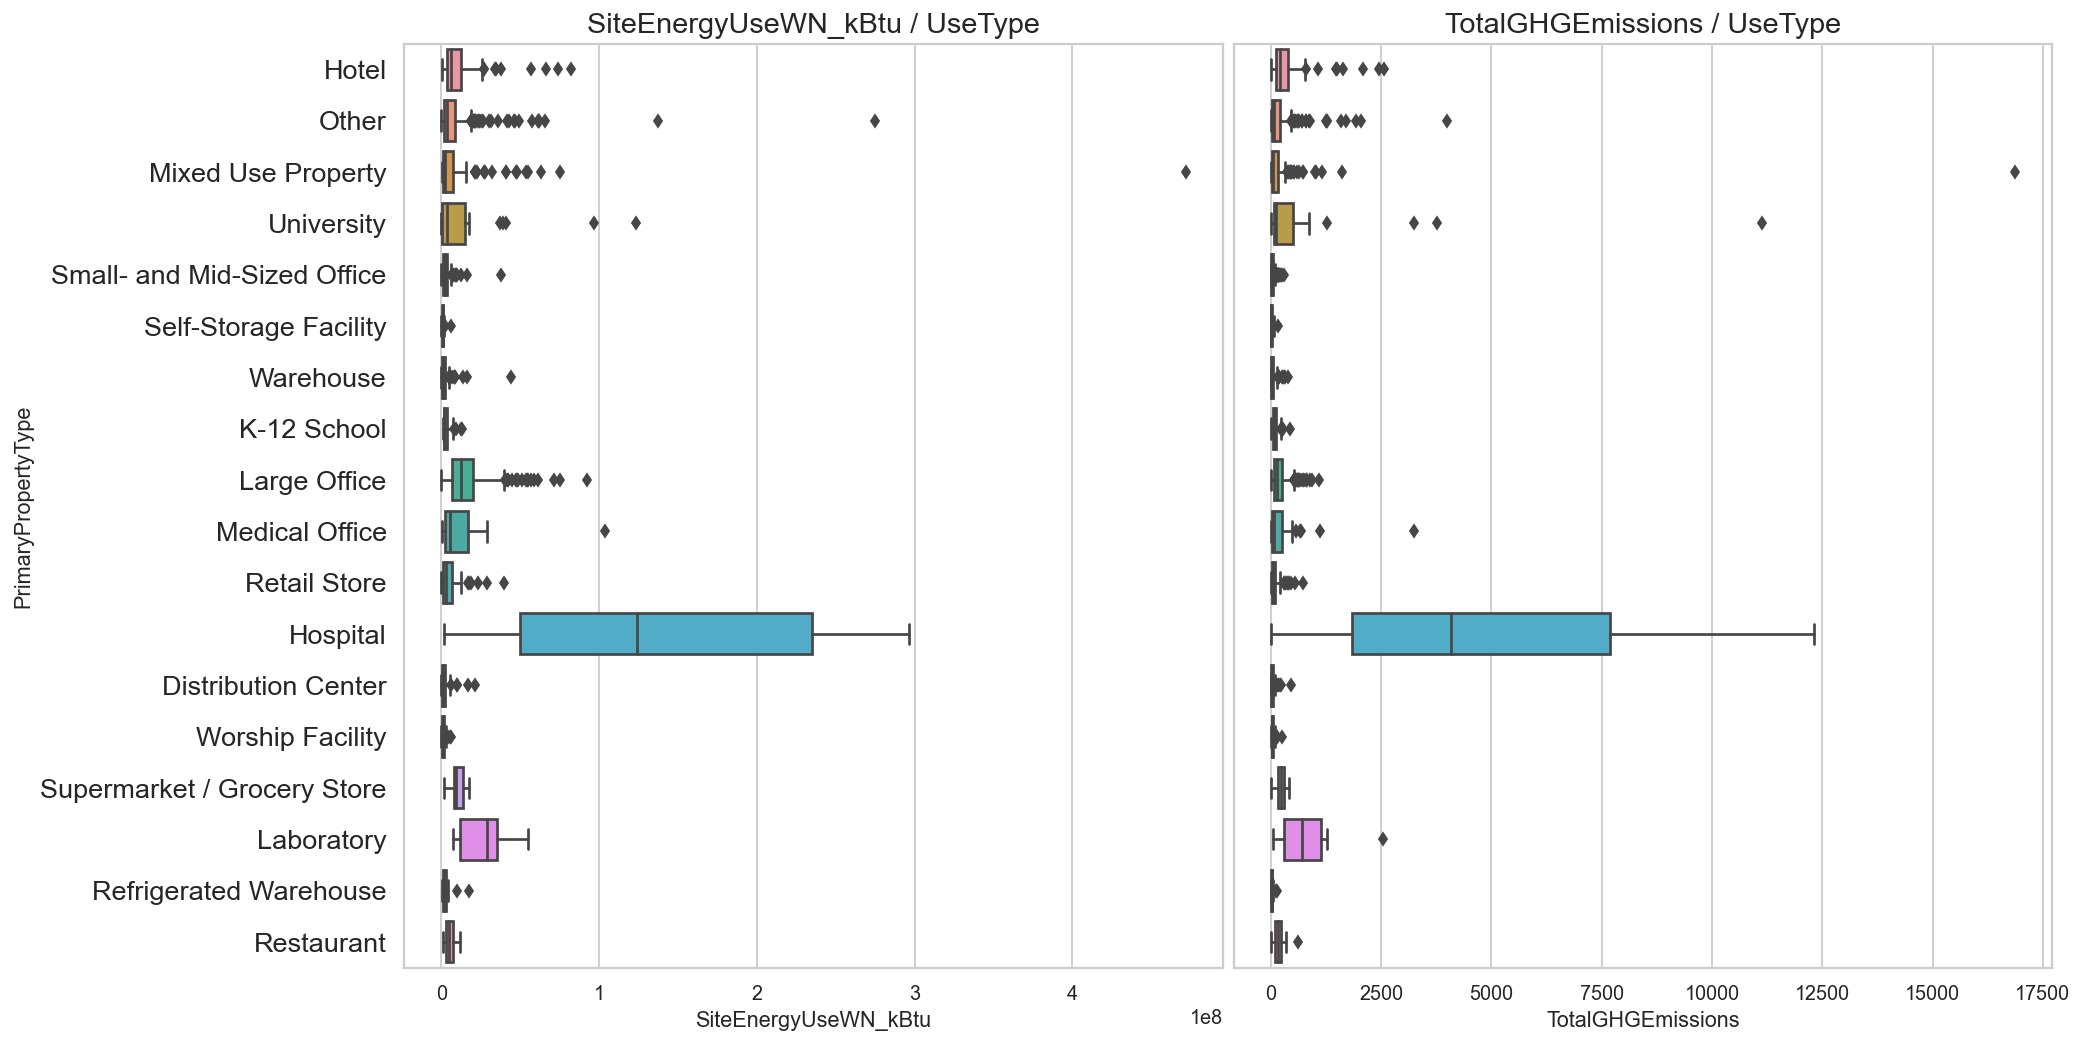

In [26]:
fig , ax = plt.subplots(1,2,figsize=(16, 8), dpi=130)

sns.boxplot(data=df, y="PrimaryPropertyType", 
            x='SiteEnergyUseWN_kBtu',showfliers=True,ax=ax[0]).set_title('SiteEnergyUseWN_kBtu / UseType', fontsize=16)

sns.boxplot(data=df, y="PrimaryPropertyType", 
            x='TotalGHGEmissions',showfliers=True, ax=ax[1]).set_title('TotalGHGEmissions / UseType',fontsize=16)

ax[0].tick_params(axis='y', labelsize=15)
ax[1].set(yticks=[])
ax[1].set(ylabel=None)
plt.tight_layout(pad=0.5)
plt.show()

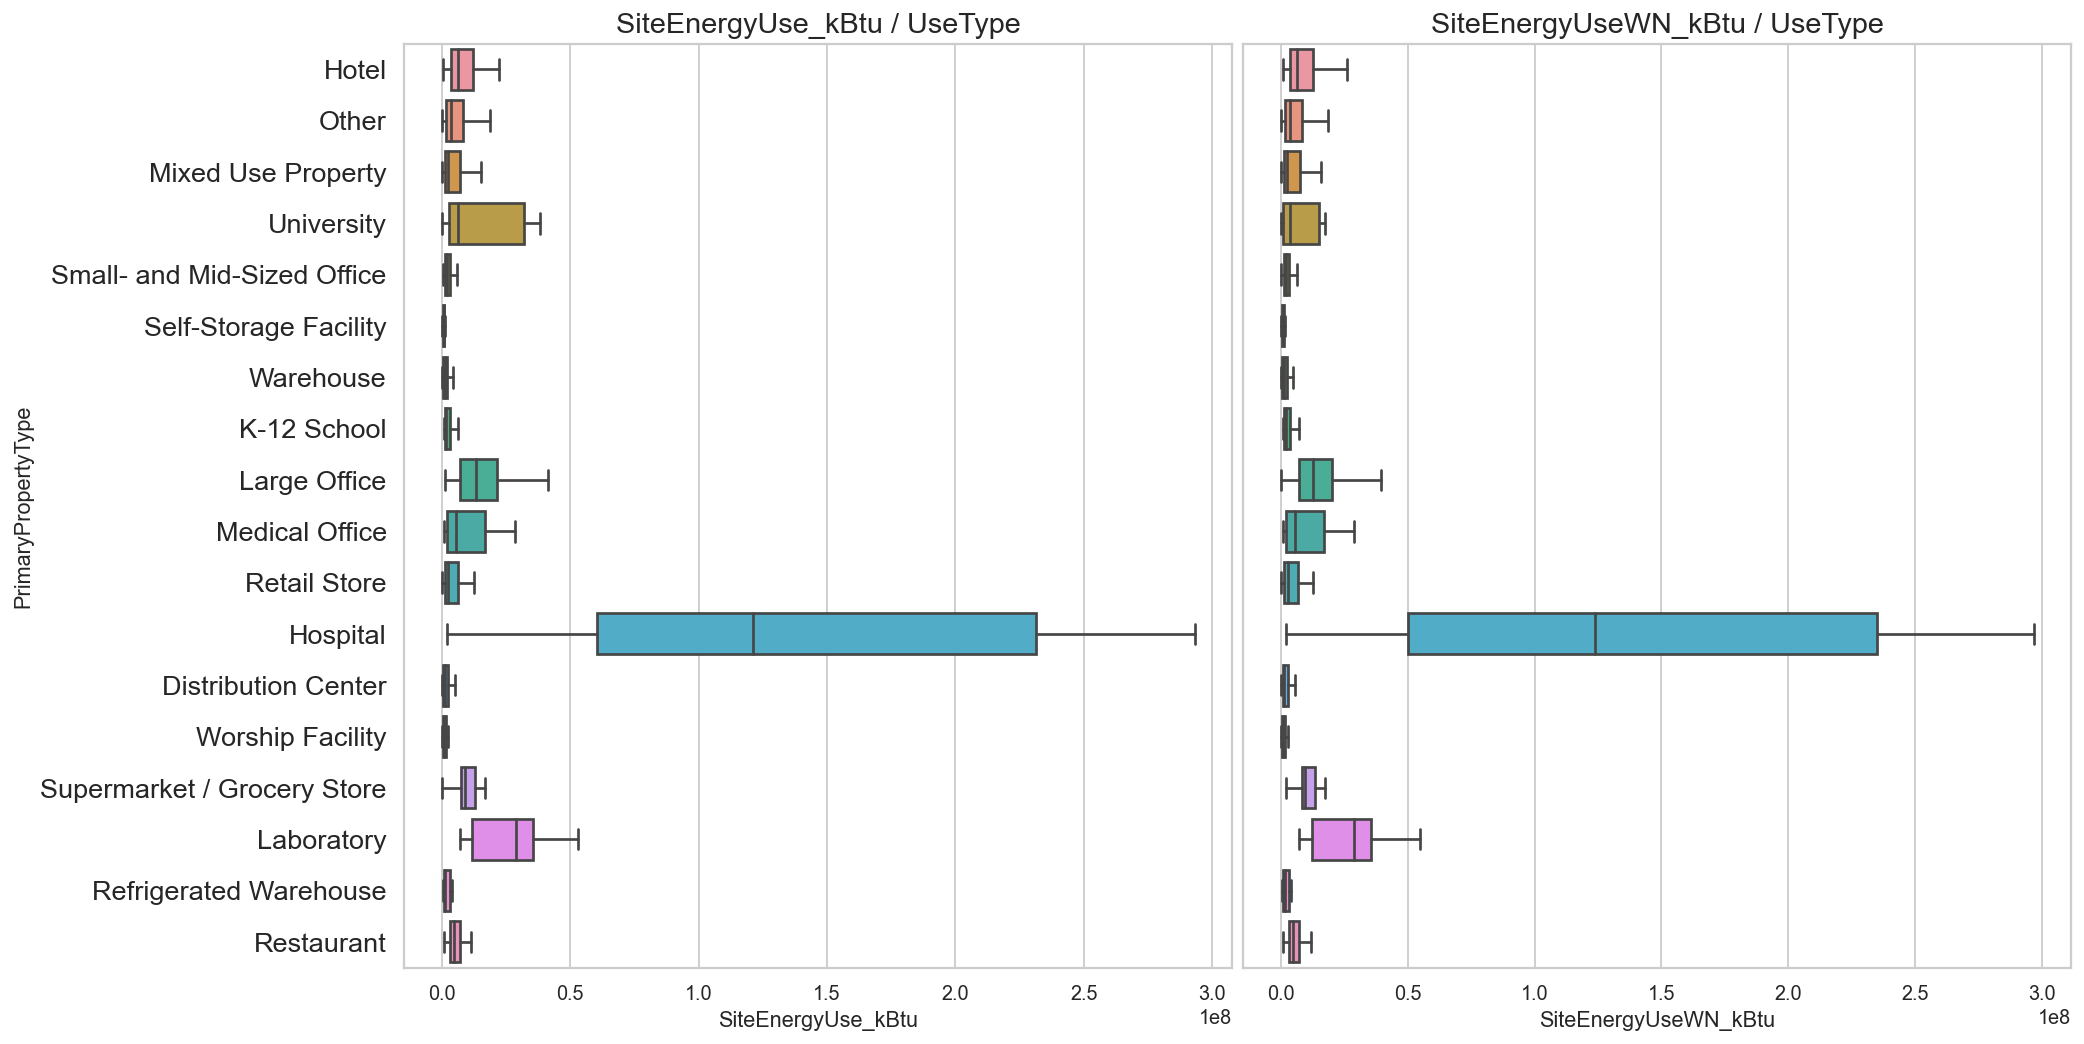

In [27]:
fig , ax = plt.subplots(1,2,figsize=(16, 8), dpi=130)

sns.boxplot(data=df, y="PrimaryPropertyType", 
            x='SiteEnergyUse_kBtu',showfliers=False,ax=ax[0]).set_title('SiteEnergyUse_kBtu / UseType', fontsize=16)

sns.boxplot(data=df, y="PrimaryPropertyType", 
            x='SiteEnergyUseWN_kBtu',showfliers=False, ax=ax[1]).set_title('SiteEnergyUseWN_kBtu / UseType',fontsize=16)

ax[0].tick_params(axis='y', labelsize=15)
ax[1].set(yticks=[])
ax[1].set(ylabel=None)
plt.tight_layout(pad=0.5)
plt.show()

<span style="font-size:16px;">Les hôpitaux semblent utiliser plus d'énergie que les autres bâtiments, nous remarquons aussi que l'émission de CO2 est proportionnelle à l'utilisation de l'énergie

<Figure size 1400x1400 with 0 Axes>

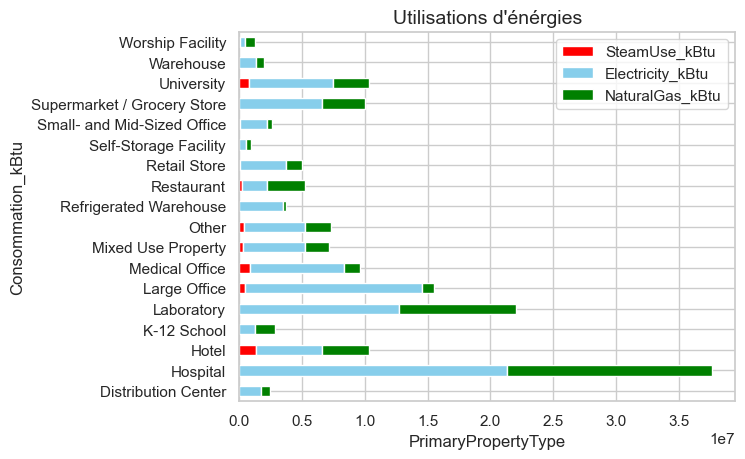

In [23]:
# Répartition de l'utilisation d'énérgies selon le type d'usage : 
total = df.groupby('PrimaryPropertyType')[['SteamUse_kBtu','Electricity_kBtu','NaturalGas_kBtu']].mean().reset_index()
total = total.set_index('PrimaryPropertyType')
plt.figure(figsize=(14, 14))
total.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green']).set_title("Utilisations d'énérgies",fontsize=14)
plt.xlabel('PrimaryPropertyType')
plt.ylabel('Consommation_kBtu')
plt.savefig("figures/utilisation_energie_typedusage.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

**Hors Hopital** 

<Figure size 1400x1400 with 0 Axes>

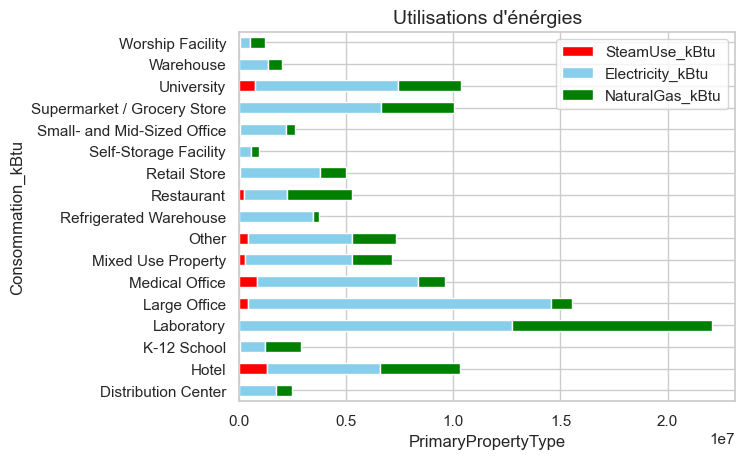

In [24]:
# Répartition de l'utilisation d'énérgies selon le type d'usage : Hors Hopital
df_out_Hospital = df.loc[df['PrimaryPropertyType'] != 'Hospital',:]
total = df_out_Hospital.groupby('PrimaryPropertyType')[['SteamUse_kBtu','Electricity_kBtu','NaturalGas_kBtu']].mean().reset_index()
total = total.set_index('PrimaryPropertyType')
plt.figure(figsize=(14, 14))
total.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green']).set_title("Utilisations d'énérgies",fontsize=14)
plt.xlabel('PrimaryPropertyType')
plt.ylabel('Consommation_kBtu')
plt.show()

<Figure size 1400x1400 with 0 Axes>

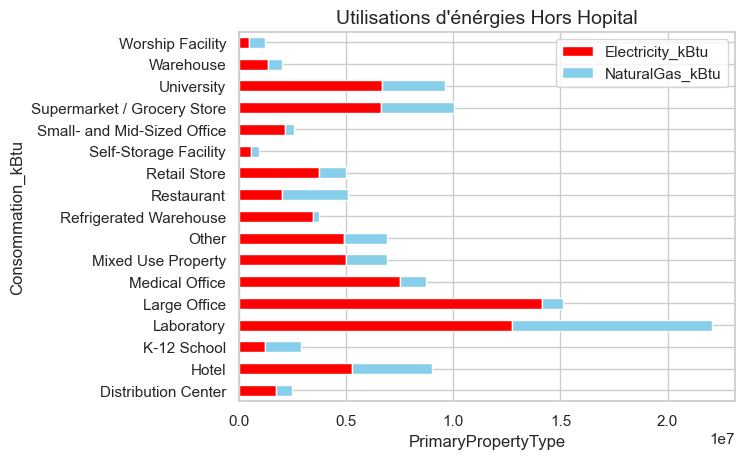

In [25]:
# Répartition de l'utilisation d'énérgies selon le type d'usage : Hors Hopital Electricity et Natural Gas
df_out_Hospital = df.loc[df['PrimaryPropertyType'] != 'Hospital',:]

total = df_out_Hospital.groupby('PrimaryPropertyType')[['Electricity_kBtu','NaturalGas_kBtu']].mean().reset_index()
total = total.set_index('PrimaryPropertyType')
plt.figure(figsize=(14, 14))

total.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green']).set_title("Utilisations d'énérgies Hors Hopital",fontsize=14)
plt.xlabel('PrimaryPropertyType')
plt.ylabel('Consommation_kBtu')
plt.show()

<Figure size 1400x1400 with 0 Axes>

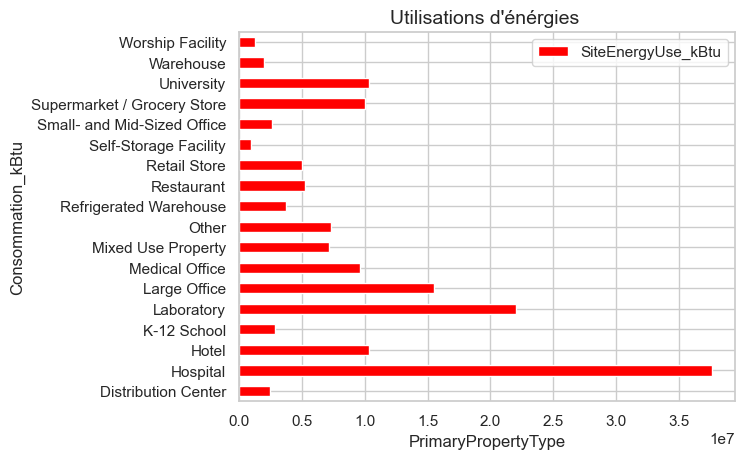

In [26]:
# Répartition de l'utilisation d'énérgies selon le type d'usage :   Electricity   

total = df.groupby('PrimaryPropertyType')[['SiteEnergyUse_kBtu']].mean().reset_index()
total = total.set_index('PrimaryPropertyType')
plt.figure(figsize=(14, 14))

total.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green']).set_title("Utilisations d'énérgies ",fontsize=14)
plt.xlabel('PrimaryPropertyType')
plt.ylabel('Consommation_kBtu')
plt.show()

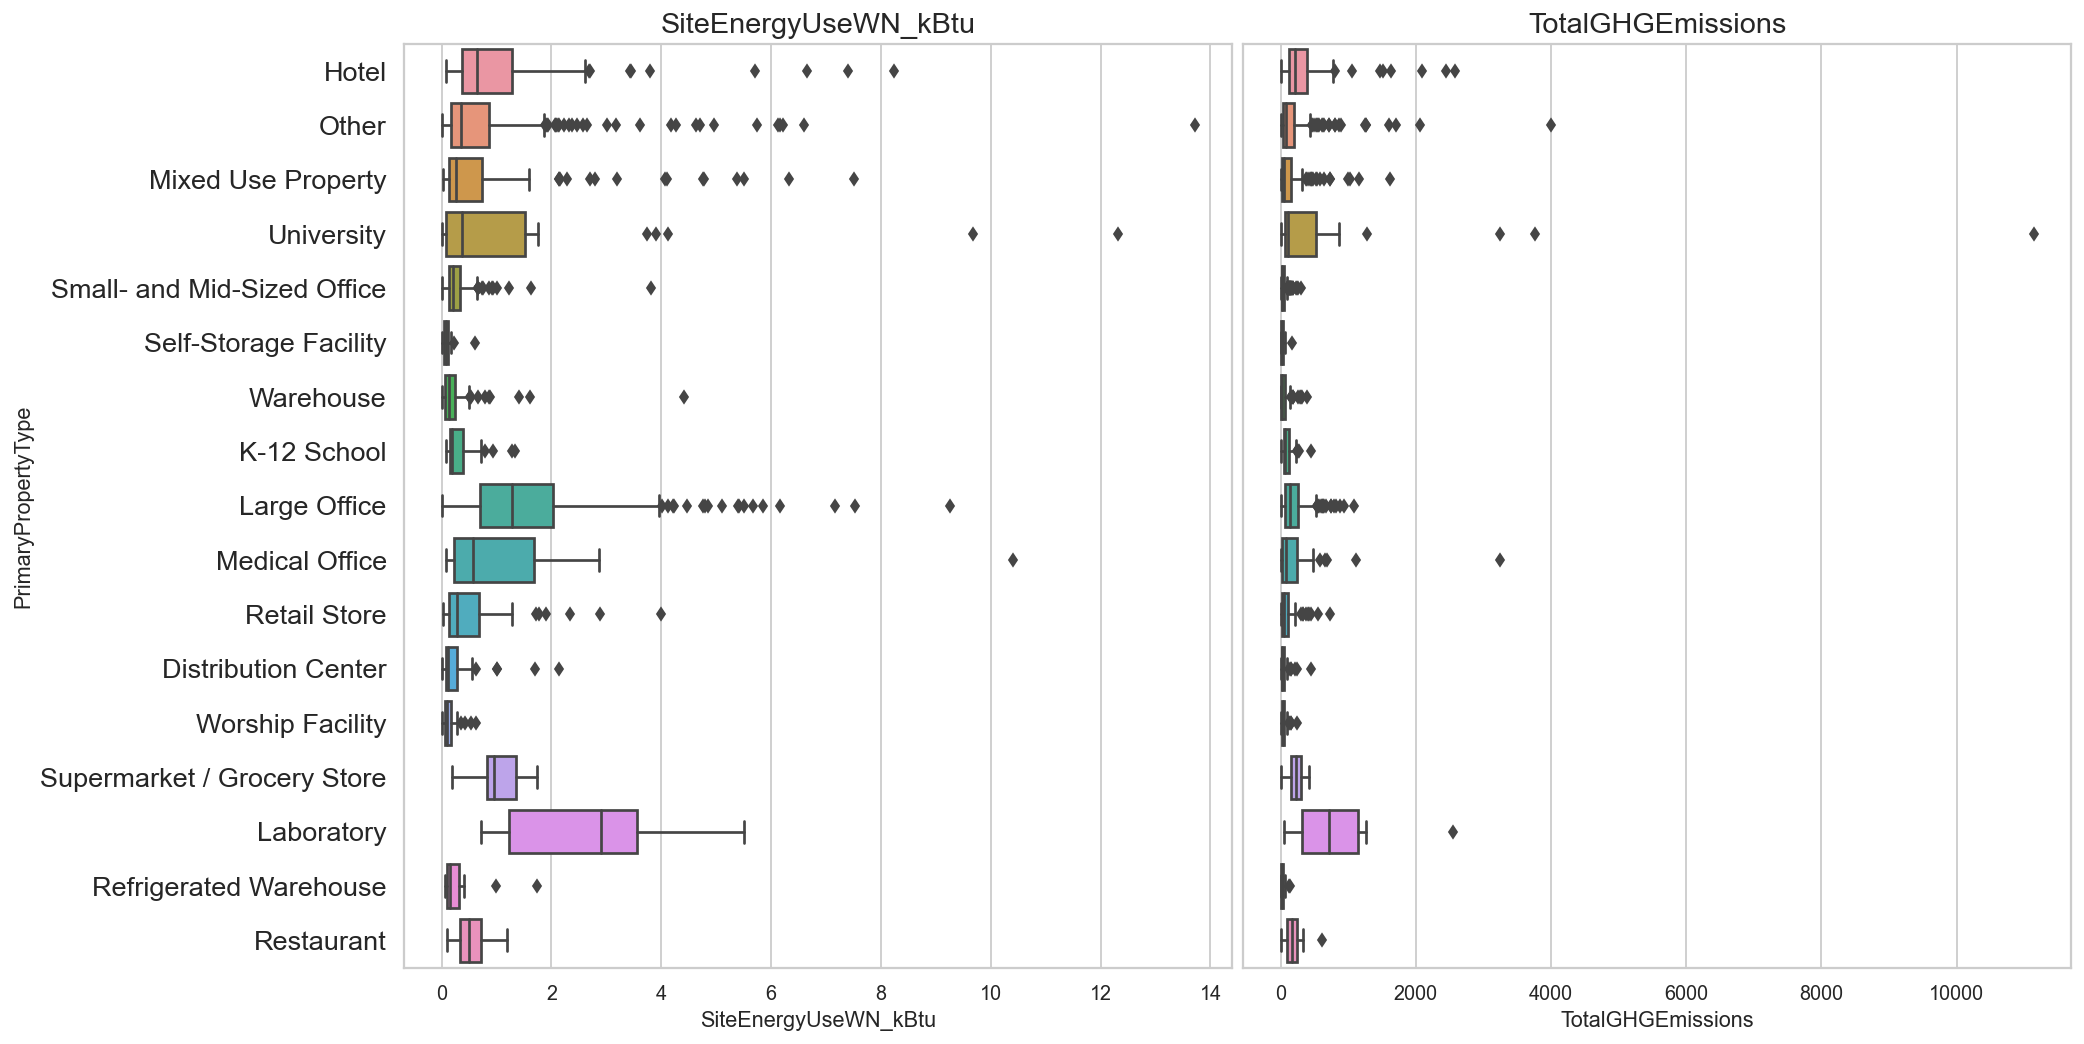

In [32]:
fig , ax = plt.subplots(1,2,figsize=(16, 8), dpi=130)
x = df['SiteEnergyUseWN_kBtu']/ 10000000
df_out = df_out_Hospital.loc[df_out_Hospital['SiteEnergyUseWN_kBtu'] < 150000000,:]
sns.boxplot(data=df_out, y="PrimaryPropertyType", 
            x=x,showfliers=True,ax=ax[0]).set_title('SiteEnergyUseWN_kBtu', fontsize=16)

sns.boxplot(data=df_out, y="PrimaryPropertyType", 
            x='TotalGHGEmissions',showfliers=True, ax=ax[1]).set_title('TotalGHGEmissions',fontsize=16)

ax[0].tick_params(axis='y', labelsize=15)
ax[1].set(yticks=[])
ax[1].set(ylabel=None)
plt.tight_layout(pad=0.5)
plt.show()

In [33]:
 df_out_Hospital.loc[df_out_Hospital['SiteEnergyUseWN_kBtu'] > 150000000,:]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
30              43      2016          Campus  Mixed Use Property   
493            753      2016  NonResidential               Other   

     CouncilDistrictCode      Neighborhood  YearBuilt  NumBuildings  \
30                     2  GREATER DUWAMISH       1992           1.0   
493                    7          DOWNTOWN       1981           1.0   

     NmbFloors  GFATotal  GFAParking  GFABuilding_s Largest_UseType  \
30           3    494835           0         494835          Office   
493         33    429405           0         429405     Data Center   

     LargestUseType_GFA Second_UseType  SecondUseType_GFA  \
30             757027.0     Laboratory           639931.0   
493            218997.0         Office           210409.0   

                  Third_UseType  ThirdUseType_GFA  ENERGYSTARScore  \
30   Non-Refrigerated Warehouse          459748.0              8.0   
493                       Aucun               0.0             98.0   

     SiteEUI_kBtu_sf  SiteEUIWN_kBtu_sf  SourceEUI_kBtu_sf  \
30        906.130898         233.100006         388.200012   
493       639.680877         639.799988        2007.900024   

     SourceEUIWN_kBtu_sf  SiteEnergyUse_kBtu  SiteEnergyUseWN_kBtu  \
30            400.299988         448385283.0           471613856.0   
493          2008.000000         274682167.0           274725984.0   

     SteamUse_kBtu  Electricity_kBtu  NaturalGas_kBtu  TotalGHGEmissions  \
30             0.0       150476283.0      297909000.0           16870.98   
493            0.0       274532495.0         149672.0            1921.82   

     GHGEmissionsIntensity  Age_Building AgeGroup  Ratio_Parking  \
30                   34.09            24     0-25            0.0   
493                   4.48            35    25-50            0.0   

     Ratio_Building  
30         0.000002  
493        0.000002

### Corrélation Profil general + TotalGHGEmissions + GHGEmissionsIntensity

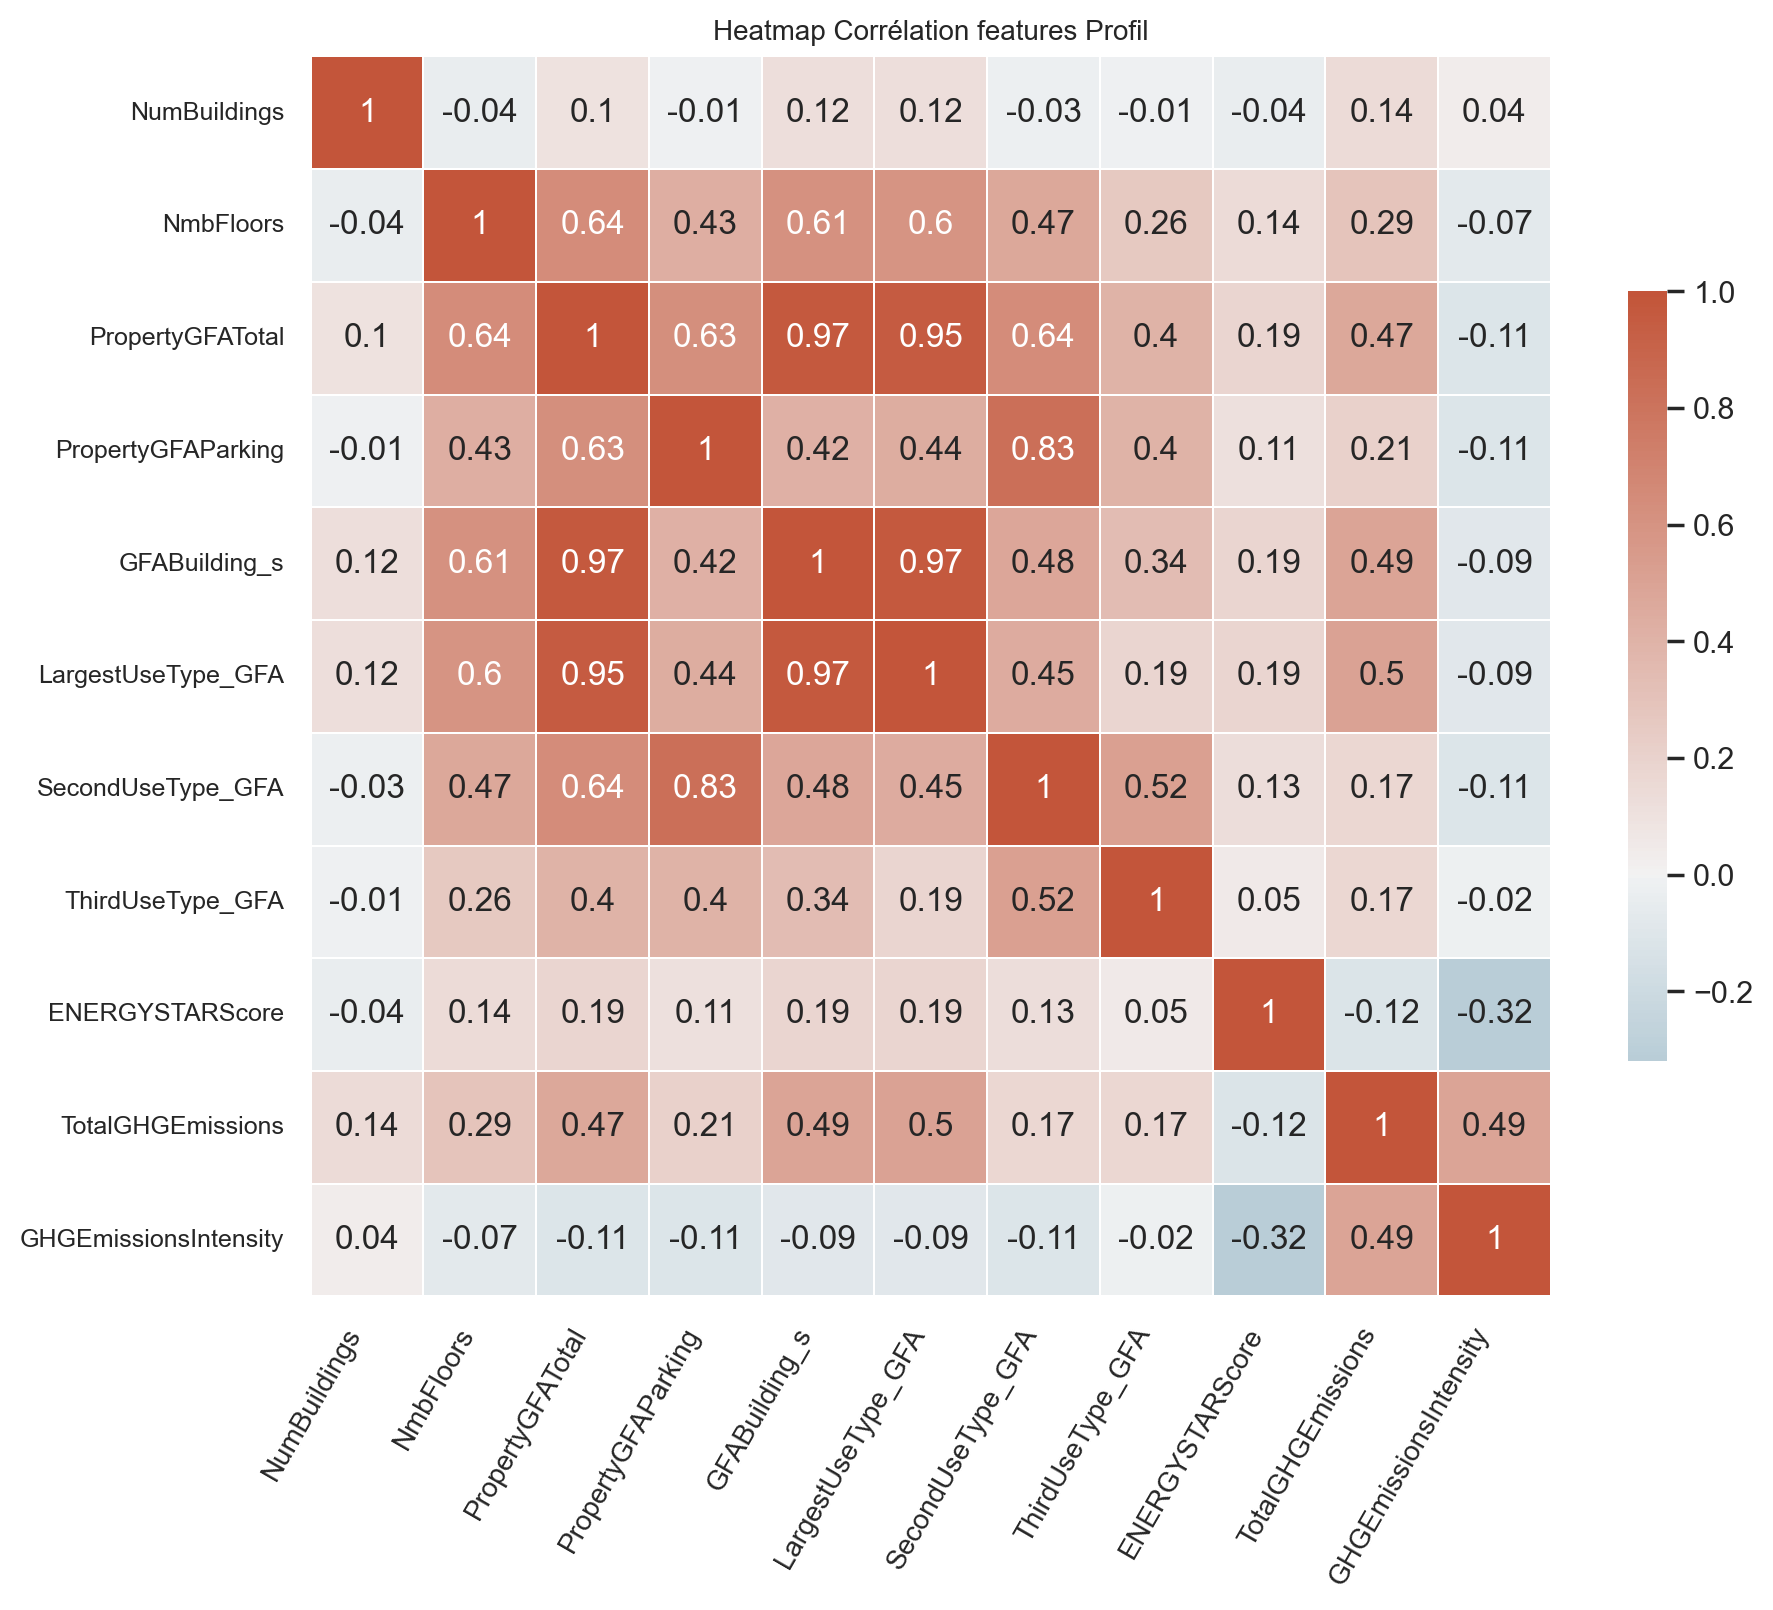

In [74]:
col_profil_general_emission = profil_general + ['TotalGHGEmissions', 'GHGEmissionsIntensity']
df_num_profil = df[df.columns[df.columns.isin(col_profil_general_emission)]]
corr_1 = round(df_num_profil.corr(method='pearson'),2)
fig,ax = plt.subplots(figsize=(10,10), dpi=200)
sns.heatmap(corr_1, linewidth=0.01,
            cmap=sns.diverging_palette(230,20,as_cmap=True), 
            vmax = 1, 
            center=0, 
            square=True, 
            cbar_kws={"shrink": .5},annot=True)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=9)
ax.set_title('Heatmap Corrélation features Profil',fontsize=10)
plt.savefig("figures/correlation_target_profilbatiment.png", transparent=True, bbox_inches='tight', dpi=200)

plt.show()

In [75]:
#Code copié-Coller pour afficher les corrélation pair à pair 
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

threshold = 0.5
corr_1 = corr_1.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_1[(abs(corr_1) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0             level_1  corr_coeff
16    PropertyGFATotal       GFABuilding_s        0.97
18  LargestUseType_GFA       GFABuilding_s        0.97
14    PropertyGFATotal  LargestUseType_GFA        0.95
12   SecondUseType_GFA  PropertyGFAParking        0.83
8     PropertyGFATotal   SecondUseType_GFA        0.64
10   SecondUseType_GFA    PropertyGFATotal        0.64
6   PropertyGFAParking    PropertyGFATotal        0.63
4            NmbFloors       GFABuilding_s        0.61
2            NmbFloors  LargestUseType_GFA        0.60
0     ThirdUseType_GFA   SecondUseType_GFA        0.52

In [79]:
strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])].sort_values('corr_coeff', ascending=False)

level_0             level_1  corr_coeff
16    PropertyGFATotal       GFABuilding_s        0.97
18  LargestUseType_GFA       GFABuilding_s        0.97
14    PropertyGFATotal  LargestUseType_GFA        0.95
12   SecondUseType_GFA  PropertyGFAParking        0.83
8     PropertyGFATotal   SecondUseType_GFA        0.64
10   SecondUseType_GFA    PropertyGFATotal        0.64
6   PropertyGFAParking    PropertyGFATotal        0.63
4            NmbFloors       GFABuilding_s        0.61
2            NmbFloors  LargestUseType_GFA        0.60
0     ThirdUseType_GFA   SecondUseType_GFA        0.52

### Corrélation Profil consommation + TotalGHGEmissions + GHGEmissionsIntensity

**TotalGHGEmissions** est  corrélé positevement d'une manière similaire avec les features **PropretyGFABuilding(s)** et **SecondLargestPropretyUseTypeGFA**

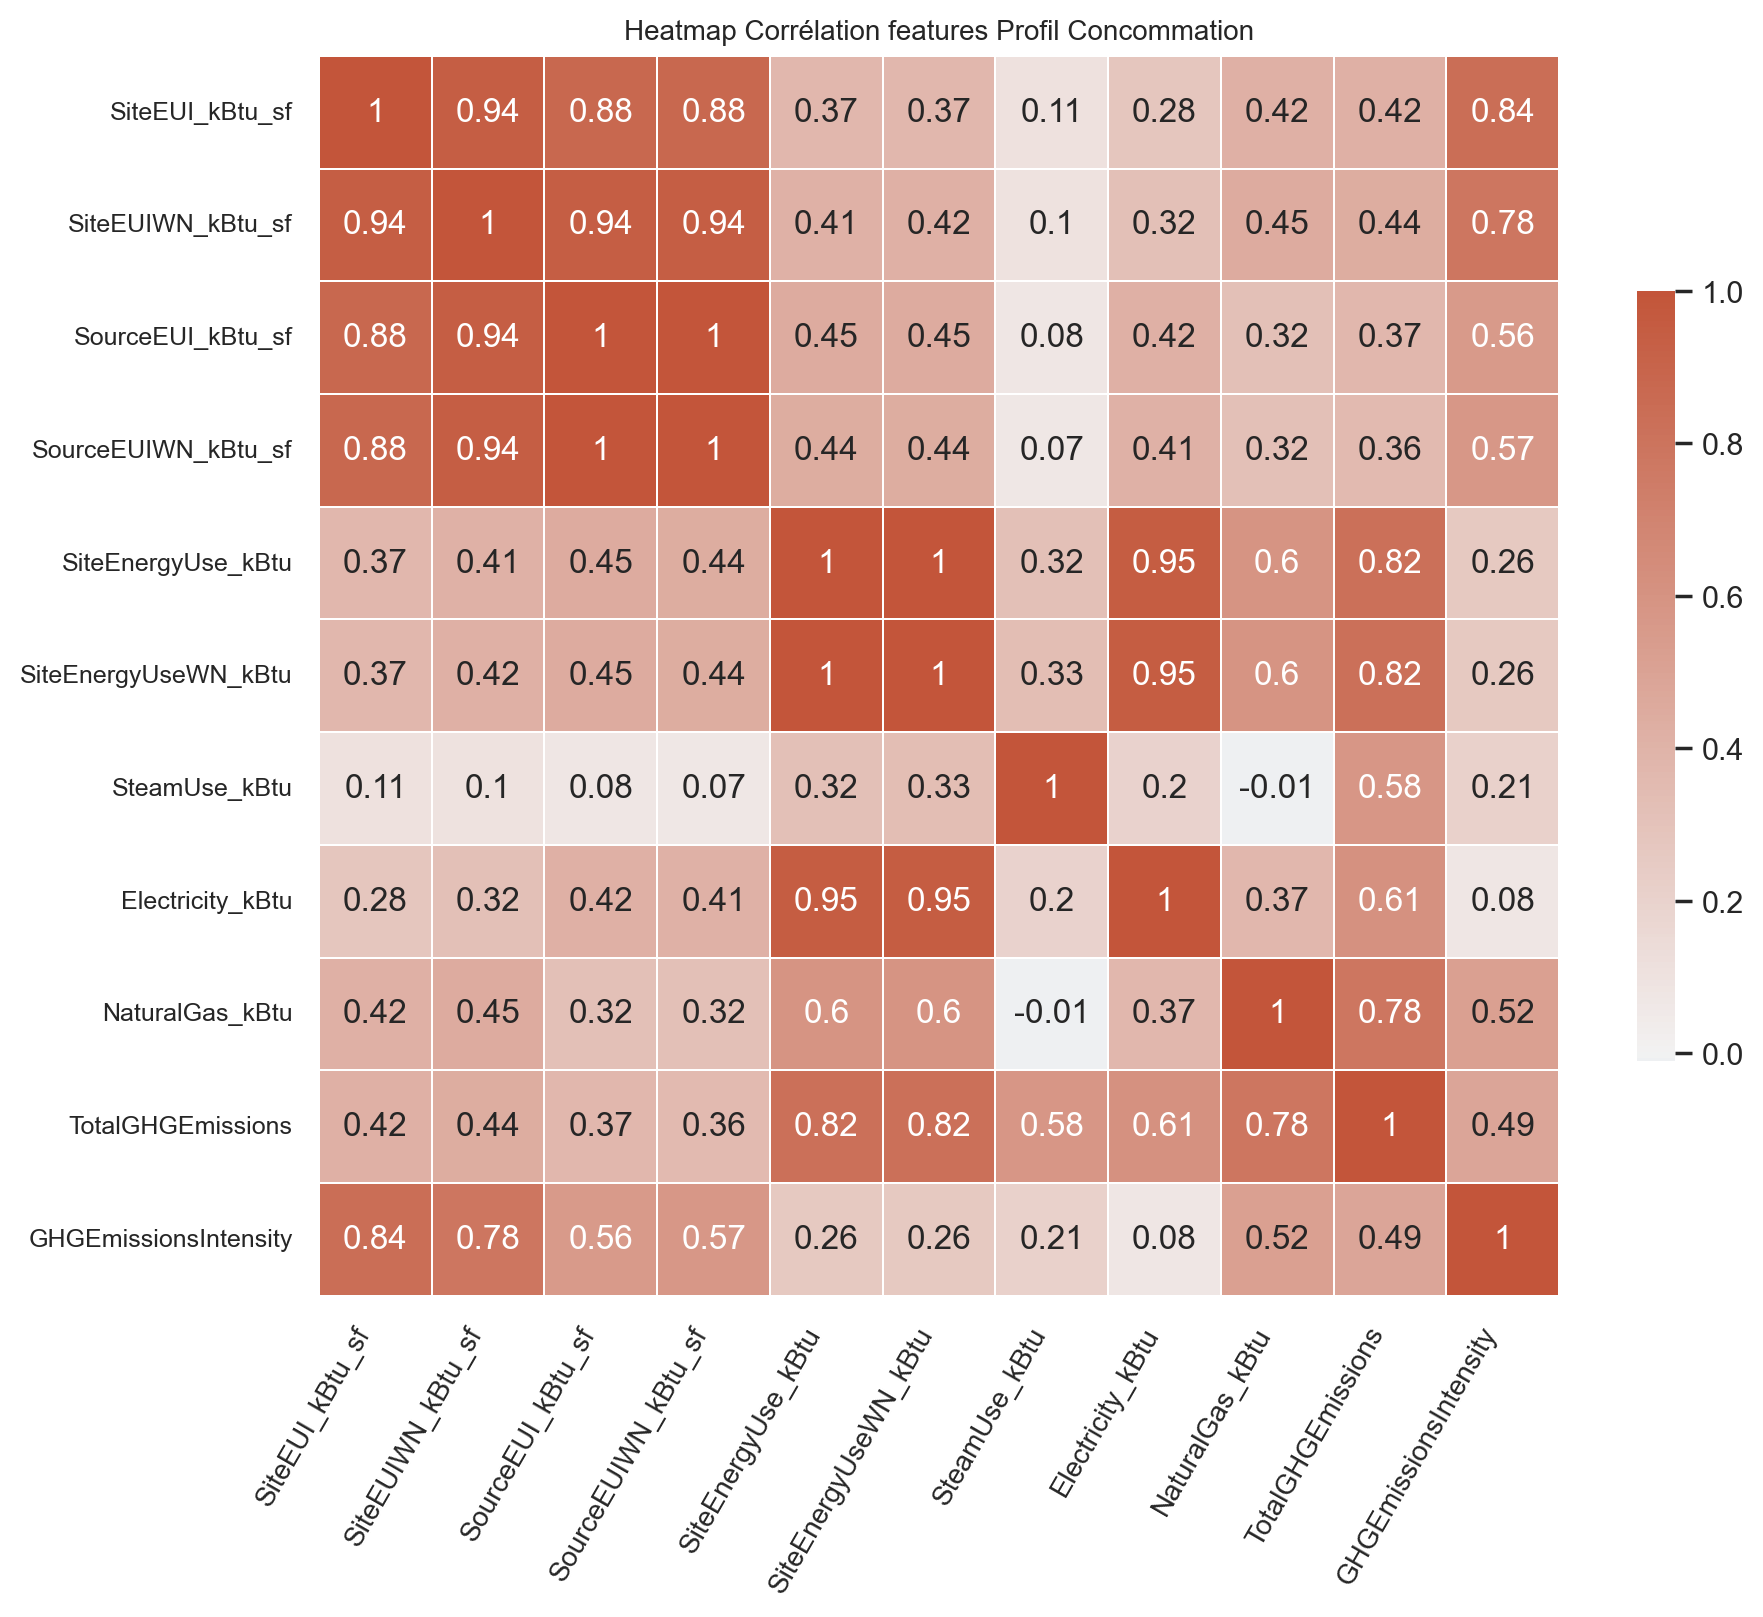

In [81]:
df_col_profil_conso = profil_consommation + ['TotalGHGEmissions', 'GHGEmissionsIntensity']
df_num_profil = df[df.columns[df.columns.isin(df_col_profil_conso)]]
corr_2 = round(df_num_profil.corr(method='pearson'),2)
fig,ax = plt.subplots(figsize=(10,10), dpi=200)
sns.heatmap(corr_2, linewidth=0.01,
            cmap=sns.diverging_palette(230,20,as_cmap=True), 
            vmax = 1, 
            center=0, 
            square=True, 
            cbar_kws={"shrink": .5},annot=True)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=9)
ax.set_title('Heatmap Corrélation features Profil Concommation',fontsize=10)
plt.savefig("figures/correlation_target_consommation.png", transparent=True, bbox_inches='tight', dpi=200)

plt.show()

In [82]:
#Code copié-Coller pour afficher les corrélation pair à pair 
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

threshold = 0.5
corr_2 = corr_2.unstack().sort_values(kind="quicksort")
strong_corr_2 = (pd.DataFrame(corr_2[(abs(corr_2) > threshold)]).reset_index().rename(columns={0:'corr_coeff'}))
strong_corr_2 = strong_corr_2[(strong_corr_2.index%2 == 0) & (strong_corr_2['level_0'] != strong_corr_2['level_1'])]
strong_corr_2.sort_values('corr_coeff', ascending=False)

level_0                level_1  corr_coeff
48      SourceEUI_kBtu_sf    SourceEUIWN_kBtu_sf        1.00
44     SiteEnergyUse_kBtu   SiteEnergyUseWN_kBtu        1.00
36   SiteEnergyUseWN_kBtu       Electricity_kBtu        0.95
34       Electricity_kBtu     SiteEnergyUse_kBtu        0.95
32      SiteEUIWN_kBtu_sf      SourceEUI_kBtu_sf        0.94
30      SourceEUI_kBtu_sf      SiteEUIWN_kBtu_sf        0.94
28        SiteEUI_kBtu_sf      SiteEUIWN_kBtu_sf        0.94
26    SourceEUIWN_kBtu_sf        SiteEUI_kBtu_sf        0.88
24      SourceEUI_kBtu_sf        SiteEUI_kBtu_sf        0.88
22  GHGEmissionsIntensity        SiteEUI_kBtu_sf        0.84
20     SiteEnergyUse_kBtu      TotalGHGEmissions        0.82
18      TotalGHGEmissions     SiteEnergyUse_kBtu        0.82
16      SiteEUIWN_kBtu_sf  GHGEmissionsIntensity        0.78
14  GHGEmissionsIntensity      SiteEUIWN_kBtu_sf        0.78
12      TotalGHGEmissions       Electricity_kBtu        0.61
10        NaturalGas_kBtu   SiteEnergyUseWN_kBtu        0.60
8         NaturalGas_kBtu     SiteEnergyUse_kBtu        0.60
6           SteamUse_kBtu      TotalGHGEmissions        0.58
4     SourceEUIWN_kBtu_sf  GHGEmissionsIntensity        0.57
2       SourceEUI_kBtu_sf  GHGEmissionsIntensity        0.56
0         NaturalGas_kBtu  GHGEmissionsIntensity        0.52

### Pairplot

In [47]:
df_conso = df[profil_consommation]
df_general = df[profil_general]

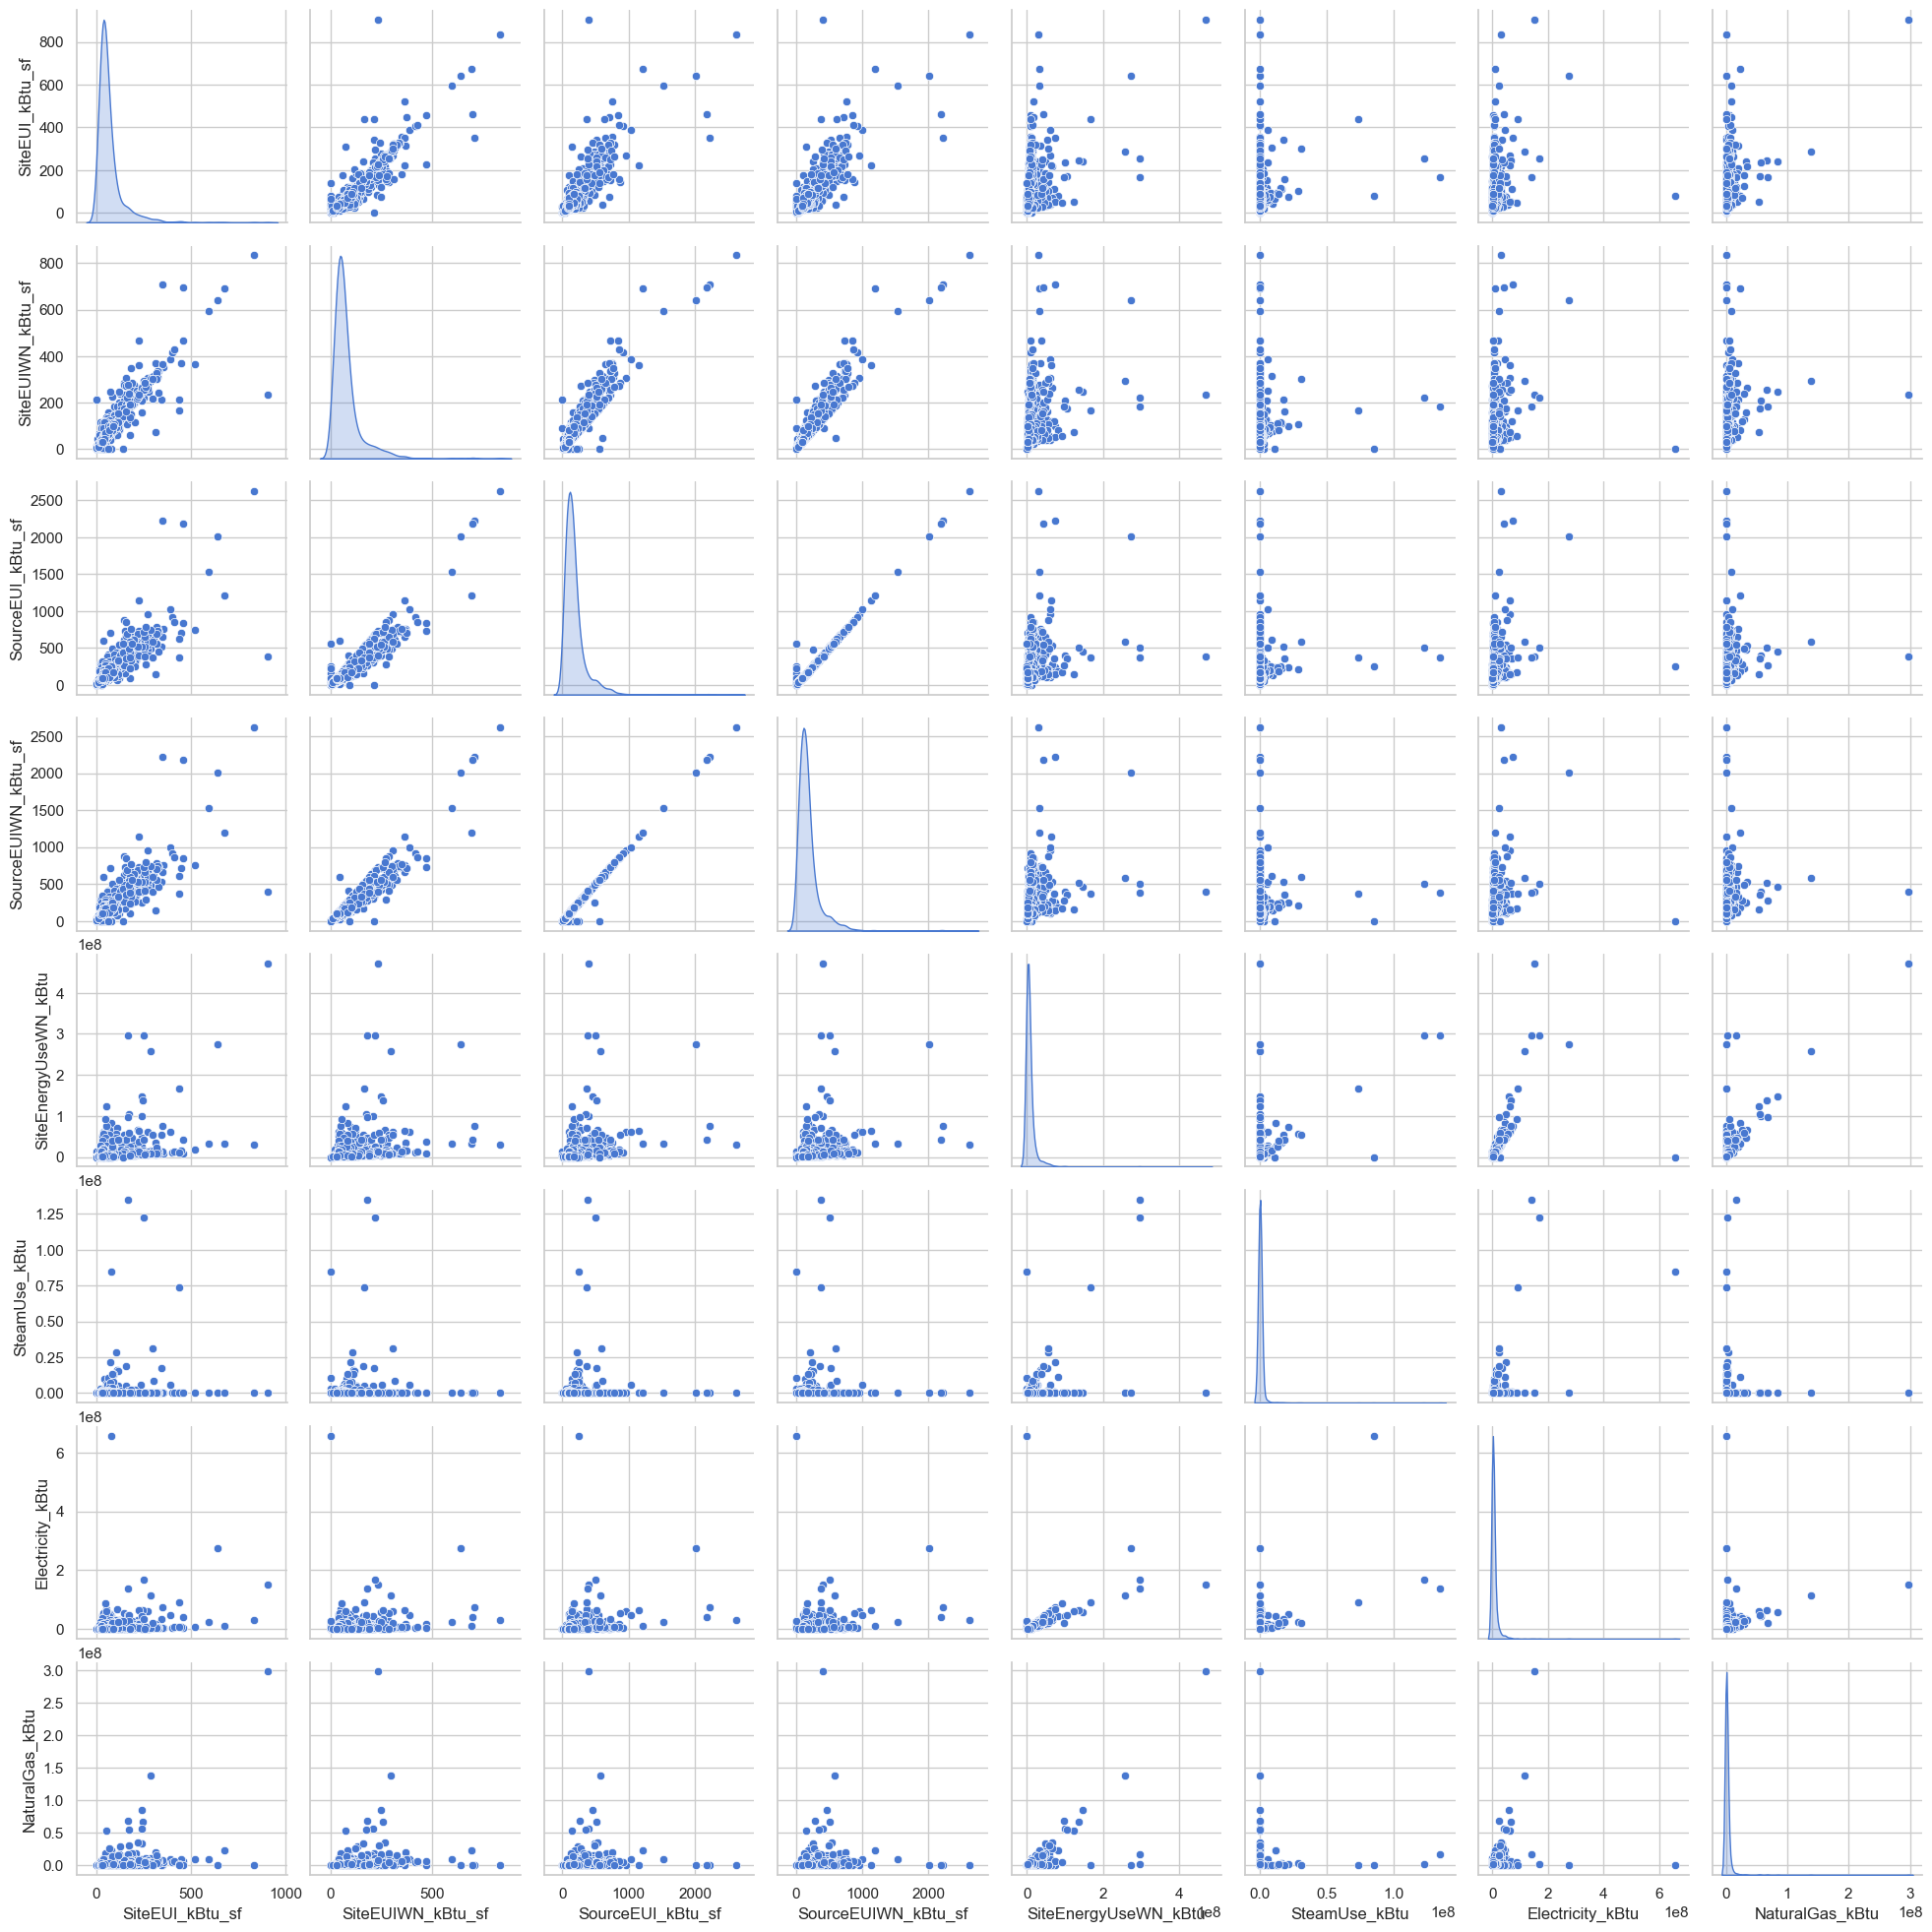

In [48]:
# Relation entre les features
sns.pairplot(df_conso,diag_kind='kde')

# Observations

<span style="font-size:16px;">- La majeur partie des bâtiments non résidentiels sont des bureaux. 
    
<span style="font-size:16px;">- La répartitions du nombre de bâtiment selon les quartiers, le type d'usage principale n'est pas homogène. 
    
<span style="font-size:16px;">- Une grande majorité des bâtiments se localisent sur les deux quartiers Downtown, Greater Duwamish. le nombre de bâtiments dans les quartiers sud et dans le centre n'est pas élevé. 
    
<span style="font-size:16px;">- La colonne Largest_UseType représente plusieurs catégories détaillées des bâtiments, nous utiliserons cette colonne dans la partie features engineering afin de réduire le nombre de catégories pour l'utiliser dans la modélisation. 
    
<span style="font-size:16px;">- Selon l'âge de construction des bâtiments, on remarque une tendance haussière  dans la consommation et les émissions de CO2.
    
<span style="font-size:16px;">- Les distributions des différentes features ne semble pas être réparties uniformément, ce qui nous donne une idée des features que nous pouvons modifier pour d'affiner davantage les résultats de notre construction de modèles. 
    
<span style="font-size:16px;">- Les hôpitaux semblent utiliser plus d'énergie que les autres bâtiments, nous remarquons aussi que l'émission de CO2 est proportionnelle à l'utilisation de l'énergie


<span style="font-size:18px;">La création de nouvelles variables et le feature engineering seront les principaux sujets NoteBook **`02_features_enginerring`**. 